In [1]:
# !pip3 install opencv-python

In [2]:
# !pip3 install Pillow

In [3]:
# !pip3 install ultralytics

In [4]:
# !pip3 install mediapipe

In [5]:
# !pip3 list

In [6]:
import cv2
import virtual_board_all 
from ultralytics import YOLO
import printscreen
import tasks
import mediapipe as mp
import os
import time
from cvzone_hand import HandDetector
import collections
import process_frame
import all_tests
import add_pieces
import connections
import pieces_location
import pieces
import numpy as np
import warnings
from belief import GroupSkillBelief, plot_beliefs

**This file is the main file to run for circuit detection and verification.**

#### Implementation on Video

In [7]:
task_mapping = {
    1: tasks.task1,
    2: tasks.task2,
    3: tasks.task3,
    4: tasks.task4,
    5: tasks.task5,
    6: tasks.task6,
    7: tasks.task7,
    8: tasks.task8,
    9: tasks.task9,
    10: tasks.task10,
    11: tasks.task11,
    12: tasks.task12,
    13: tasks.task13,
    14: tasks.task14,
    15: tasks.task15,
    16: tasks.task16,
    17: tasks.task17,
    18: tasks.task18,
    19: tasks.task19,
    20: tasks.task20,
    21: tasks.task21,
    22: tasks.task22,
    23: tasks.task23,
    24: tasks.task24,
    25: tasks.task25,
    26: tasks.task26,
    27: tasks.task27,
    28: tasks.task28,
    29: tasks.task29,
}

In [8]:
result = task_mapping[1].action
for tid in task_mapping:
    if tid != 1:
        result = [x + y for x, y in zip(result, task_mapping[tid].action)]

print(result)

[9, 6, 3, 13, 4, 11, 5, 29, 7, 8, 4, 29, 9, 8, 8, 6, 6, 29, 2, 2, 2]


In [9]:


# def remove_task(tid, result, task_list):
#     skills = task_mapping[tid].action
#     leftover_tasks = []
#     for curr_task_id in task_list:
#         if curr_task_id != tid:
#             leftover_tasks.append(curr_task_id)

#     new_result = [x - y for x, y in zip(result, skills)]
#     if 0 in new_result:
#         return False, task_mapping.keys()
#     else:
#         lowest_tasks = task_mapping.keys()
#         for task_id in leftover_tasks:
#             works, final_tasks = remove_task(task_id, new_result, leftover_tasks)
#             if works:
#                 if len(final_tasks) < len(lowest_tasks):
#                     lowest_tasks = final_tasks
#         return True, lowest_tasks

# print(task_mapping.keys())

# for tid in task_mapping:
#     works, task_list = remove_task(tid, result, task_mapping.keys())
#     if works:
#         print(task_list)



In [10]:
def create_beliefs(task_id, uids):
    beliefs = {}
    task_obs = task_mapping[task_id].action
    
    for sid, used in enumerate(task_obs):
            if used == 1:
                skill_belief = GroupSkillBelief(sid, 
                                                uids, 
                                                0.5, 
                                                0.1, 
                                                0.1, 
                                                0.3, 
                                                0, 
                                                10, 
                                                500, #800
                                                100)
                beliefs[sid] = skill_belief
    return beliefs

In [11]:
task = 1
source = 'raw_videos/test8.mp4'#'raw_videos/test4.mp4' #1 #'raw_videos/test2.mp4' #'raw_videos/raw_video_45.mp4'
store = False# if source != 0 and source != 1 else True
show = True
first_viable_frame = 0

The following is NOT in the circuit: switch
The following is NOT in the circuit: lamp
The following is NOT in the circuit: battery
Too many pieces were not connected to any others
Circuit NOT closed
0


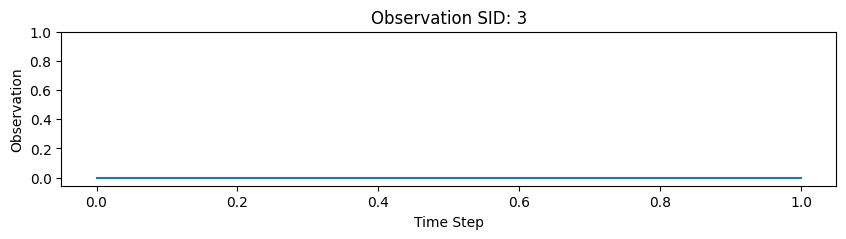

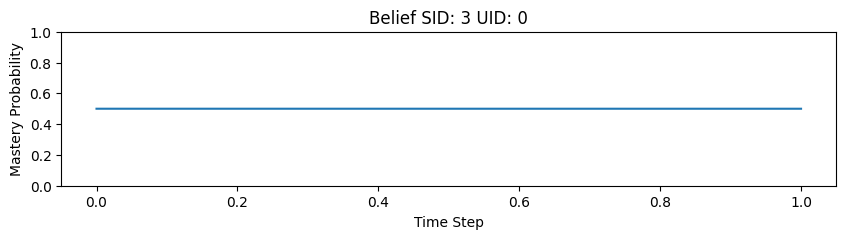

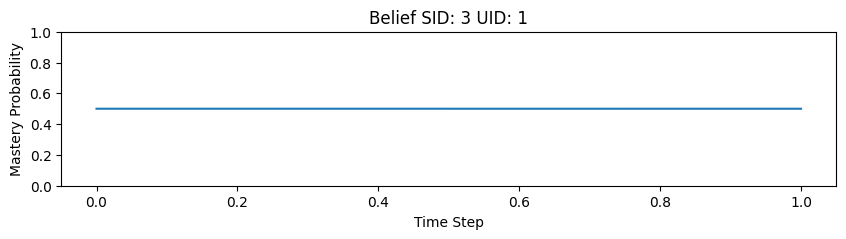

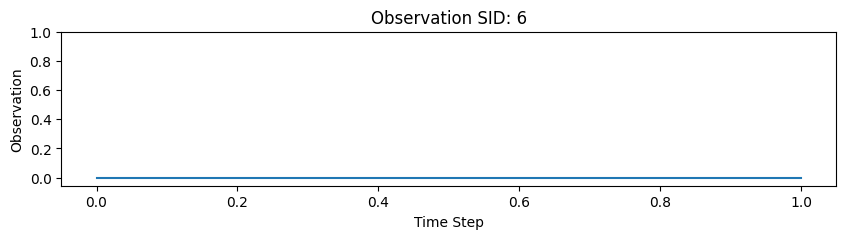

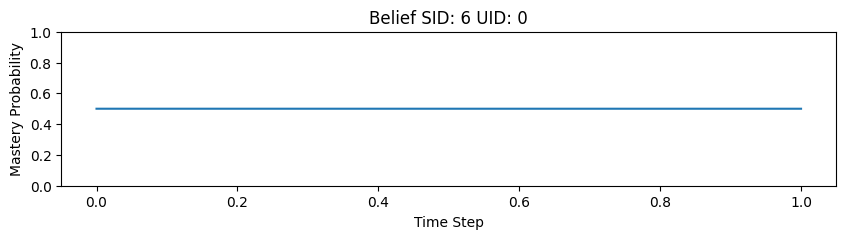

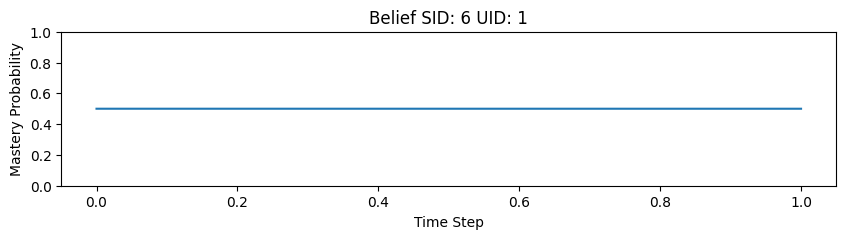

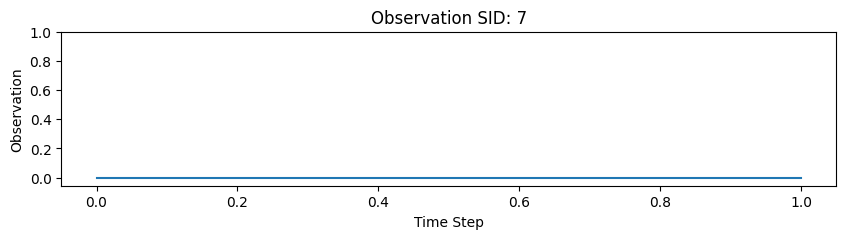

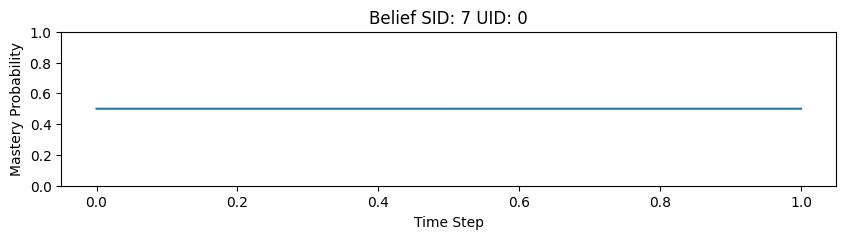

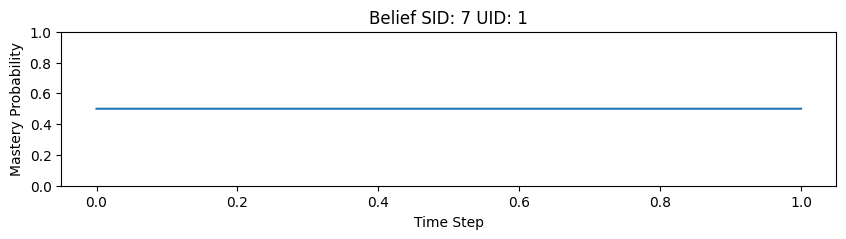

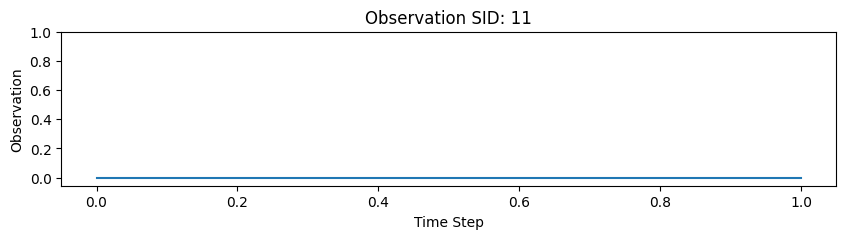

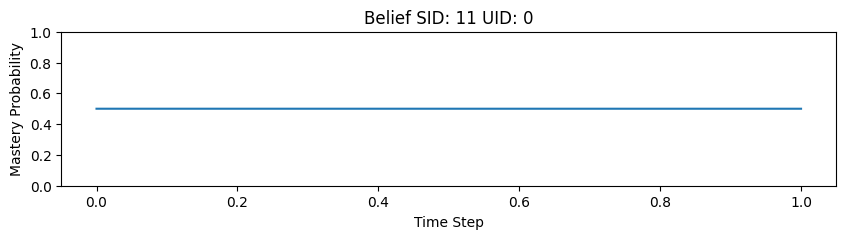

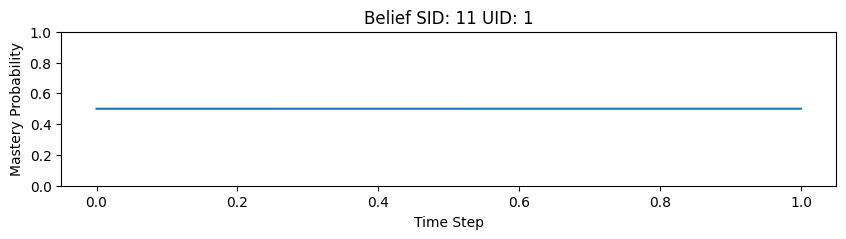

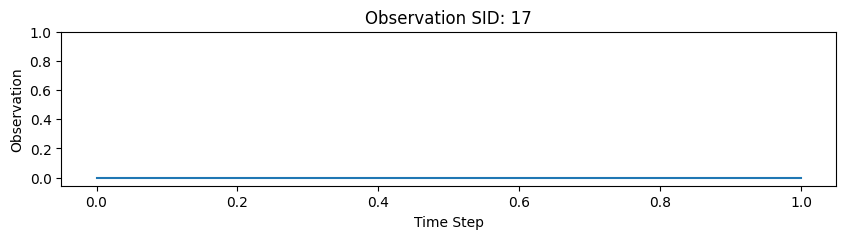

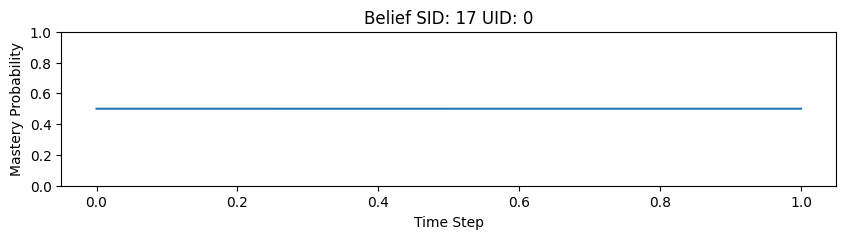

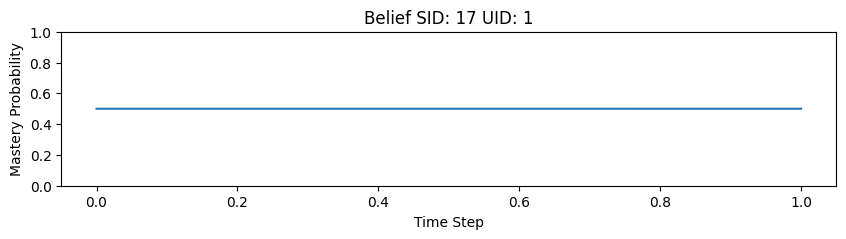

Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
100


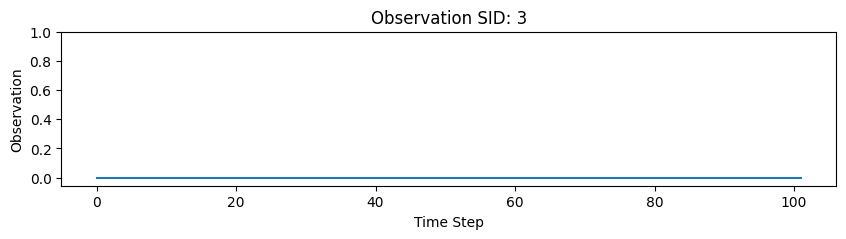

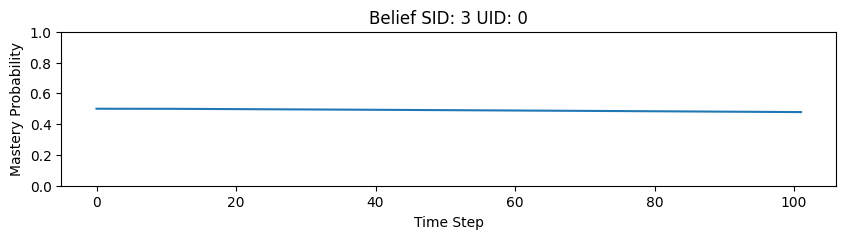

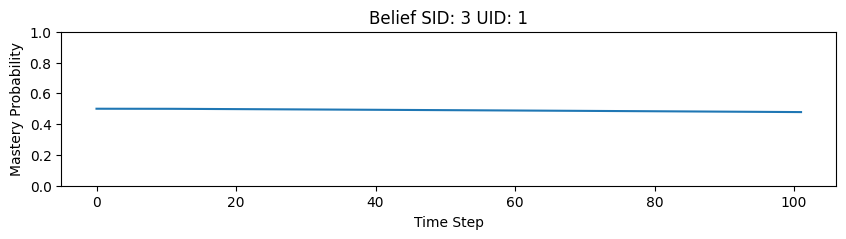

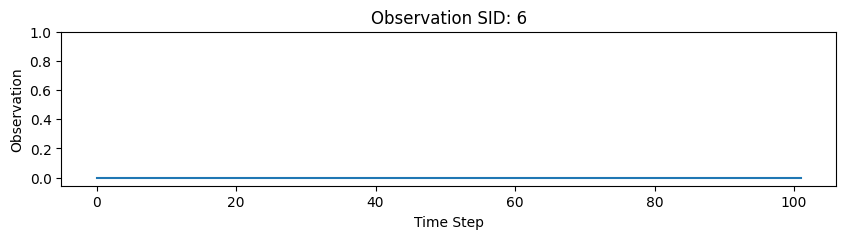

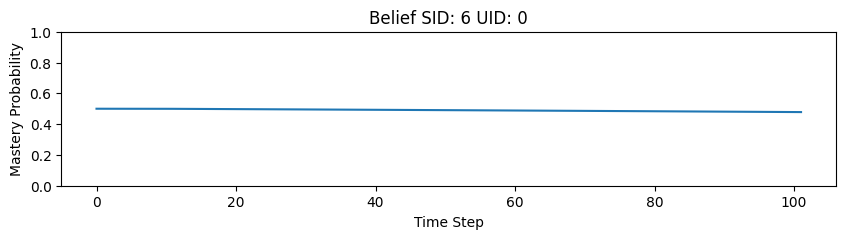

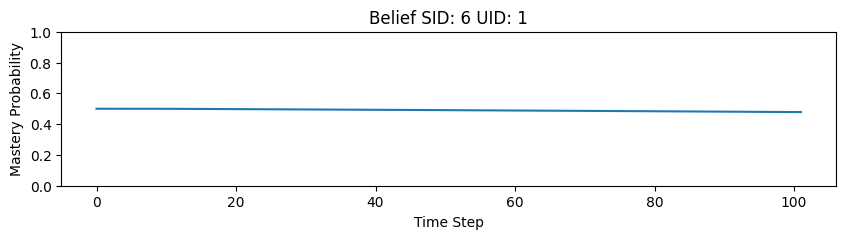

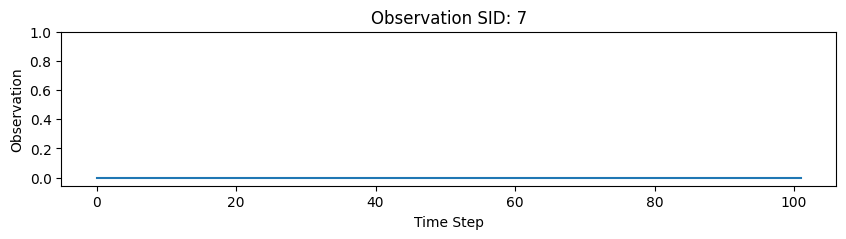

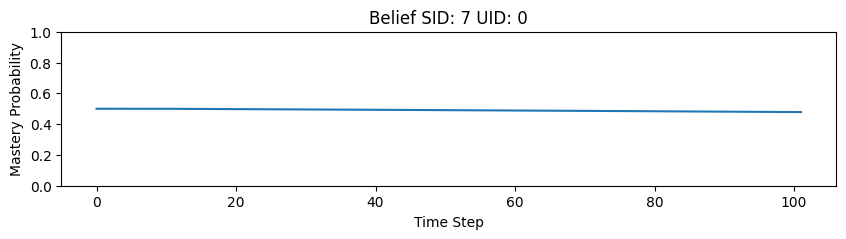

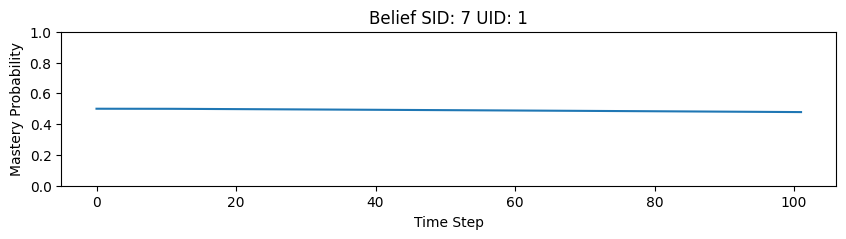

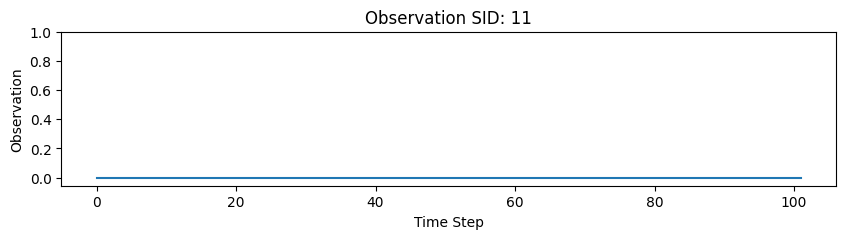

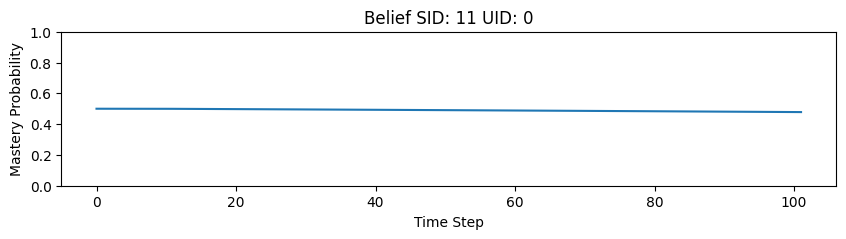

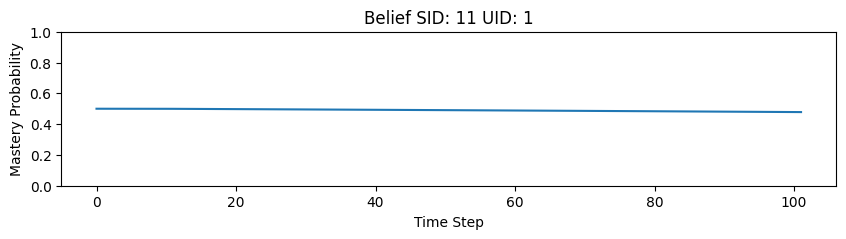

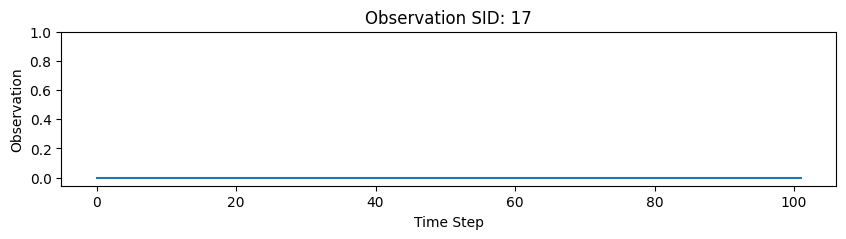

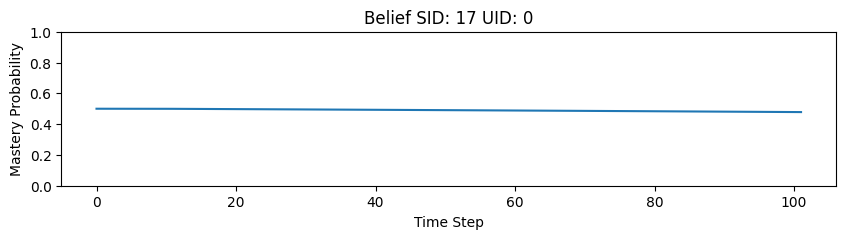

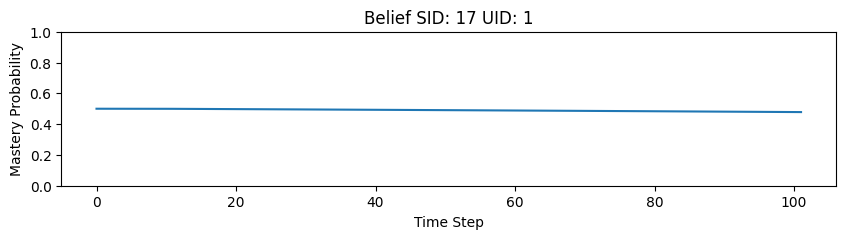

Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
added battery
The following is NOT in the circuit: switch
The following is NOT in the circuit: lamp
The following exists in the circuit: battery
Too many pieces were not connected to any others
Circuit NOT closed
The following is NOT in the circuit: switch
The following is NOT in the circuit: lamp
The following exists in the circuit: battery
Too many pieces were not connected to any others
Circuit NOT closed
added battery
[<pieces.Battery object at 0x0000020A76A5B010>, <pieces.Battery object at 0x0000020A805D3EE0>]
The following is NOT in the circuit: switch
The following is NOT in the circuit: lamp
The following exists in the circuit: battery
Too many pieces were not connected to any others
[<pieces.Battery object at 0x0000020A76A5B010>, <pieces.Battery object at 0x0000020A805D3EE0>]
Circuit N

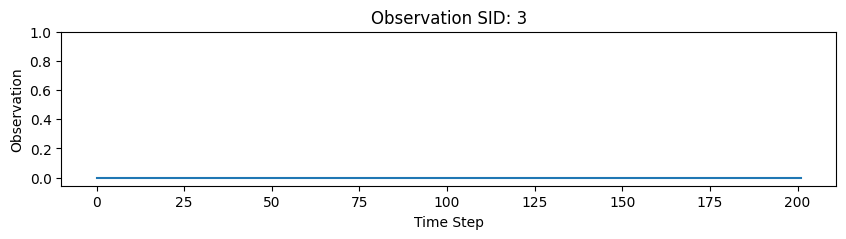

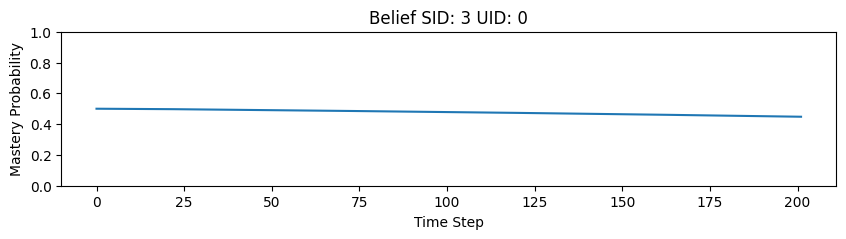

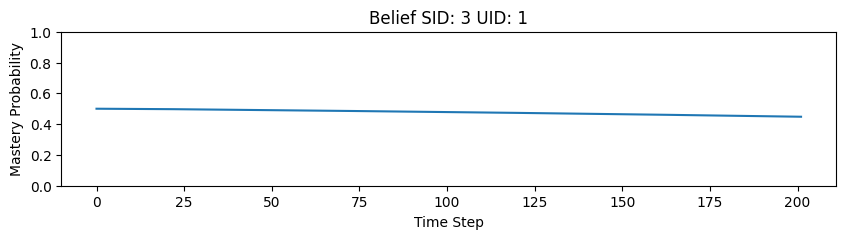

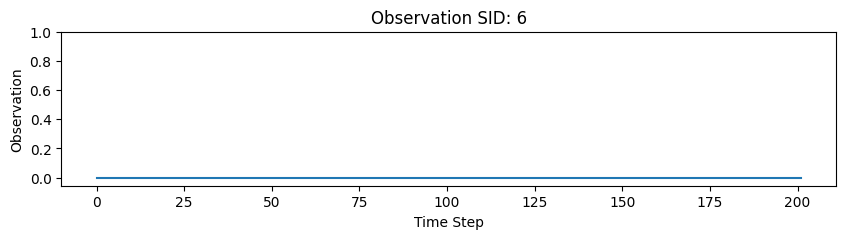

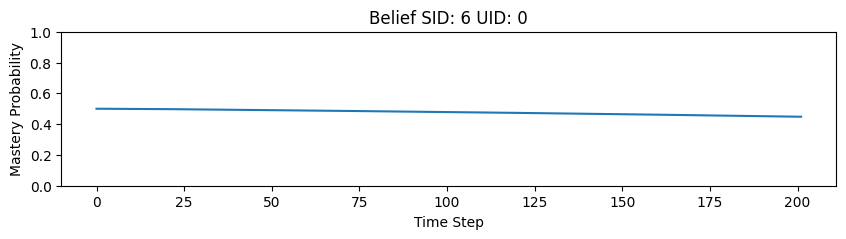

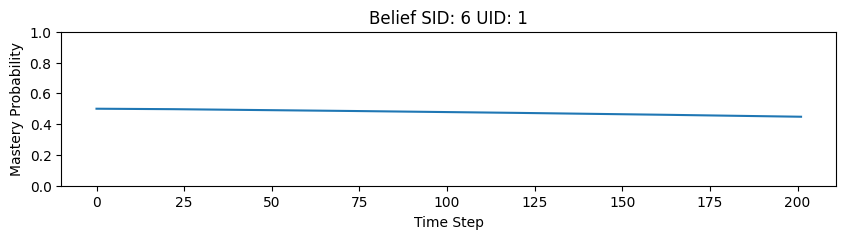

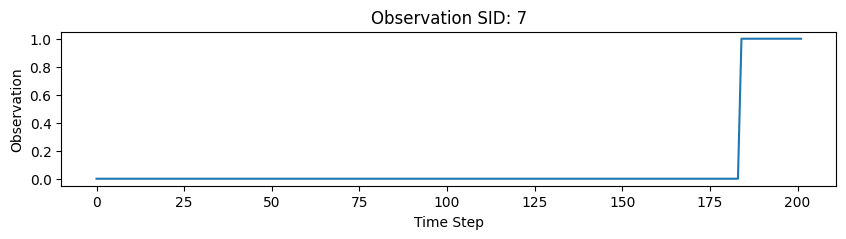

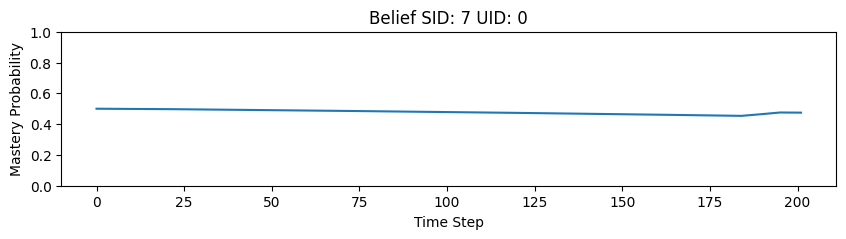

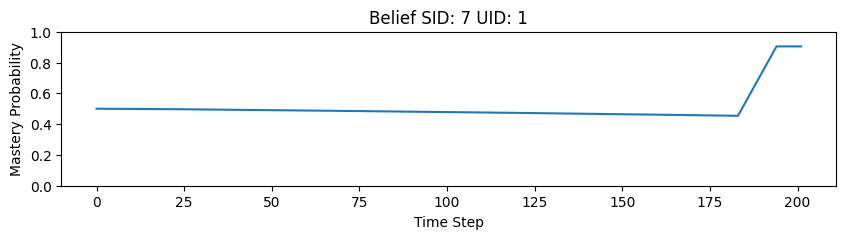

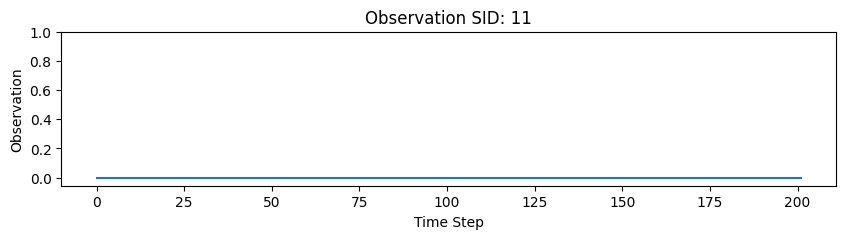

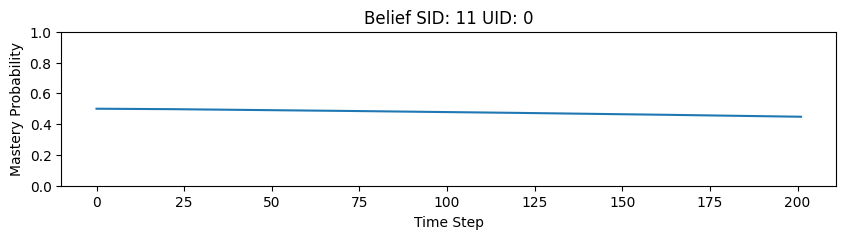

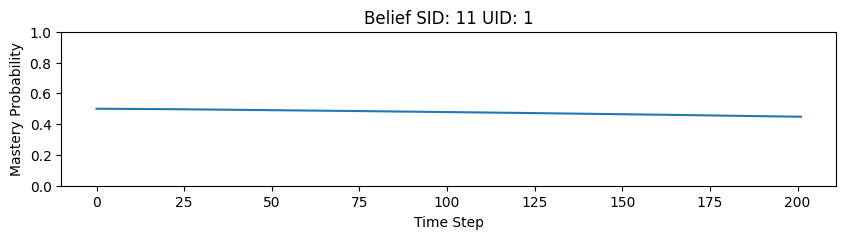

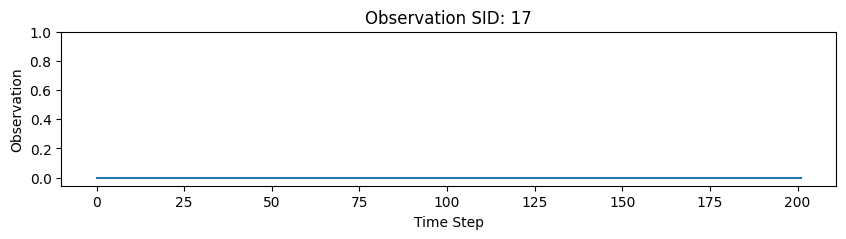

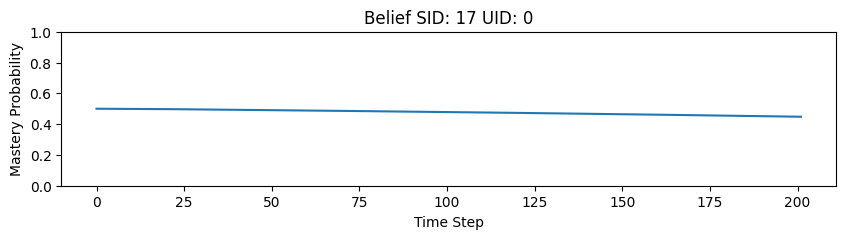

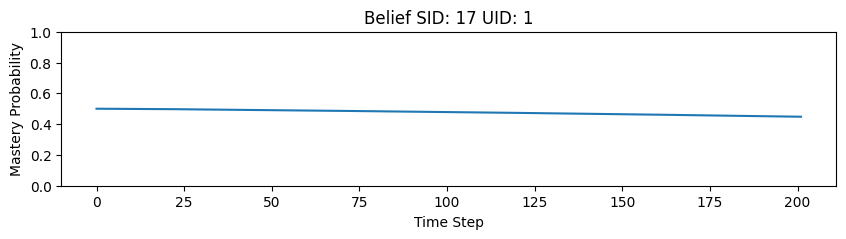

Hand On Board!
added Speaker
[<pieces.Battery object at 0x0000020A76A5B010>, <pieces.Battery object at 0x0000020A805D3EE0>, <pieces.Speaker object at 0x0000020A76A8B970>]
The following is NOT in the circuit: switch
The following is NOT in the circuit: lamp
The following exists in the circuit: battery
Too many pieces were not connected to any others
[<pieces.Battery object at 0x0000020A76A5B010>, <pieces.Battery object at 0x0000020A805D3EE0>, <pieces.Speaker object at 0x0000020A76A8B970>]
Circuit NOT closed
added Speaker
The following is NOT in the circuit: switch
The following is NOT in the circuit: lamp
The following is NOT in the circuit: battery
Too many pieces were not connected to any others
Circuit NOT closed
added Speaker
The following is NOT in the circuit: switch
The following is NOT in the circuit: lamp
The following is NOT in the circuit: battery
Too many pieces were not connected to any others
Circuit NOT closed
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Ha

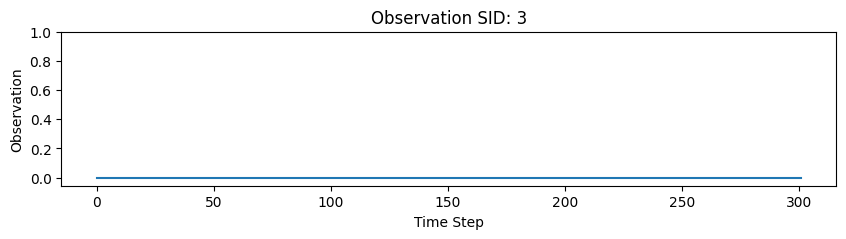

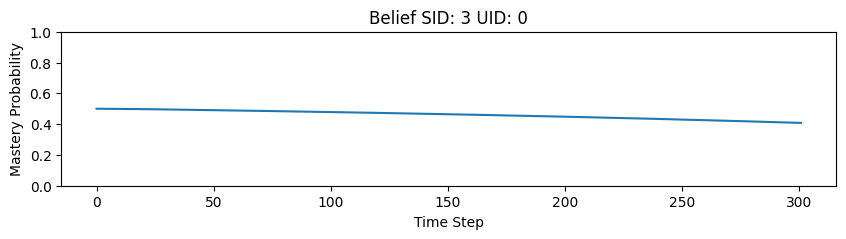

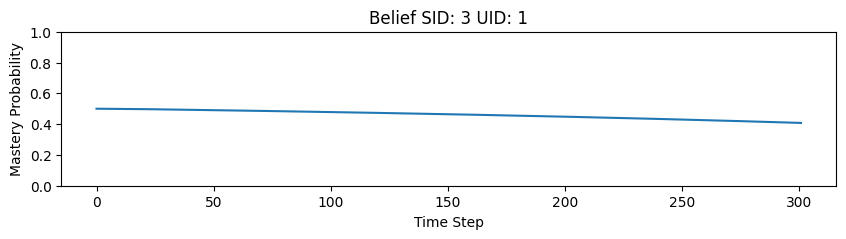

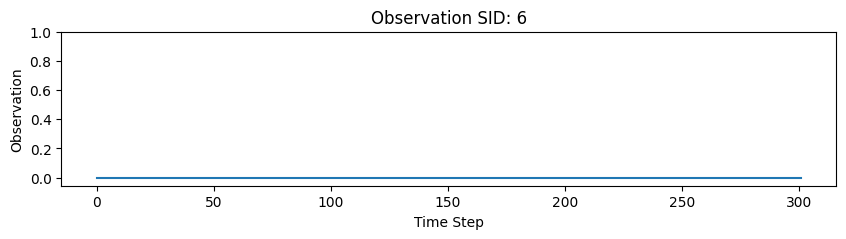

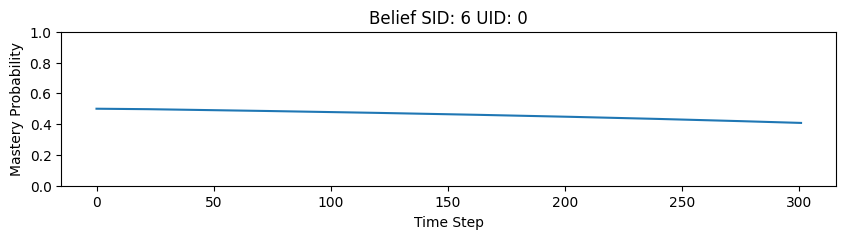

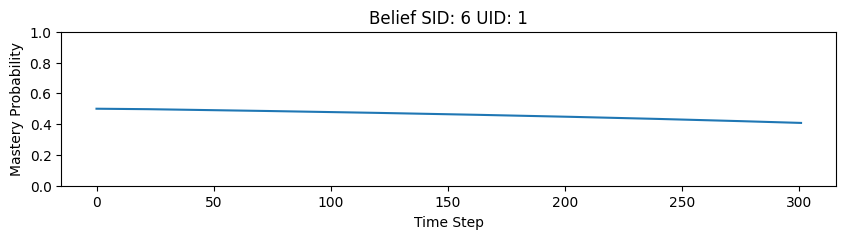

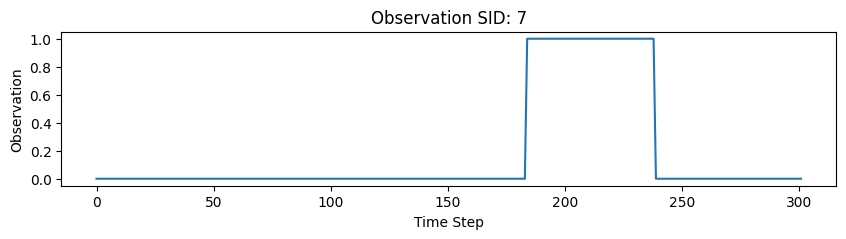

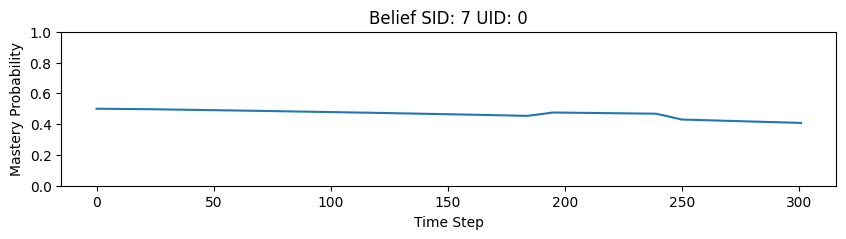

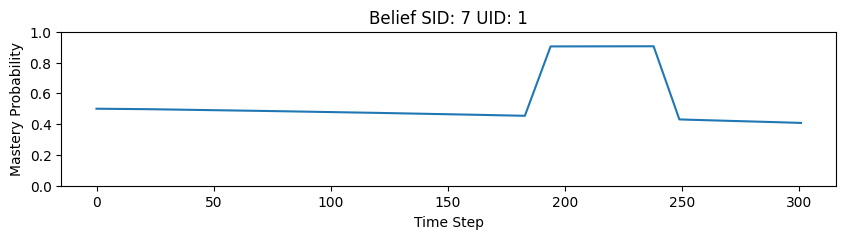

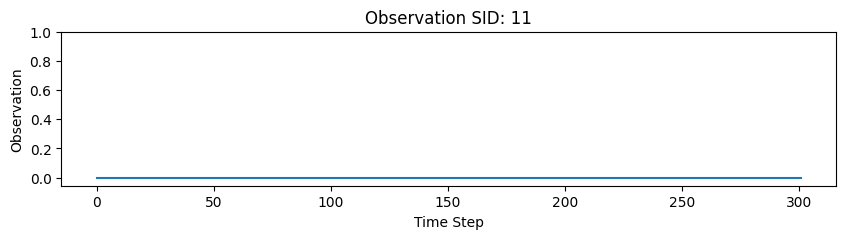

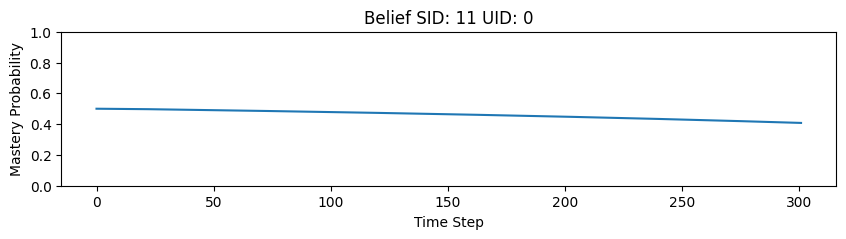

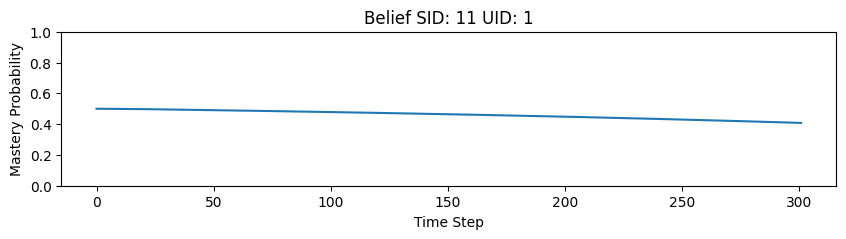

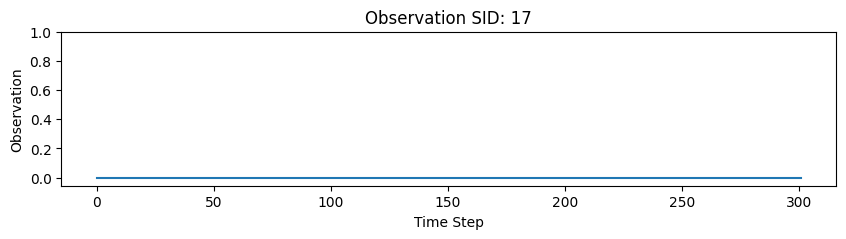

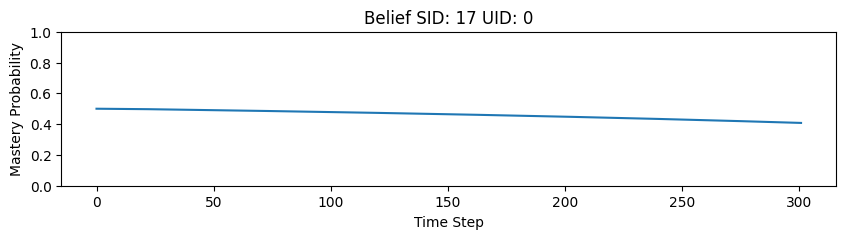

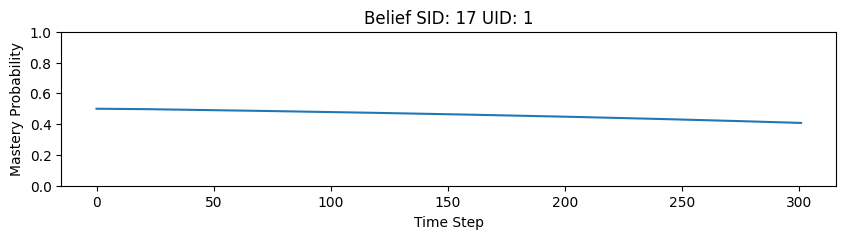

added Speaker
The following is NOT in the circuit: switch
The following is NOT in the circuit: lamp
The following is NOT in the circuit: battery
Too many pieces were not connected to any others
Circuit NOT closed
Hand On Board!
Hand On Board!
added battery
The following is NOT in the circuit: switch
The following is NOT in the circuit: lamp
The following exists in the circuit: battery
Too many pieces were not connected to any others
Circuit NOT closed
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand

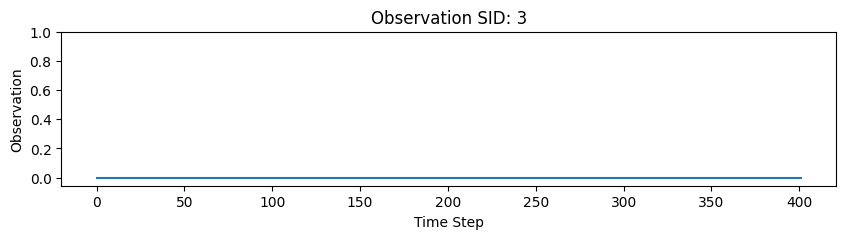

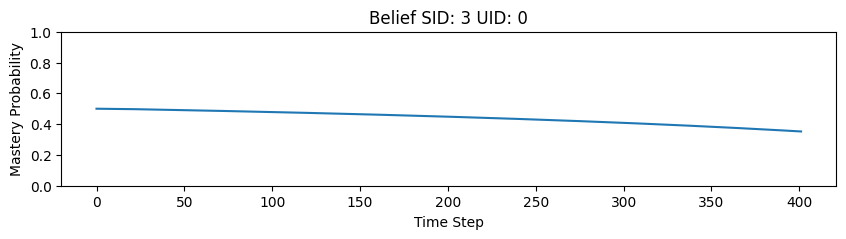

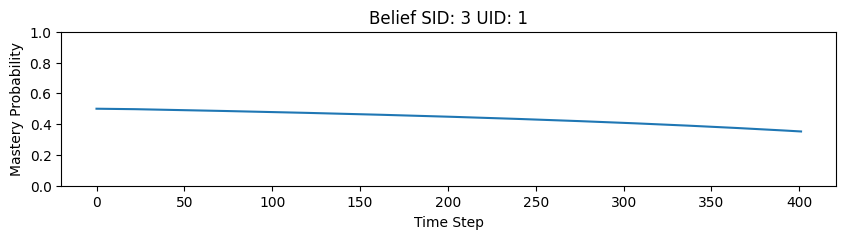

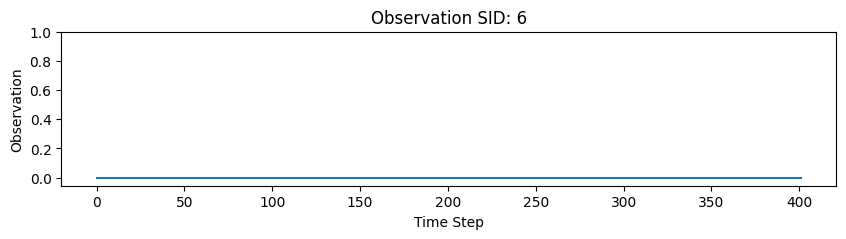

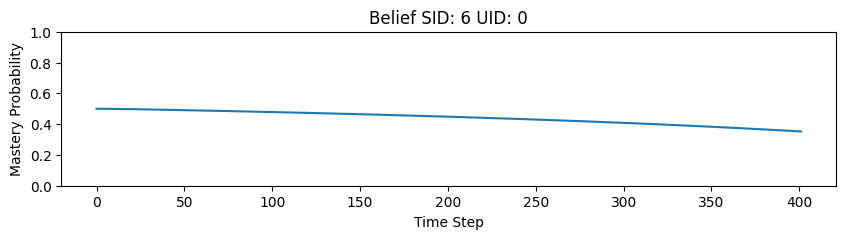

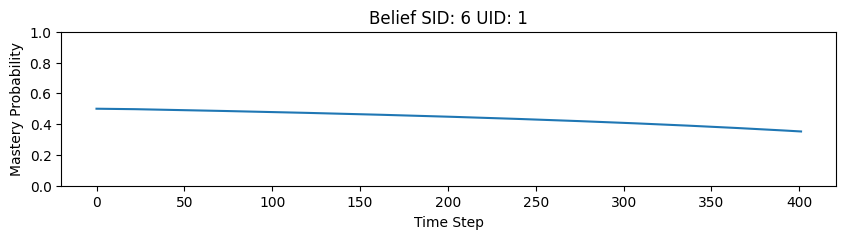

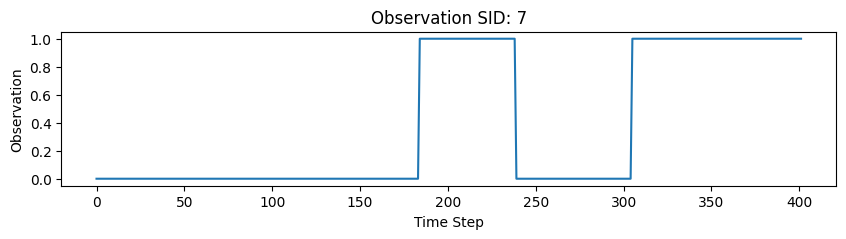

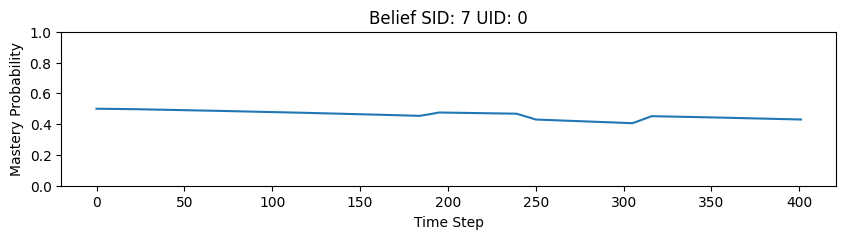

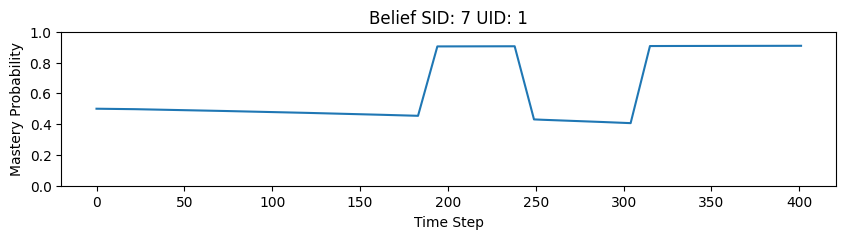

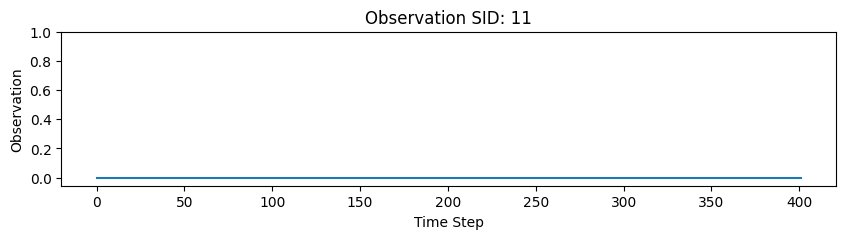

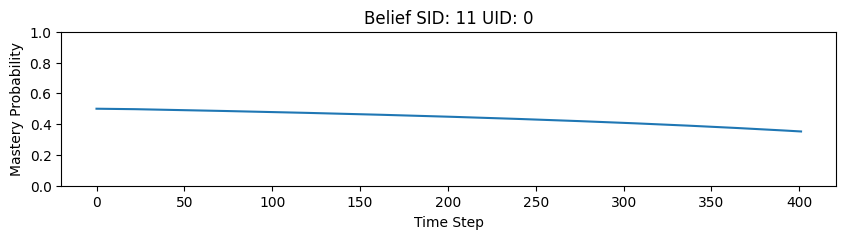

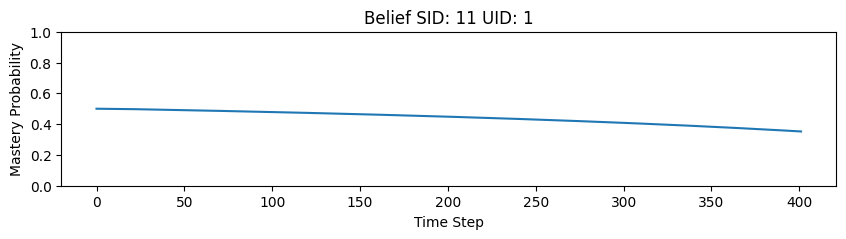

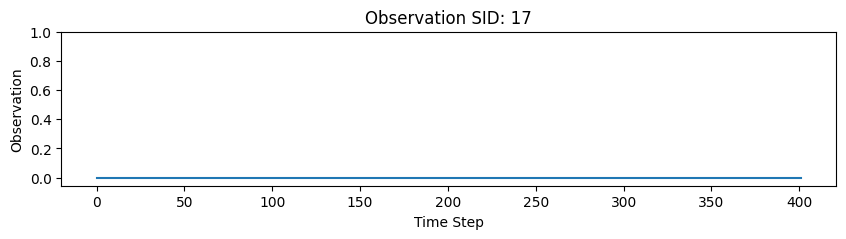

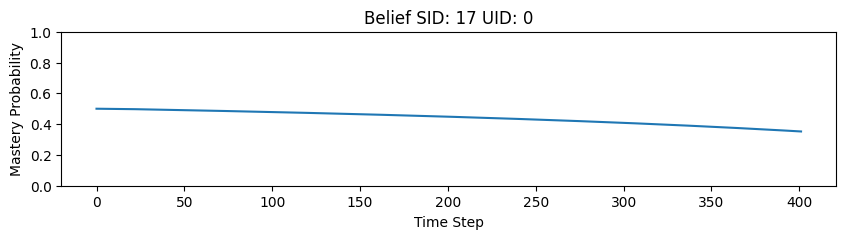

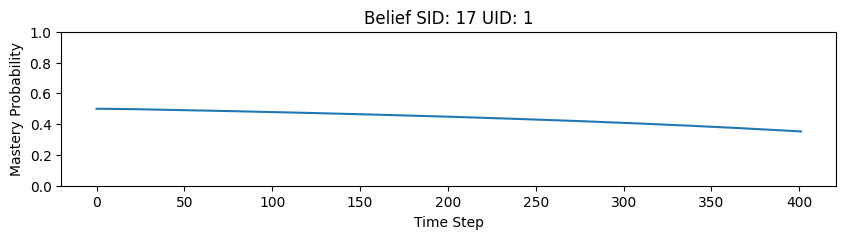

Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Bo

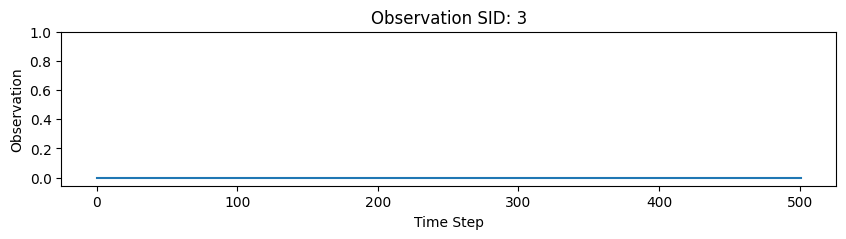

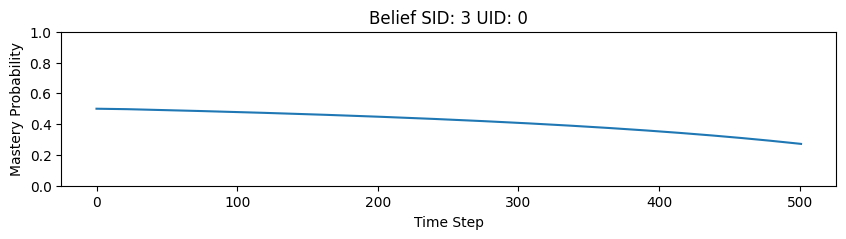

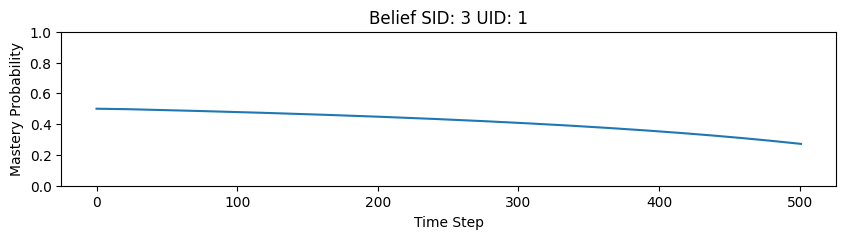

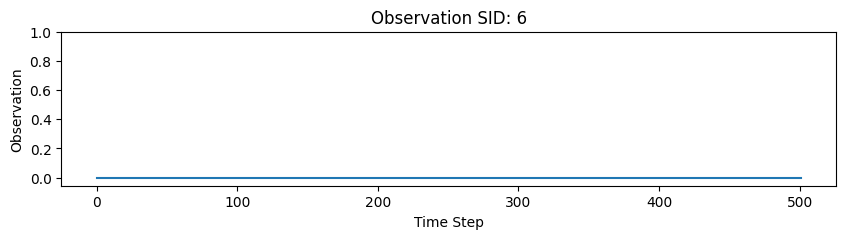

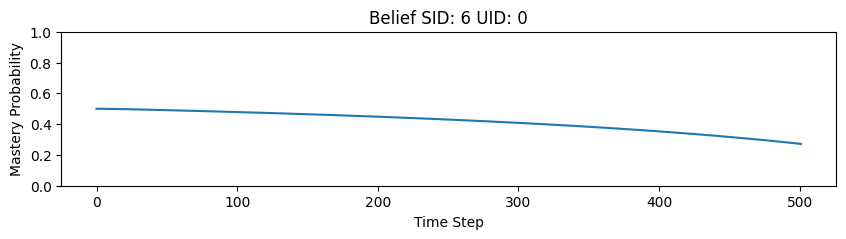

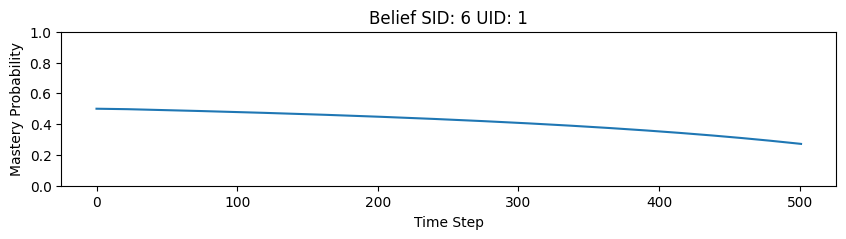

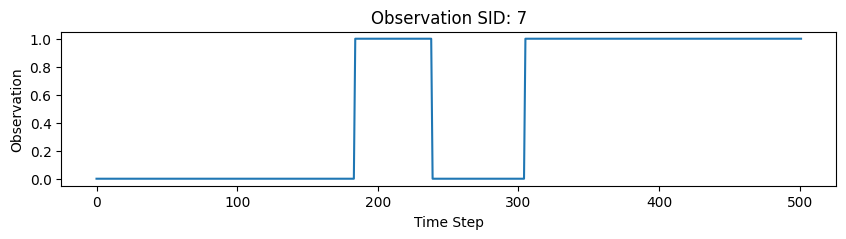

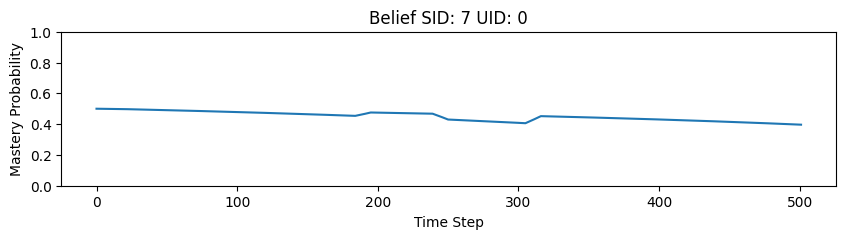

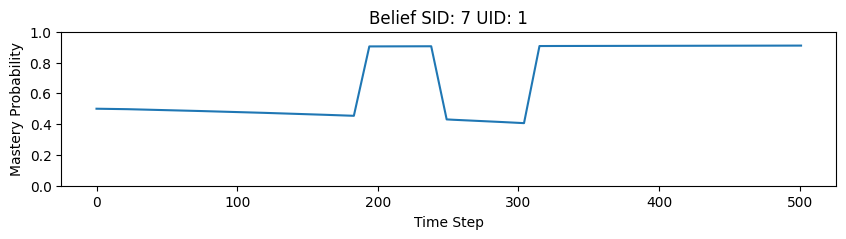

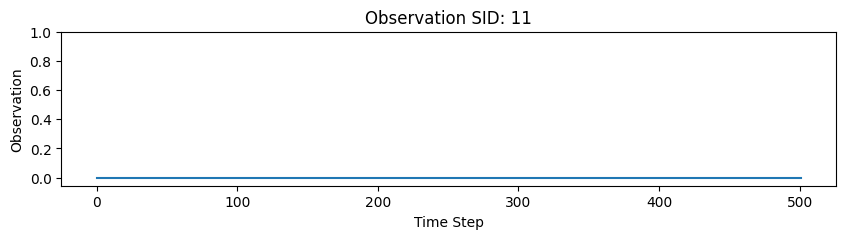

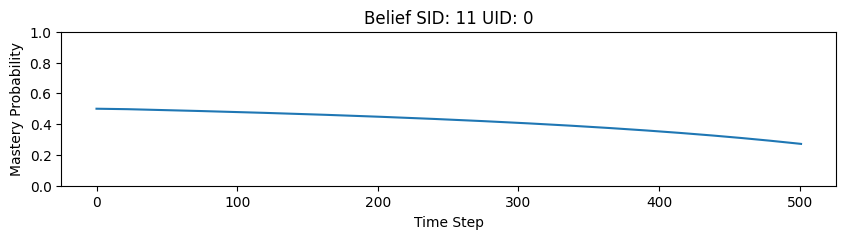

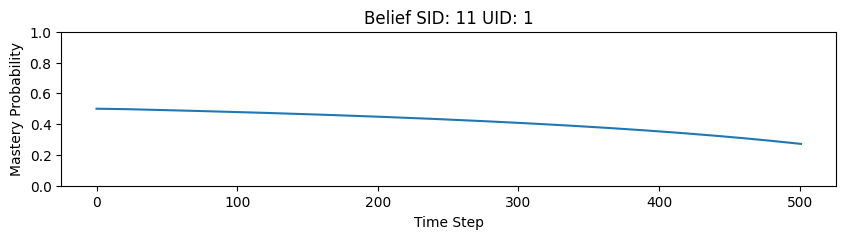

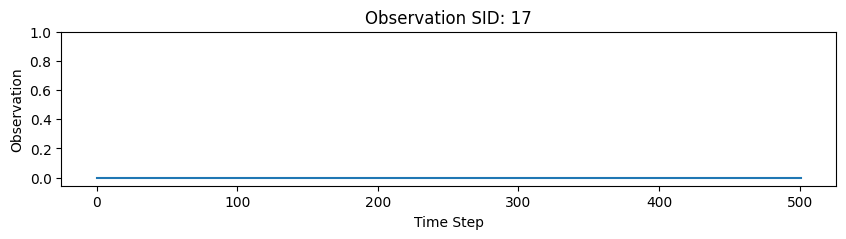

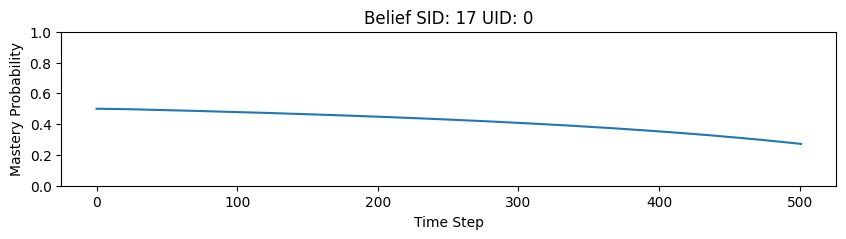

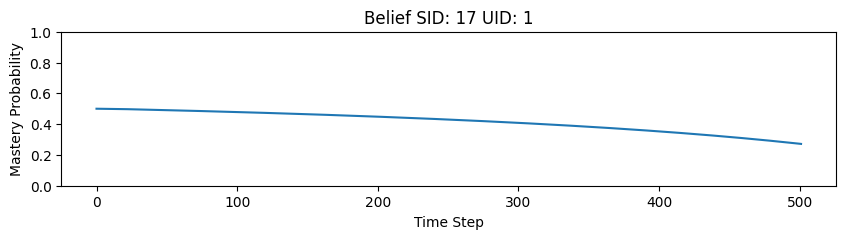

Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
added battery
The following is NOT in the circuit: switch
The following is NOT in the circuit: lamp
The following exists in the circuit: battery
Too many pieces were not connected to any others
Circuit NOT closed
added wire
location (0, 2) (2, 2)
[<pieces.Battery object at 0x0000020A80986AA0>, <pieces.Wire object at 0x0000020A808883A0>]
The following is

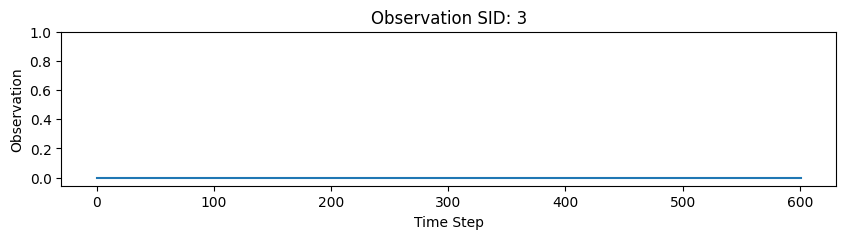

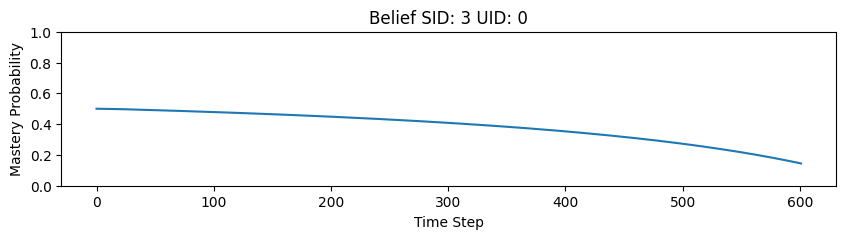

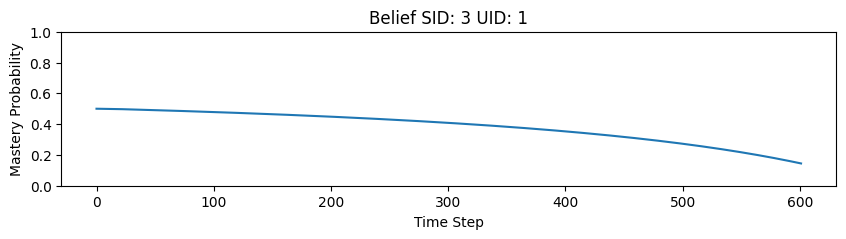

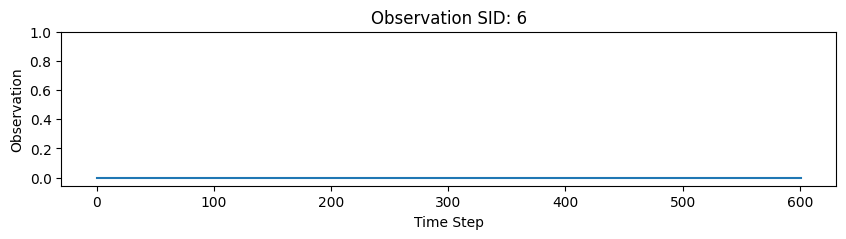

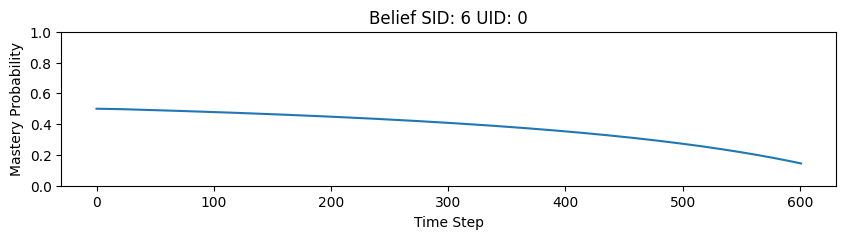

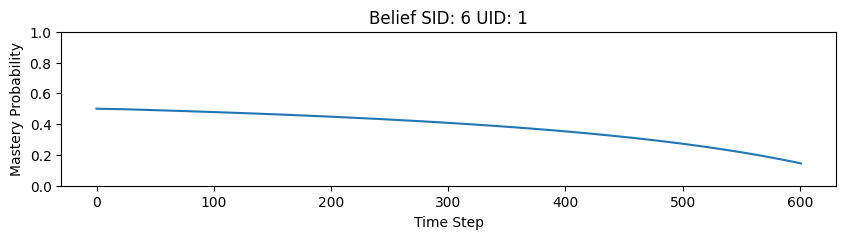

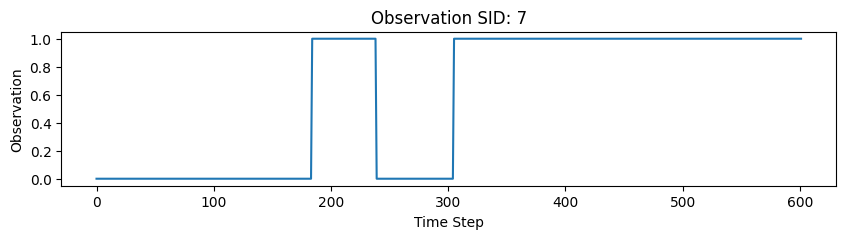

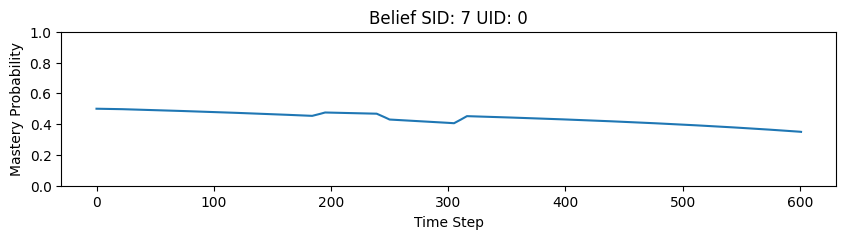

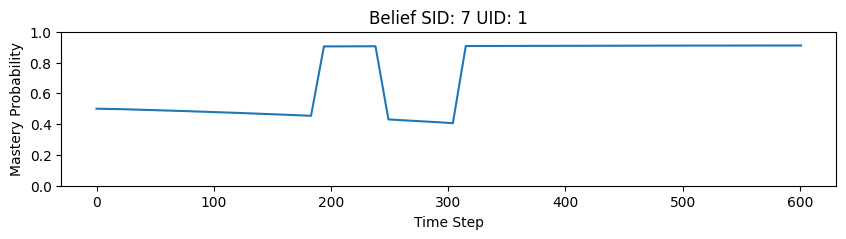

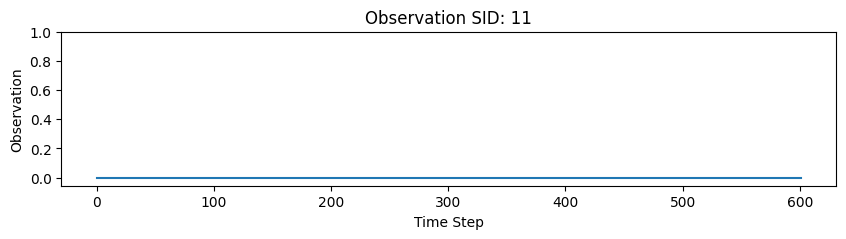

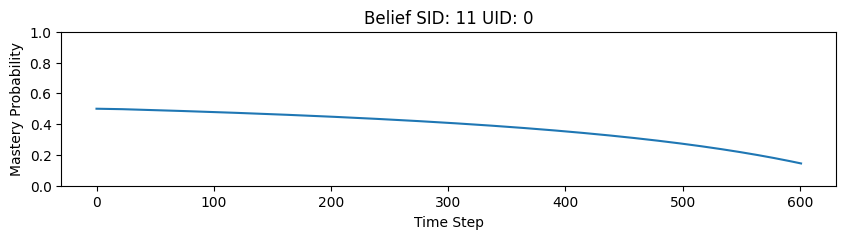

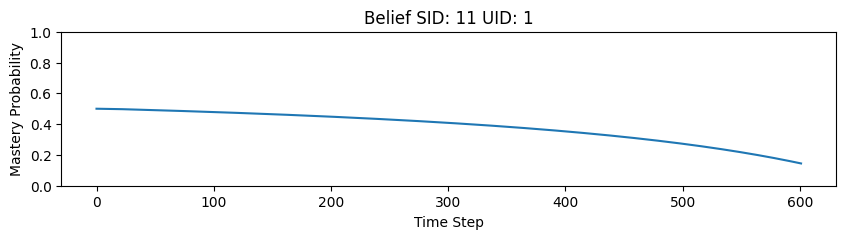

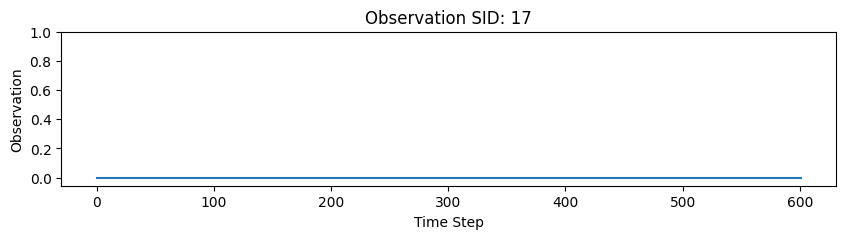

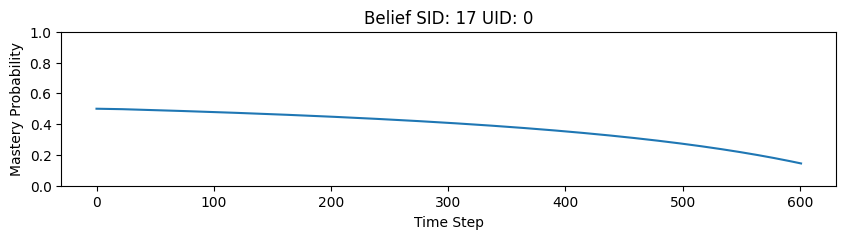

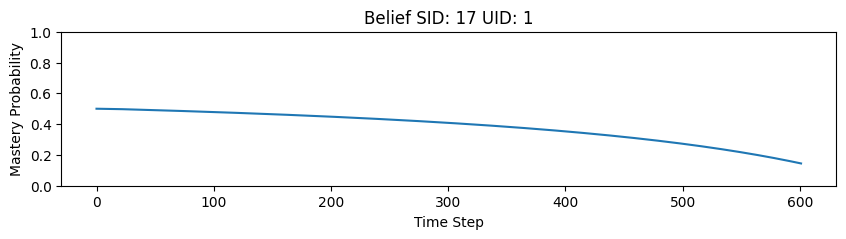

added wire
location (0, 0) (12, 0)
[<pieces.Battery object at 0x0000020A80984CD0>, <pieces.Wire object at 0x0000020A804DE1A0>]
The following is NOT in the circuit: switch
The following is NOT in the circuit: lamp
The following exists in the circuit: battery
Too many pieces were not connected to any others
[<pieces.Battery object at 0x0000020A80984CD0>, <pieces.Wire object at 0x0000020A804DE1A0>]
Circuit NOT closed
added battery
The following is NOT in the circuit: switch
The following is NOT in the circuit: lamp
The following exists in the circuit: battery
Too many pieces were not connected to any others
Circuit NOT closed
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On B

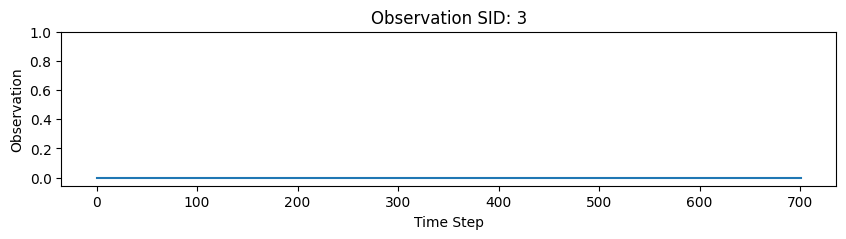

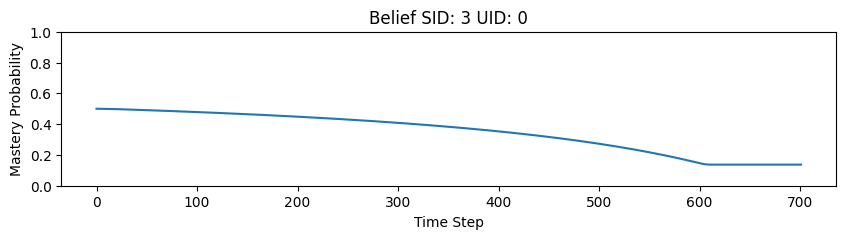

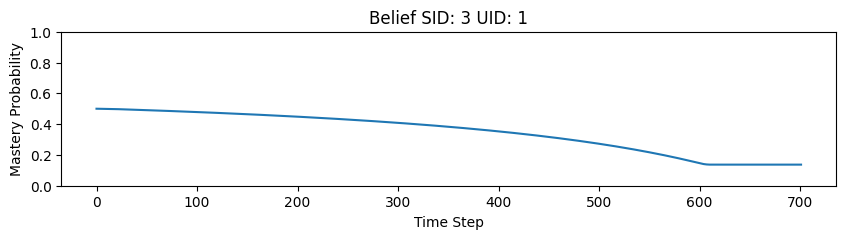

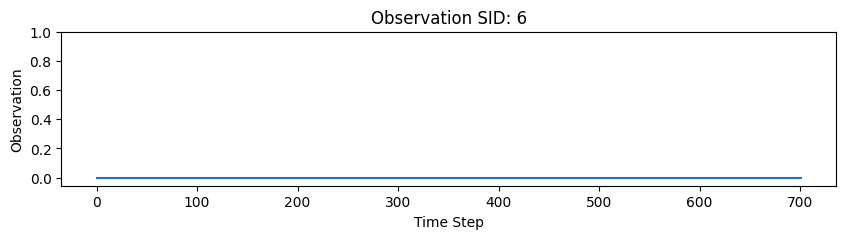

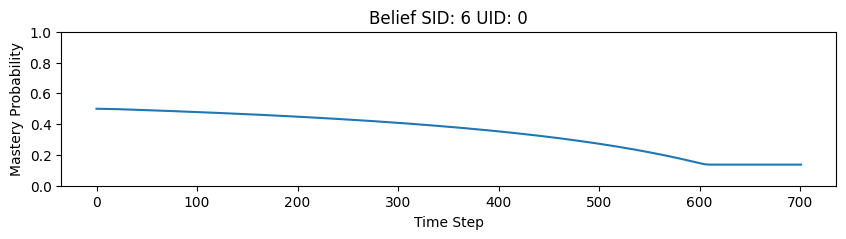

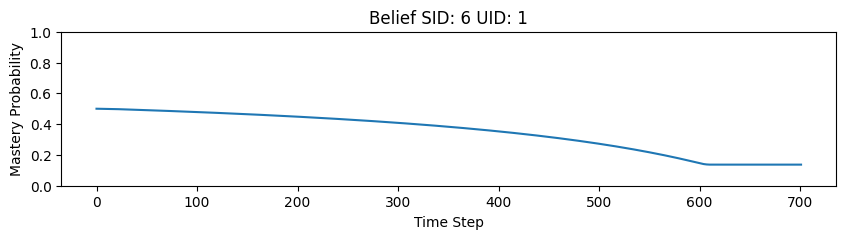

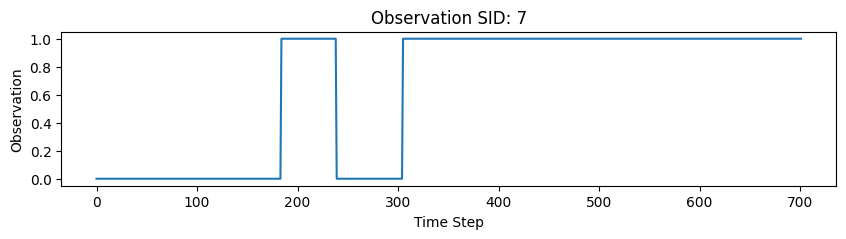

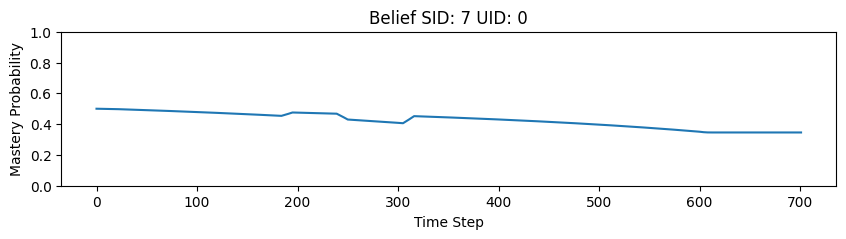

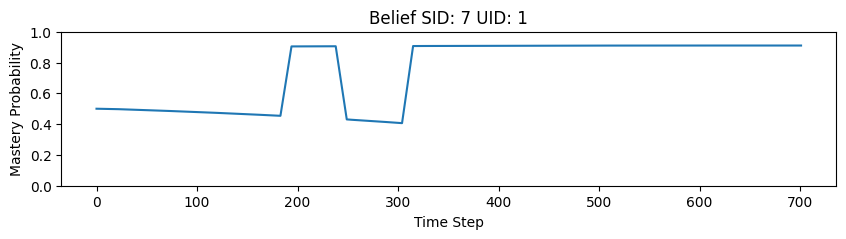

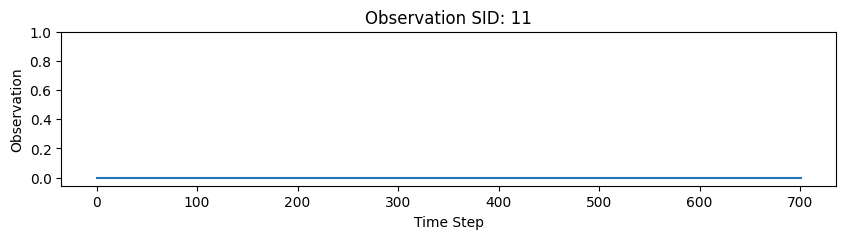

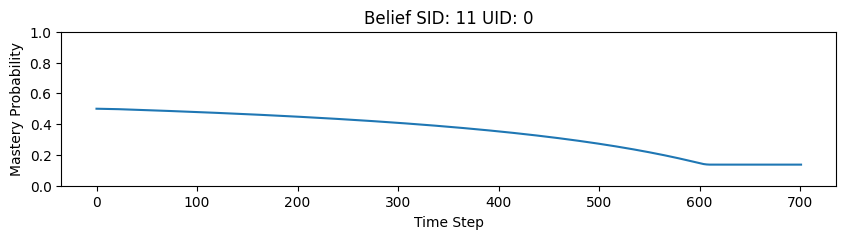

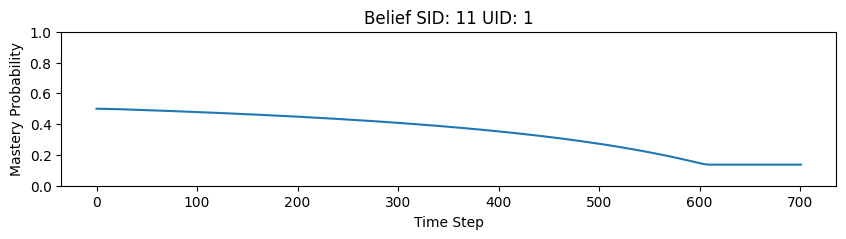

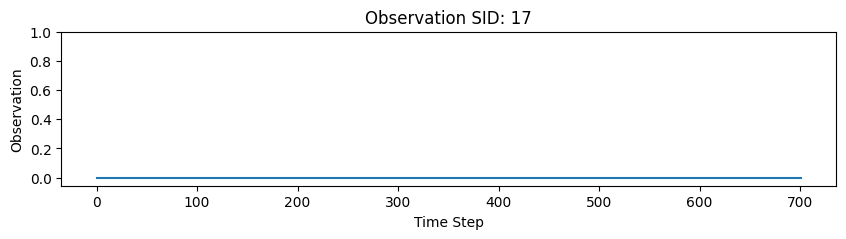

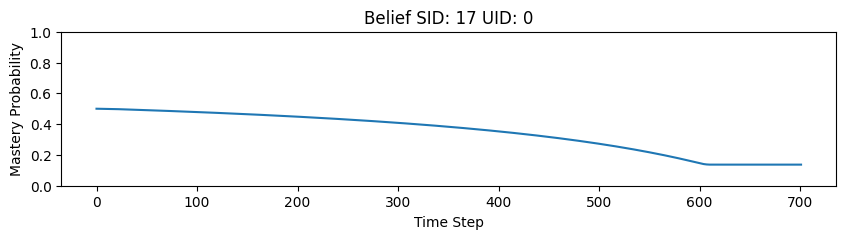

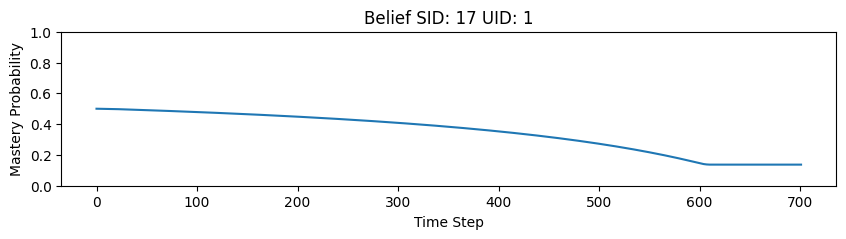

Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
added switch
[<pieces.Battery object at 0x0000020A809AFBB0>, <pieces.Switch object at 0x0000020A7941D570>]
The following exists in the circuit: switch
The following is NOT in the circuit: lamp
The following exists in the circuit: battery
There were several pieces that were connected to other pieces
[<pieces.Battery object at 0x0000020A809AFBB0>, <pieces.Switch object at 0x0000020A7941D570>]
Circuit NOT closed
added wire
location (0, 0) (12, 0)
[<pieces.Battery object at 0x0000020A809AFBB0>, <pieces.Switch object at 0x0000020A7941D570>, <pieces.Wire object at 0x0000020A7917ABF0>]
The following exists in the circuit: switch
The following is NOT in the circuit: lamp
The following exists in the circuit: battery
There were se

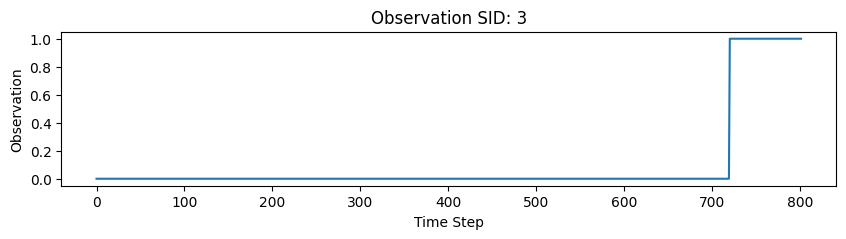

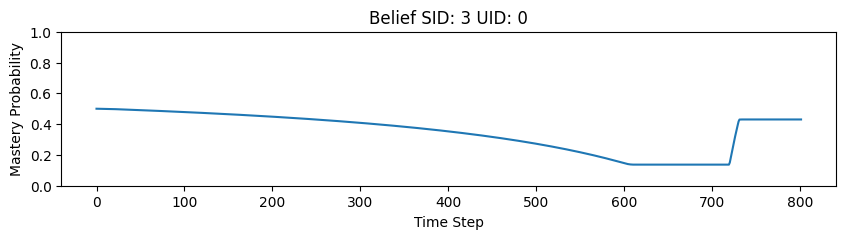

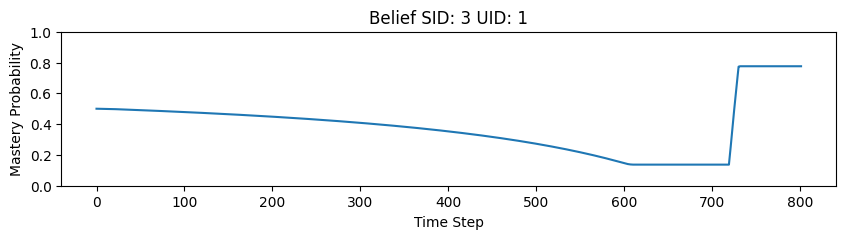

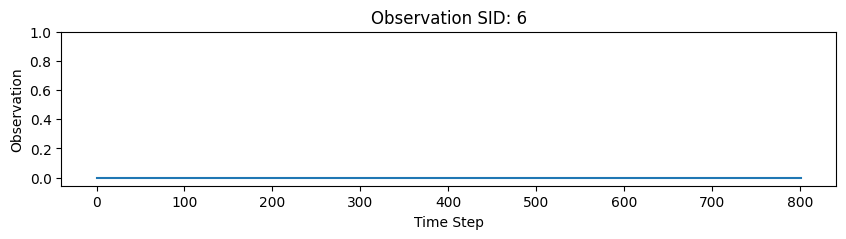

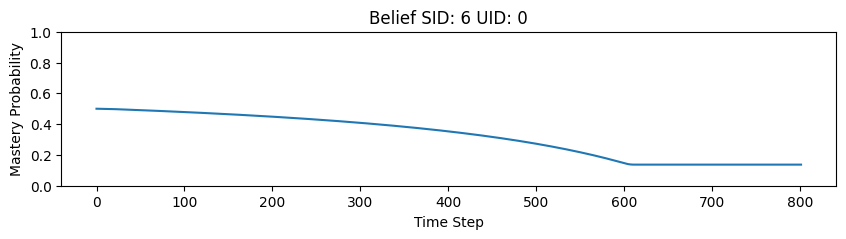

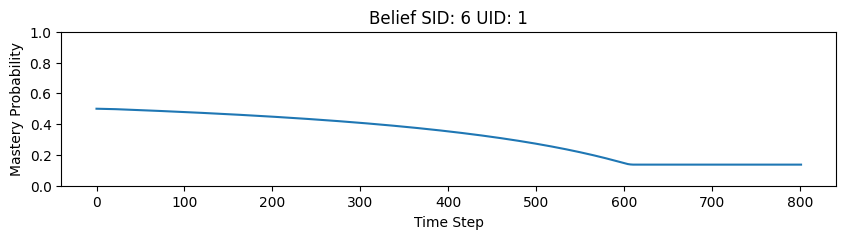

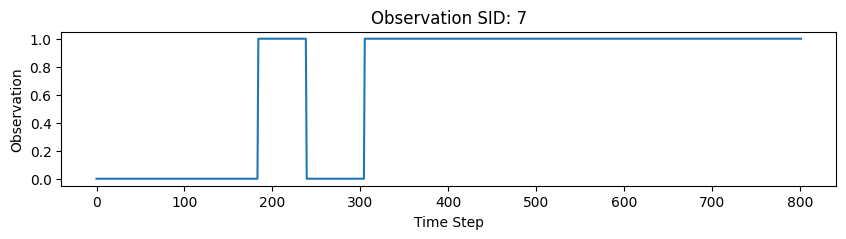

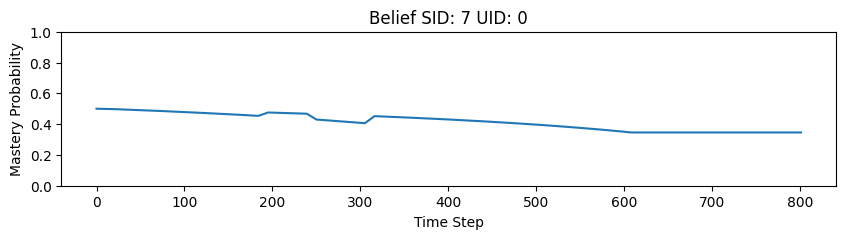

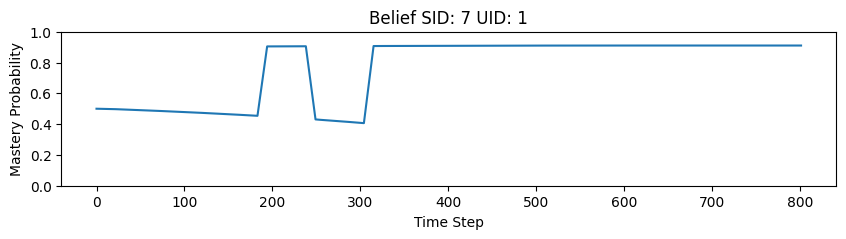

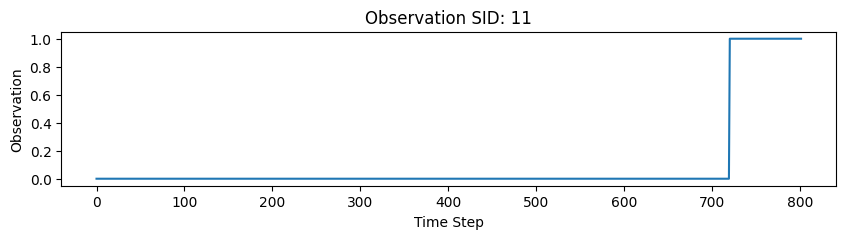

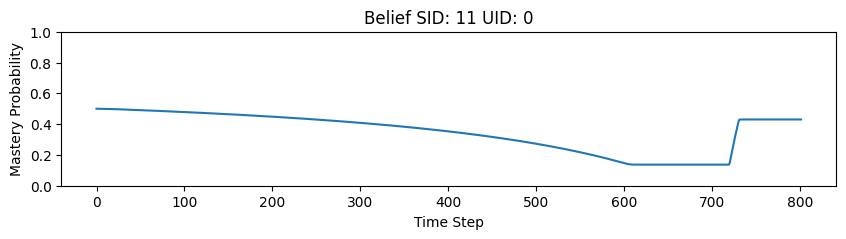

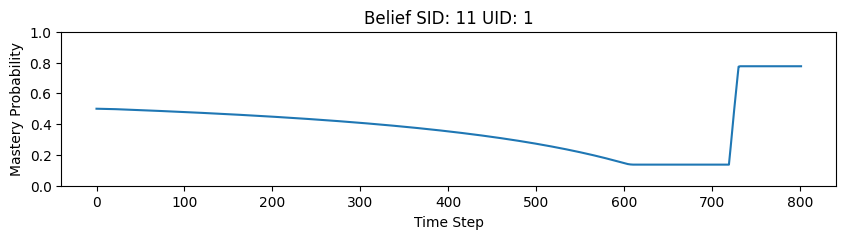

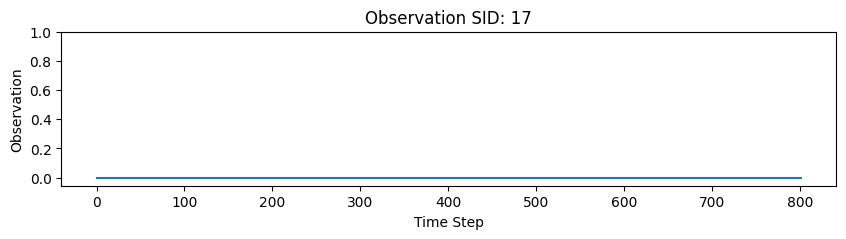

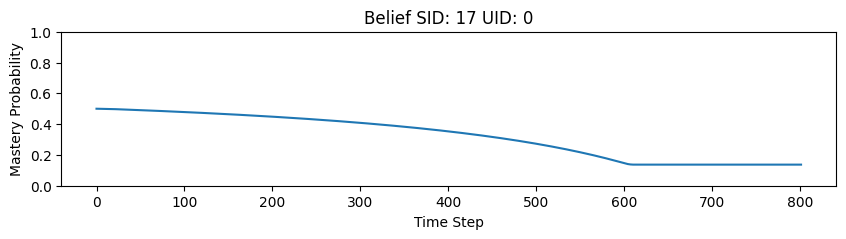

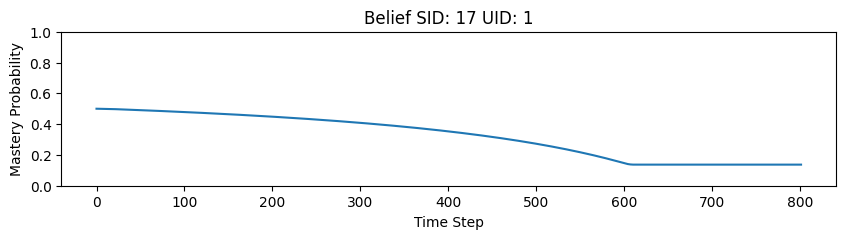

Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
added battery
added Lamp
added switch
[<pieces.Battery object at 0x0000020A76EA0FA0>, <pieces.Lamp object at 0x0000020A76EA3730>, <pieces.Switch object at 0x0000020A76EA35B0>]
BRRRRR
ALL CIRCUITS CHECK
la1
[]
The following exists in the circuit: switch
The following exists in the circuit: lamp
The following exists in the circuit: battery
There were several pieces that were connected to other pieces
[<pieces.Batt

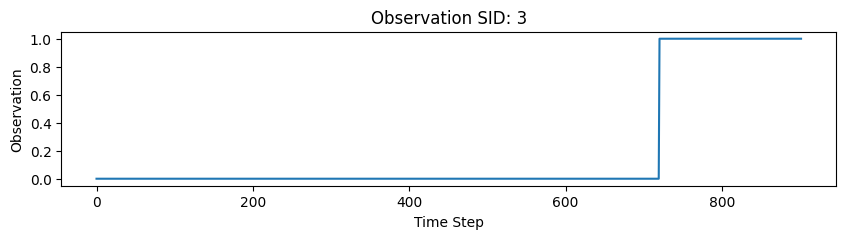

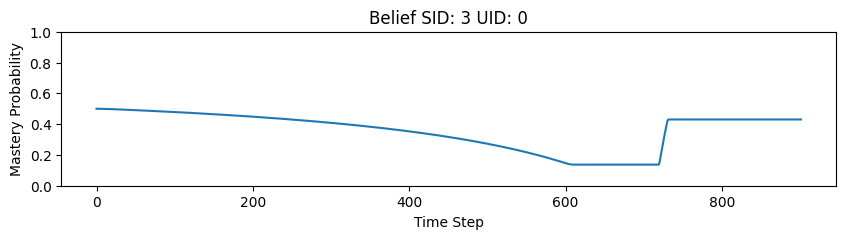

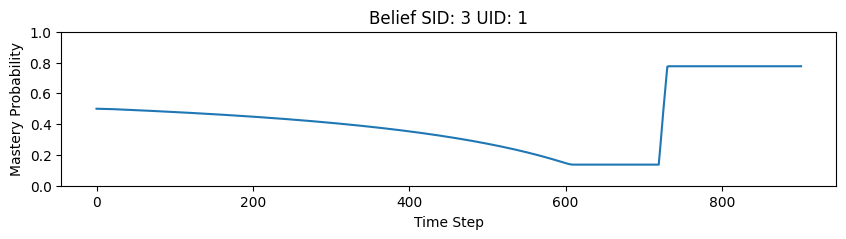

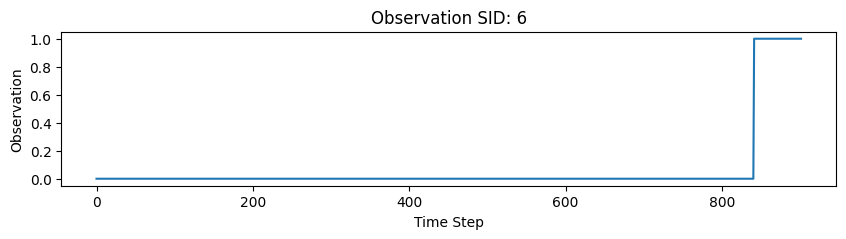

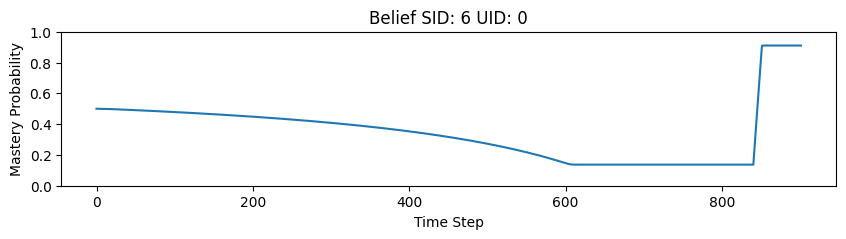

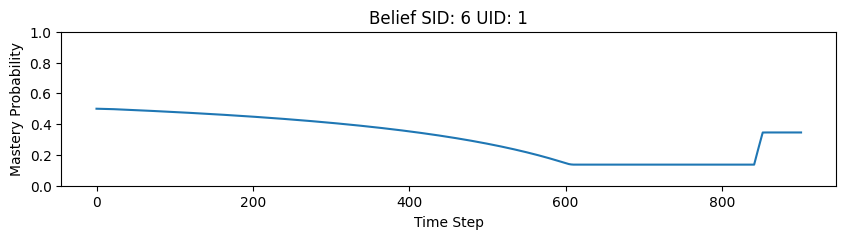

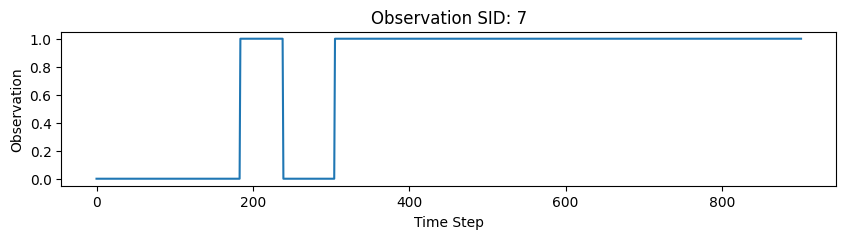

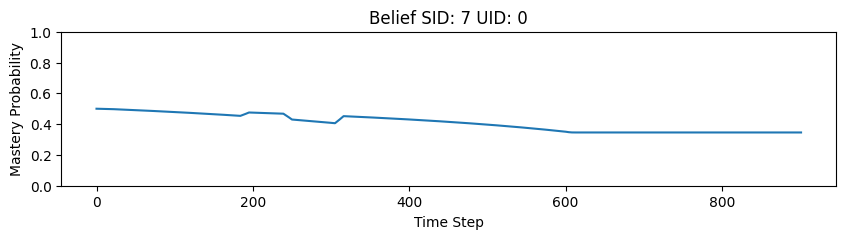

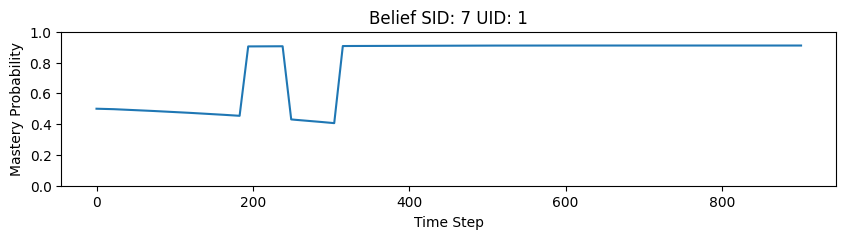

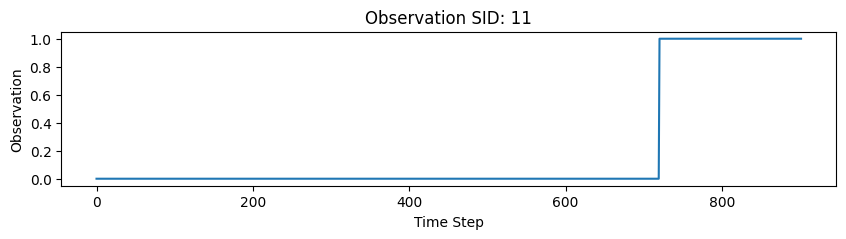

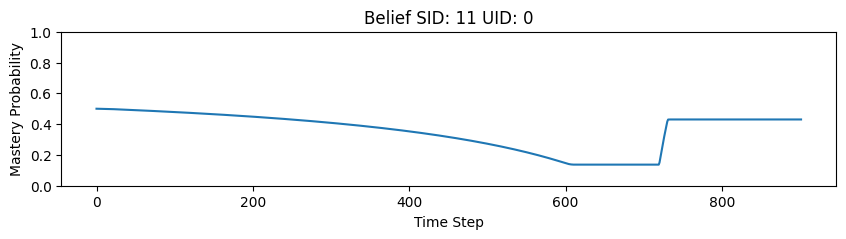

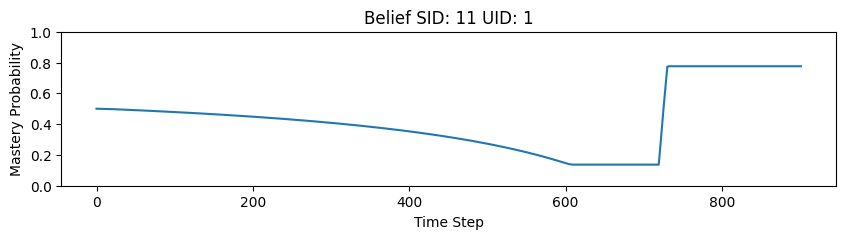

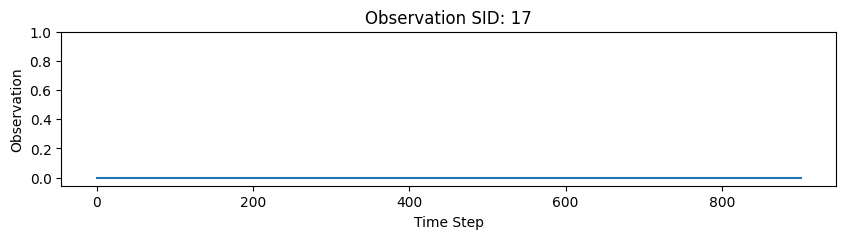

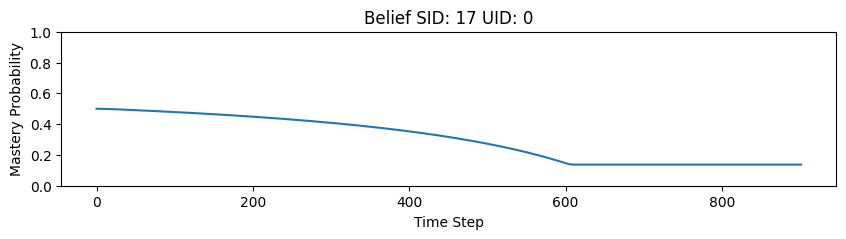

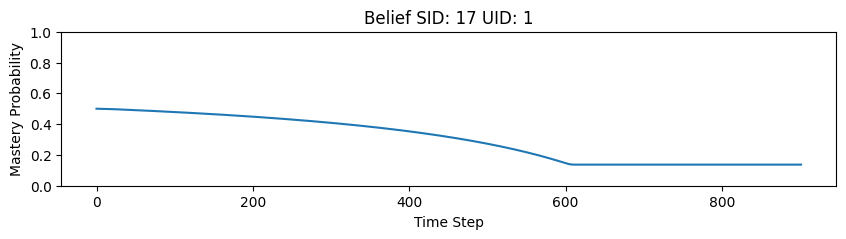

1000


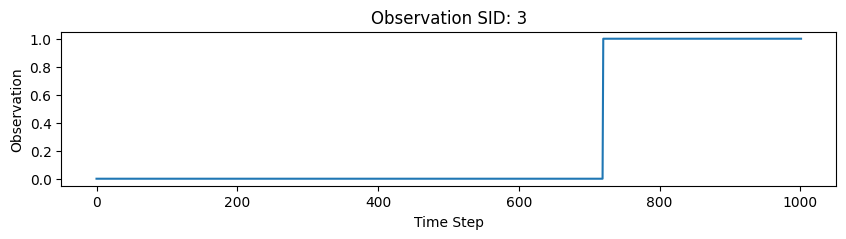

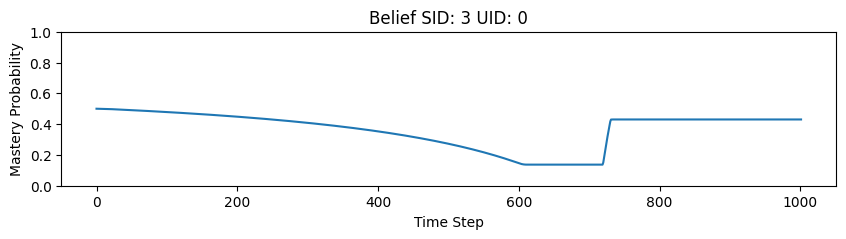

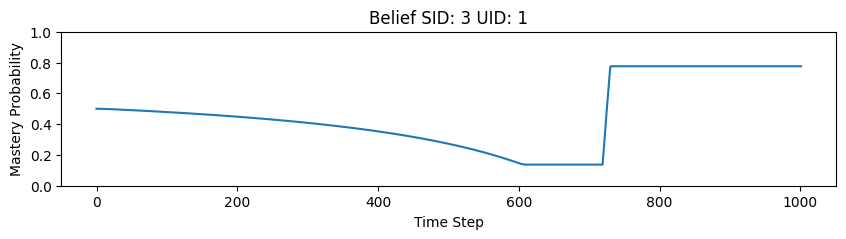

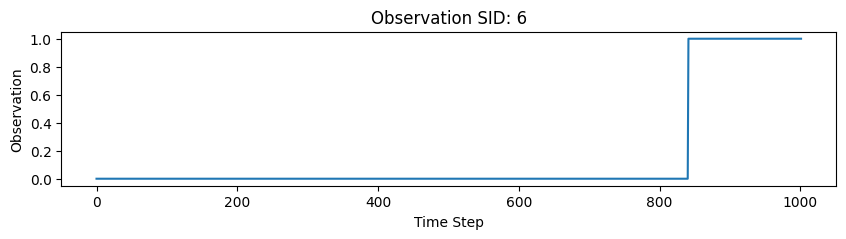

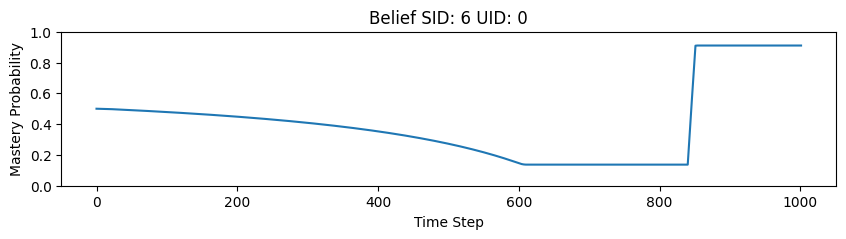

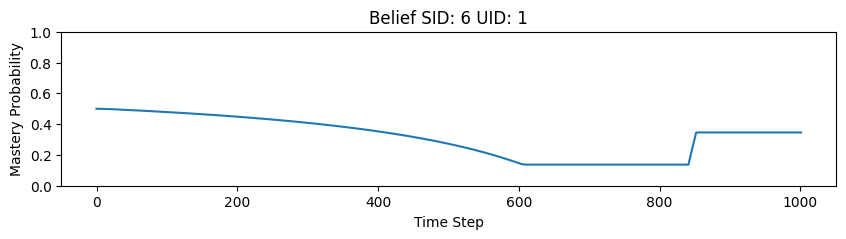

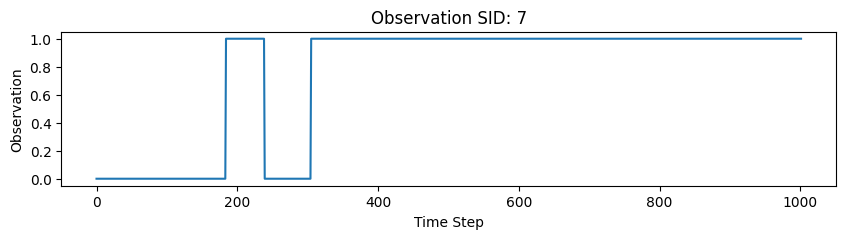

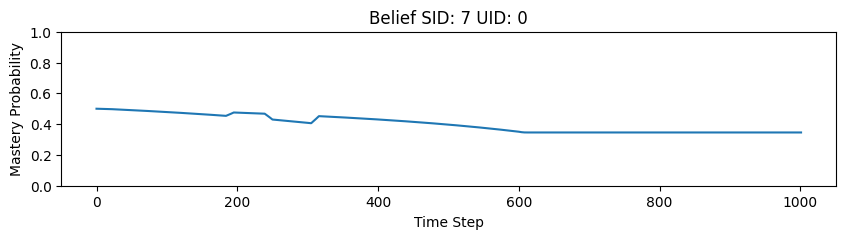

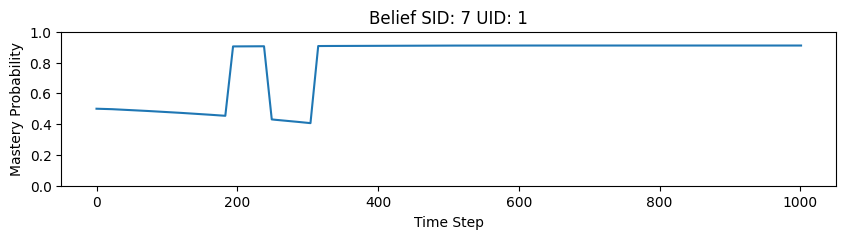

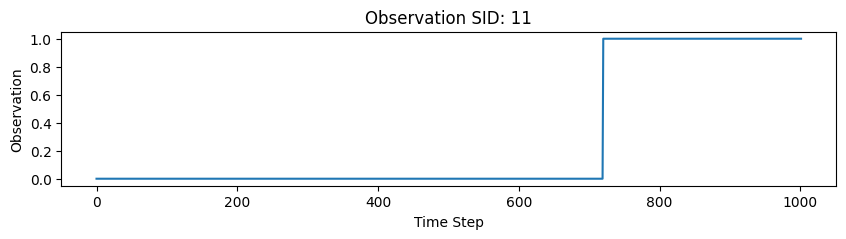

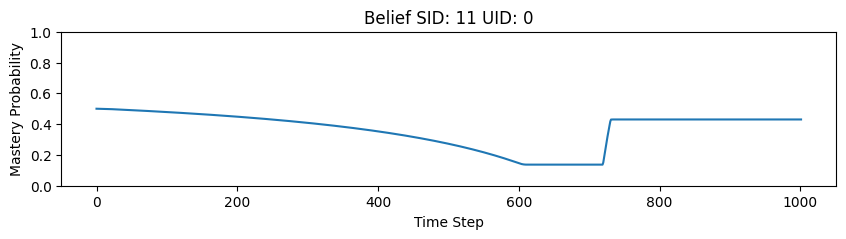

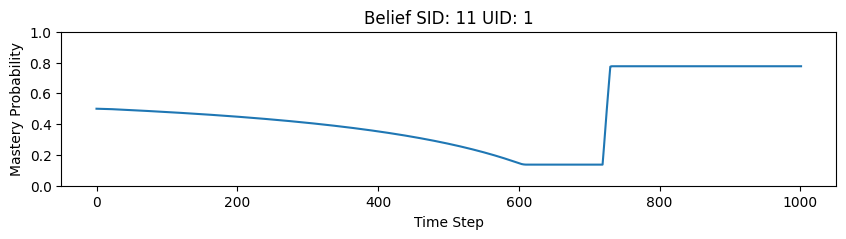

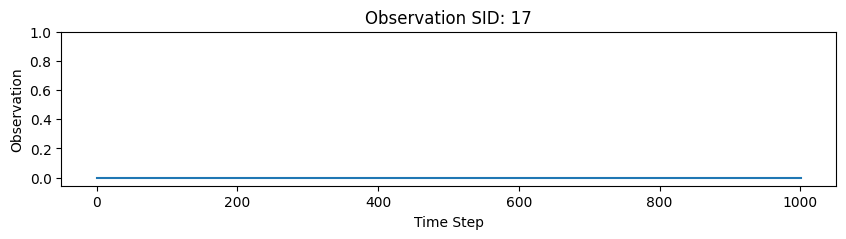

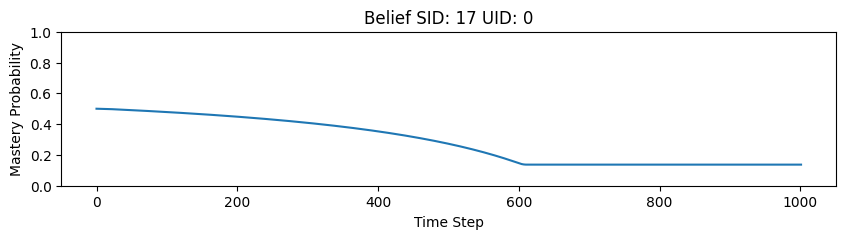

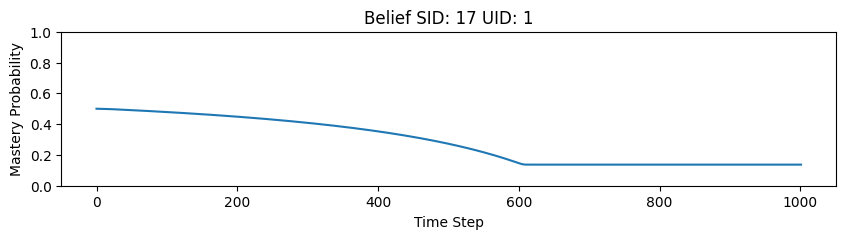

added wire
location (0, 0) (12, 0)
[<pieces.Battery object at 0x0000020A76EA0FA0>, <pieces.Lamp object at 0x0000020A76EA3730>, <pieces.Switch object at 0x0000020A76EA35B0>, <pieces.Wire object at 0x0000020A804DE8F0>]
BRRRRR
ALL CIRCUITS CHECK
la1
[]
The following exists in the circuit: switch
The following exists in the circuit: lamp
The following exists in the circuit: battery
There were several pieces that were connected to other pieces
[<pieces.Battery object at 0x0000020A76EA0FA0>, <pieces.Lamp object at 0x0000020A76EA3730>, <pieces.Switch object at 0x0000020A76EA35B0>, <pieces.Wire object at 0x0000020A804DE8F0>]
BRRRRR
ALL CIRCUITS CHECK
la1
[]
Circuit NOT closed
added battery
added Lamp
added switch
added wire
location (4, 9) (8, 9)
[<pieces.Battery object at 0x0000020A80589C90>, <pieces.Lamp object at 0x0000020A80589D80>, <pieces.Switch object at 0x0000020A80588910>, <pieces.Wire object at 0x0000020A8143CC70>]
BRRRRR
ALL CIRCUITS CHECK
la2
[]
The following exists in the circuit:

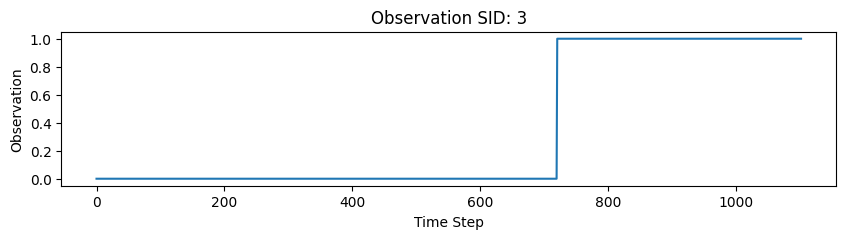

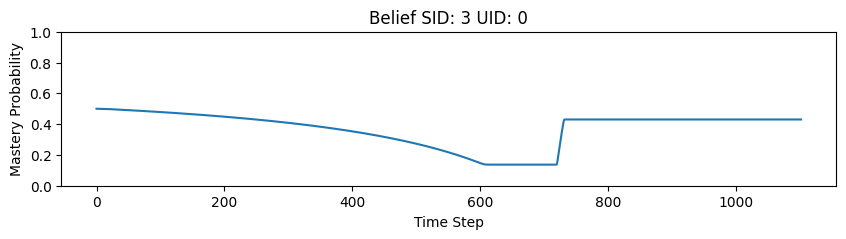

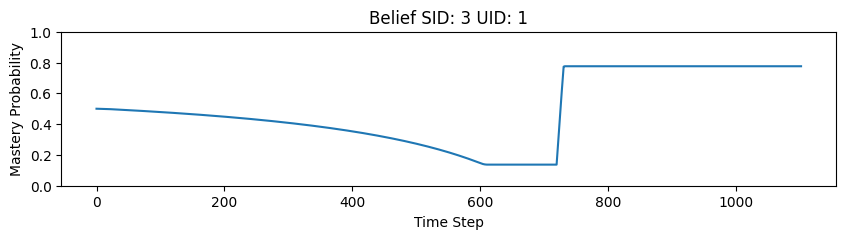

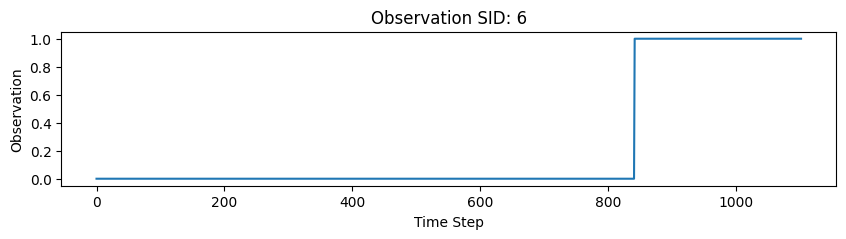

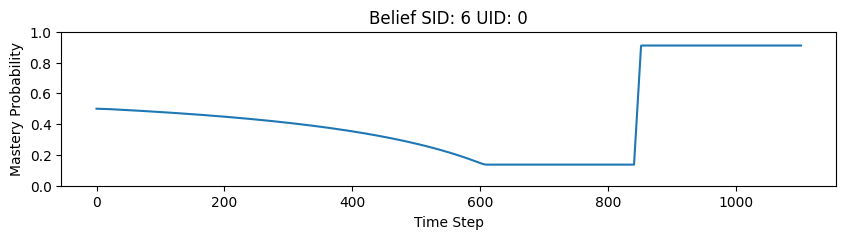

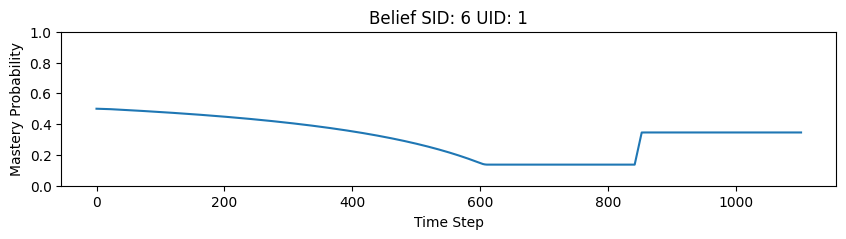

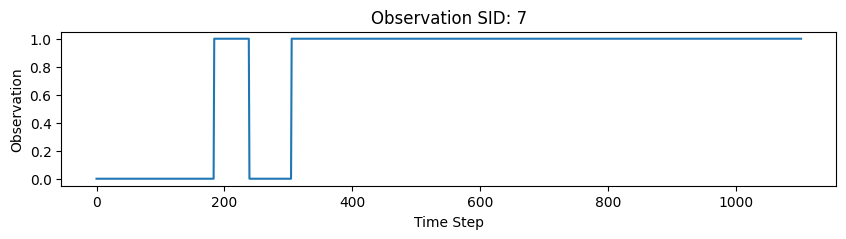

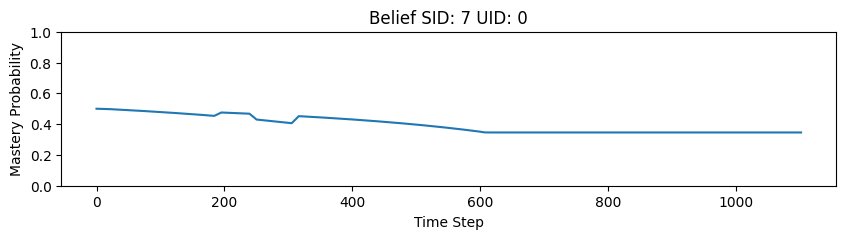

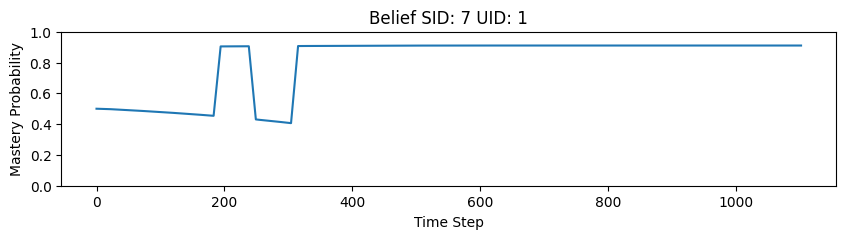

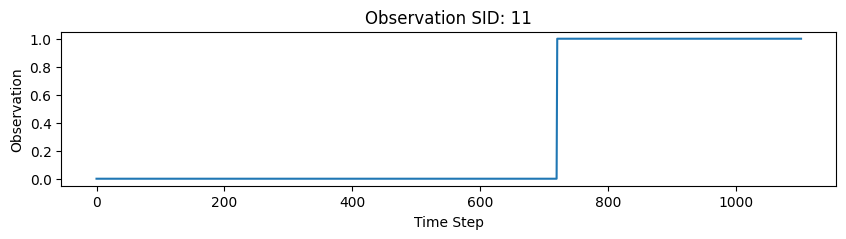

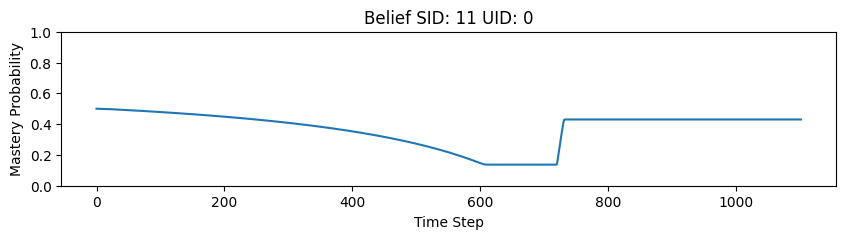

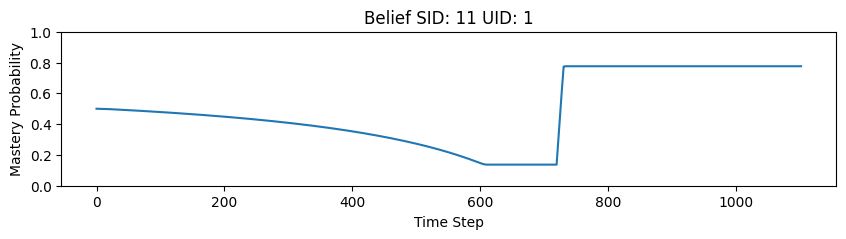

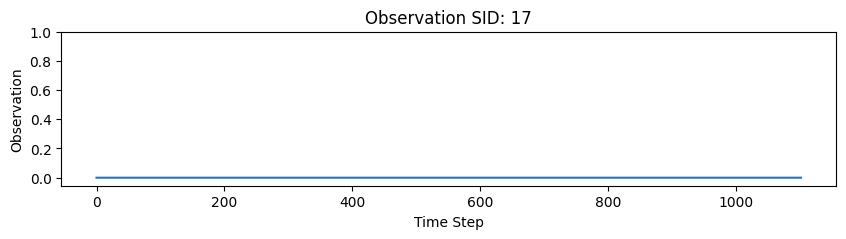

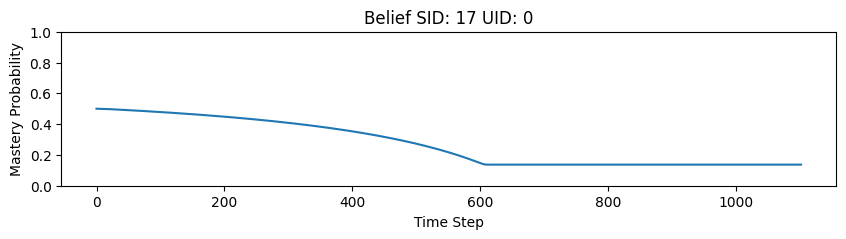

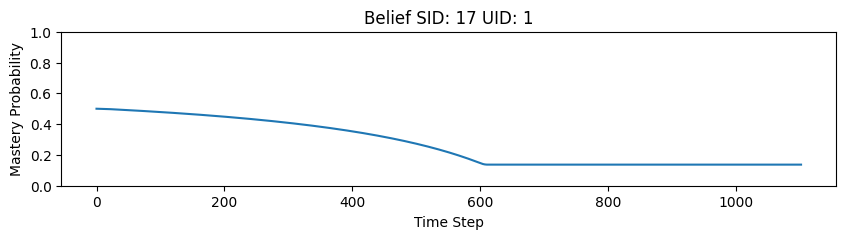

Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Bo

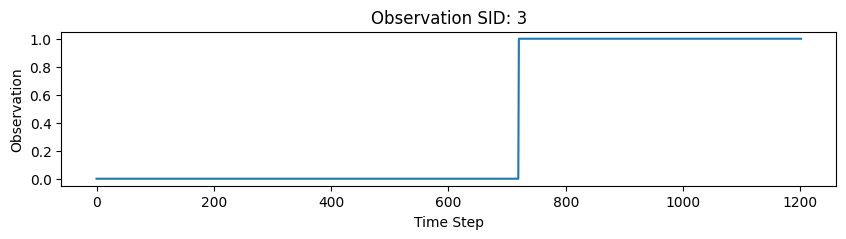

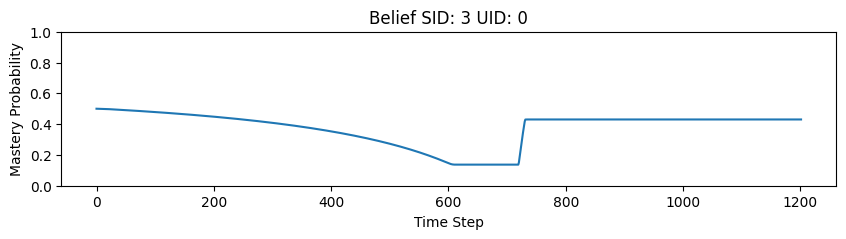

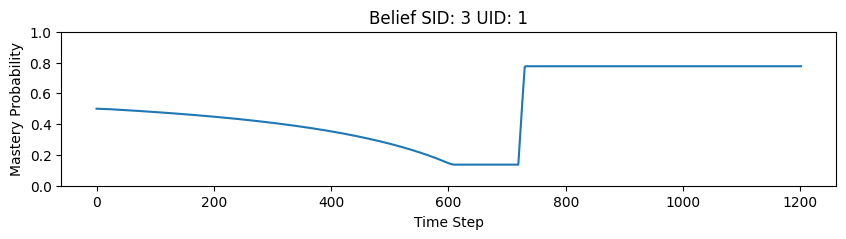

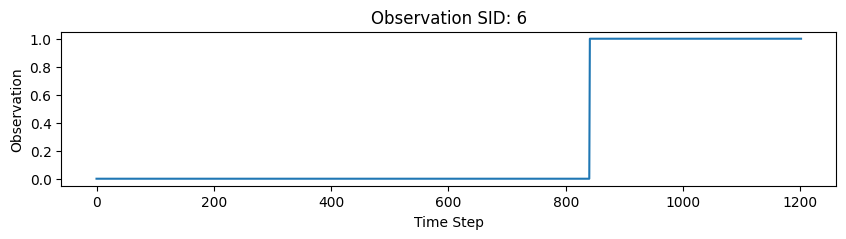

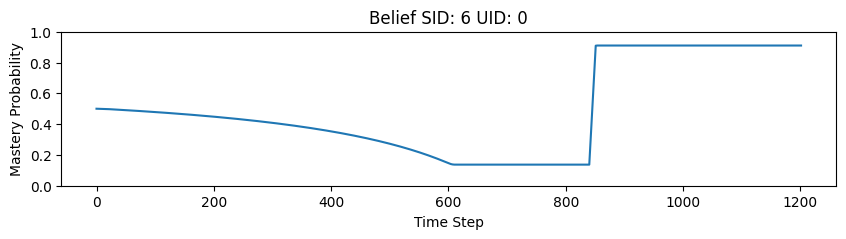

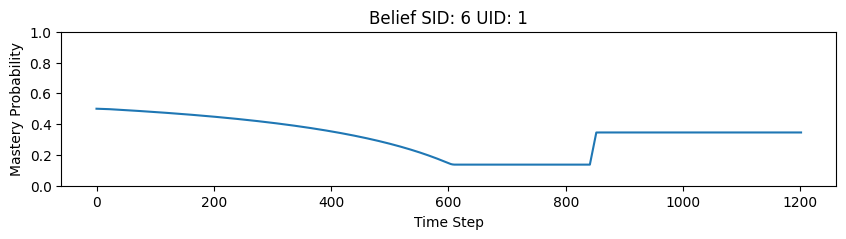

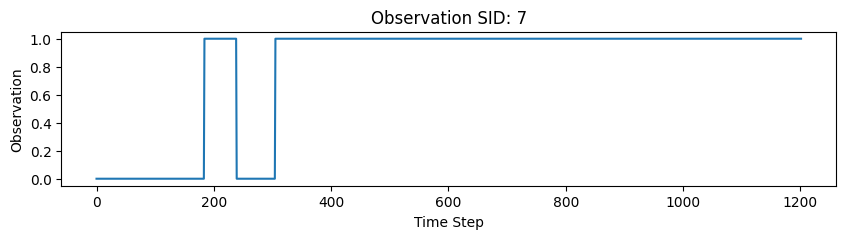

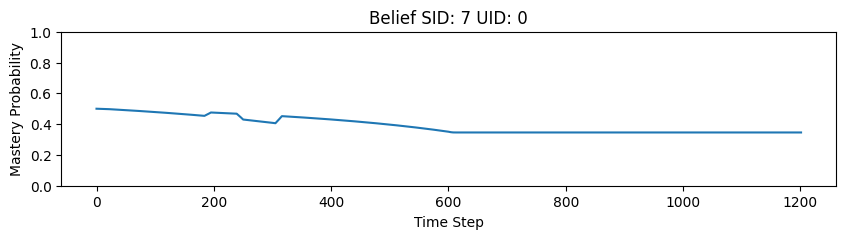

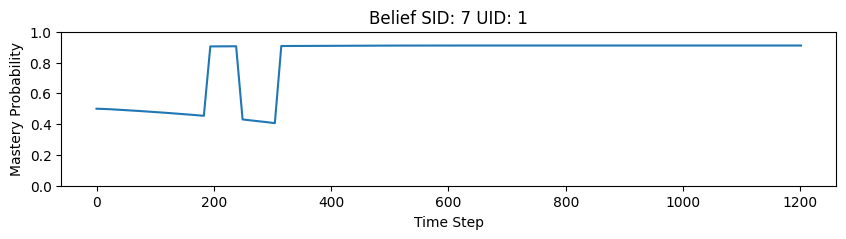

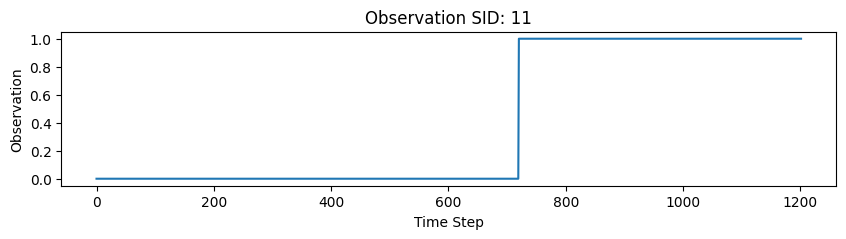

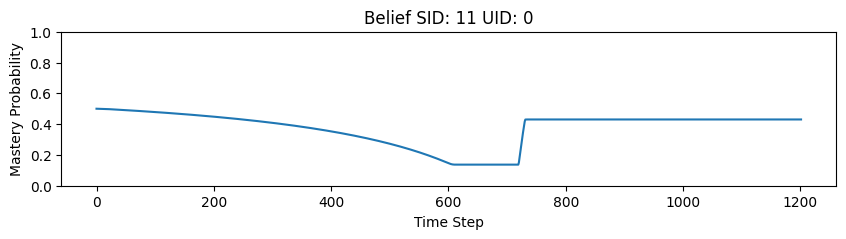

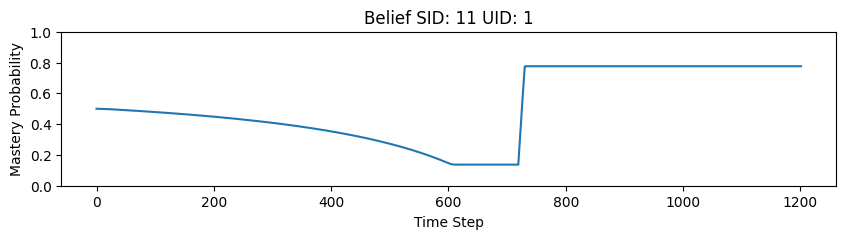

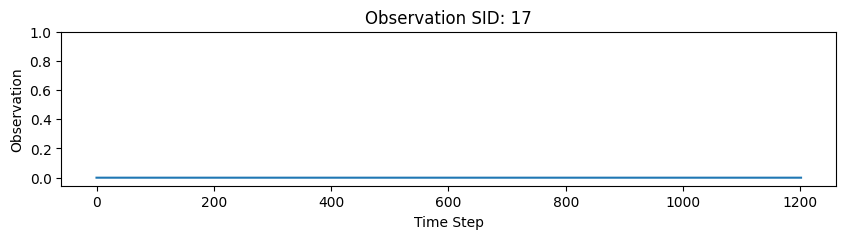

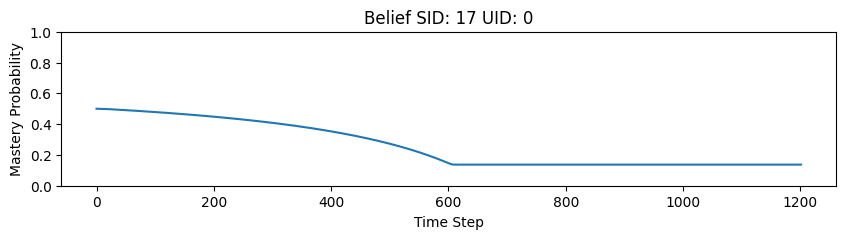

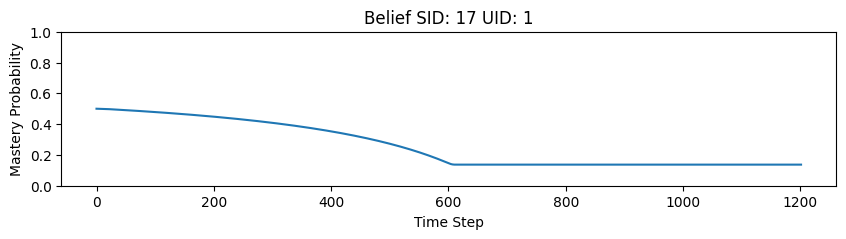

Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
1300


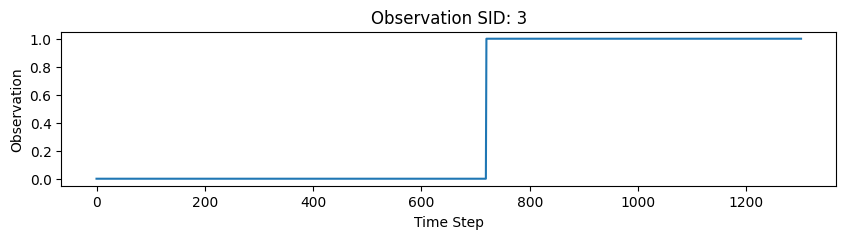

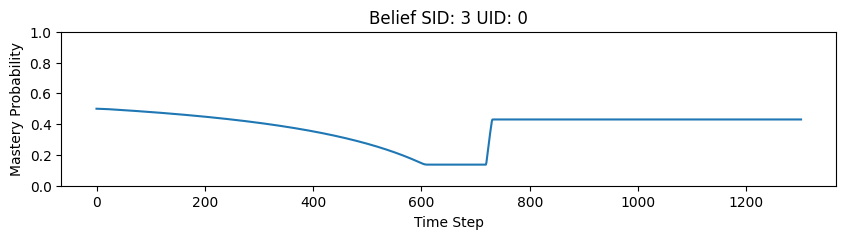

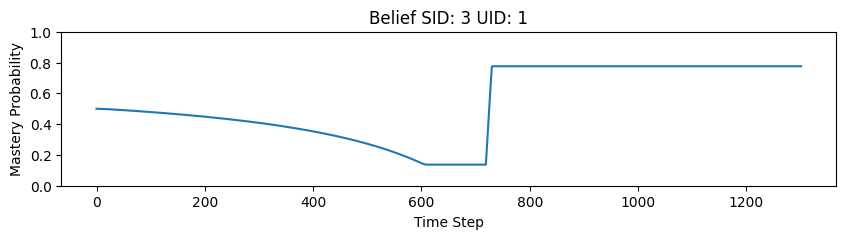

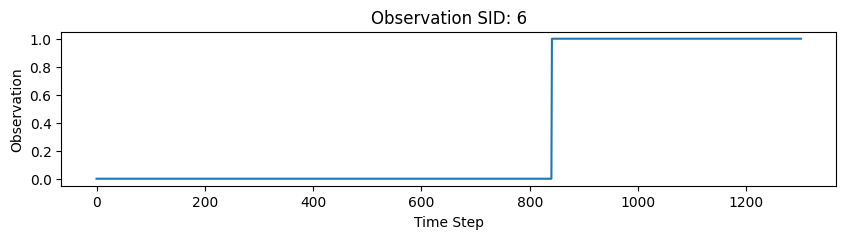

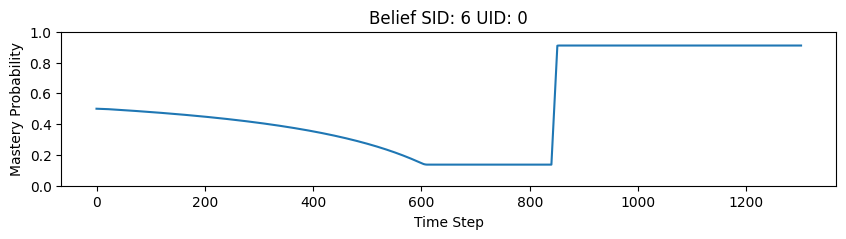

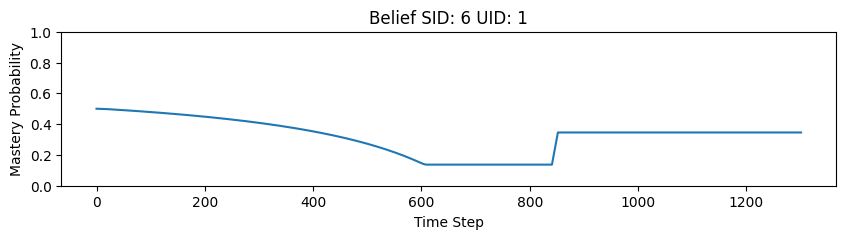

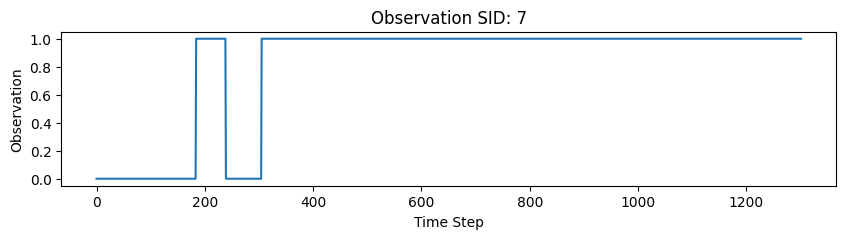

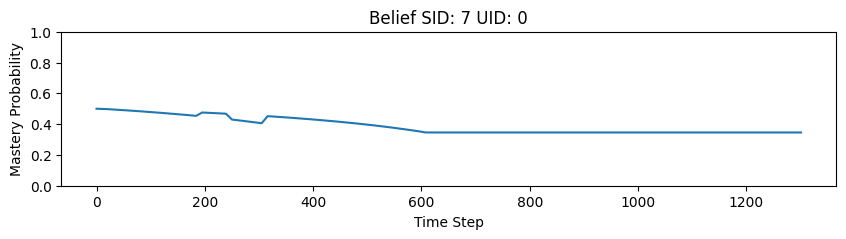

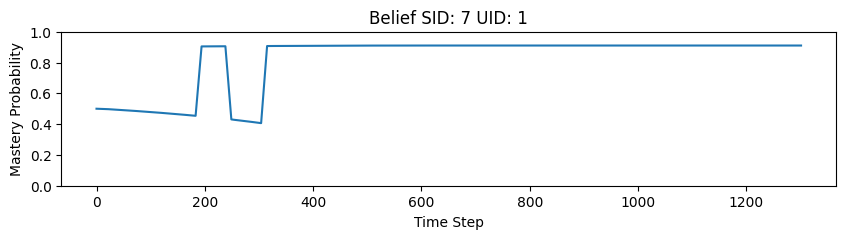

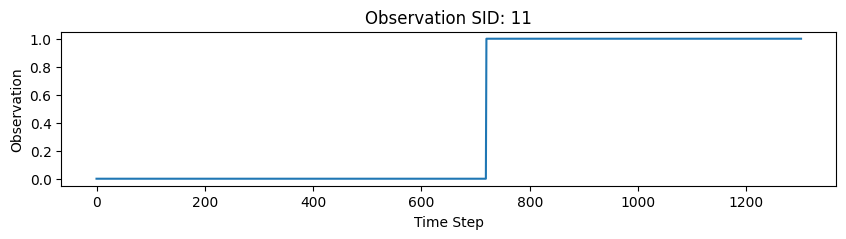

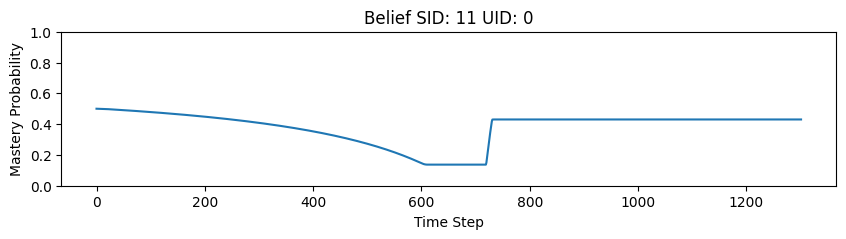

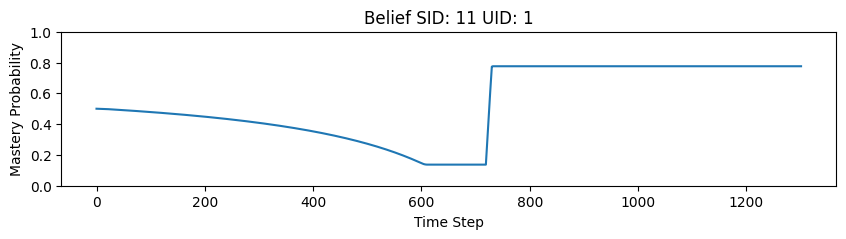

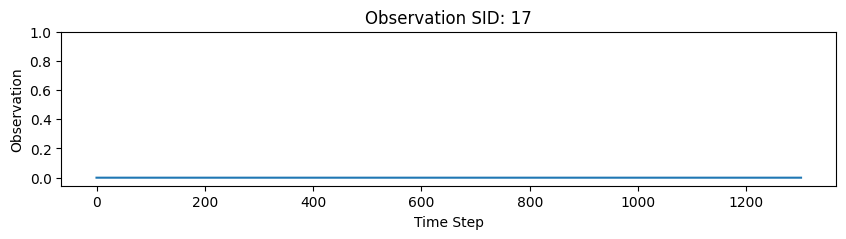

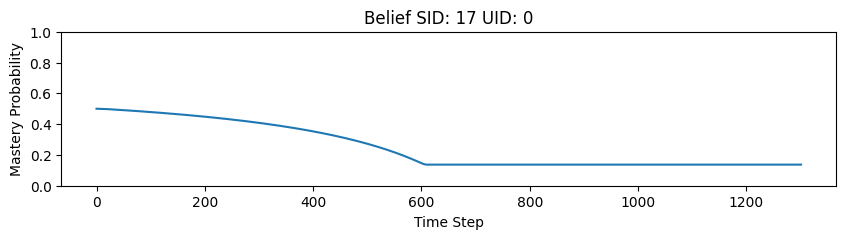

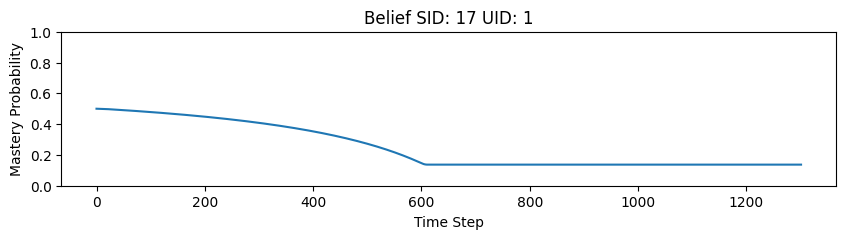

Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Bo

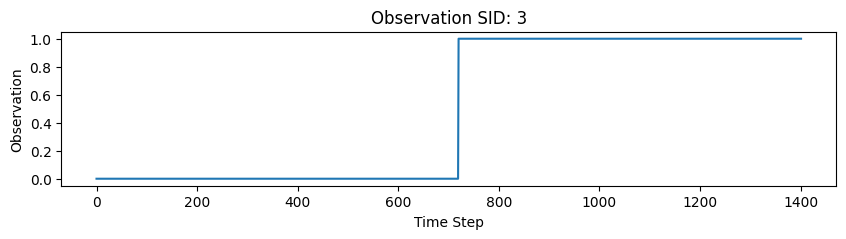

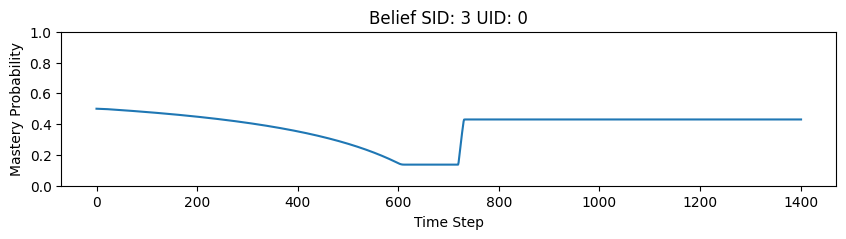

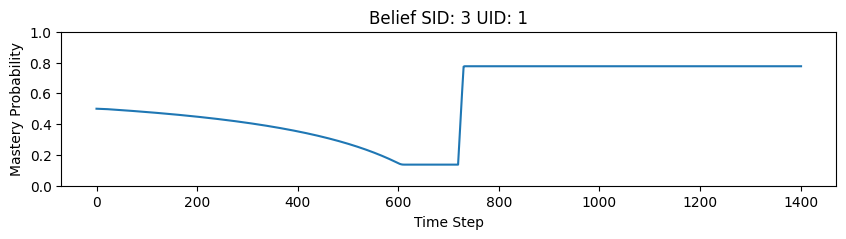

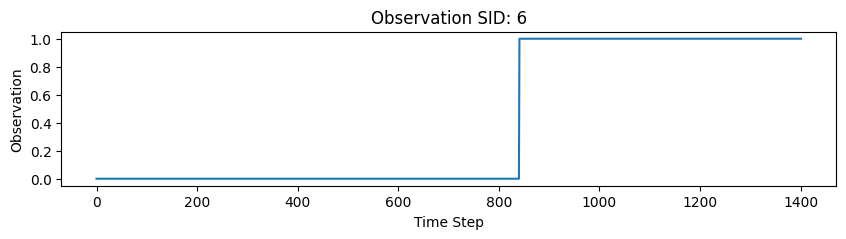

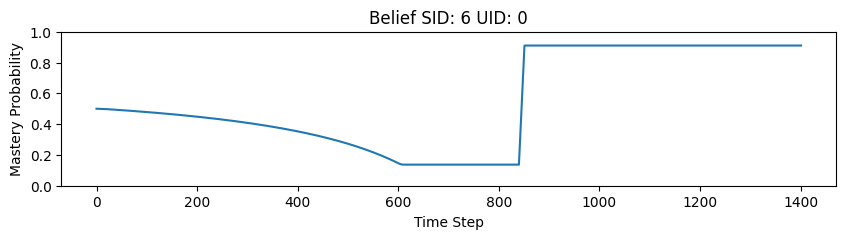

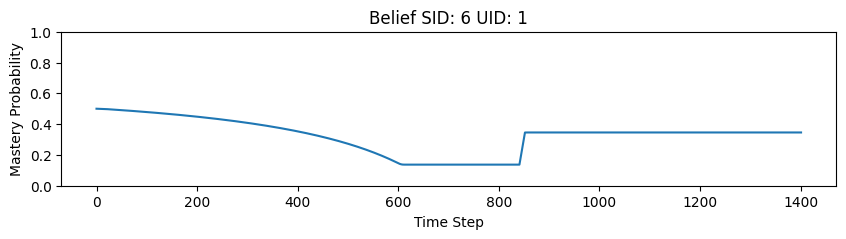

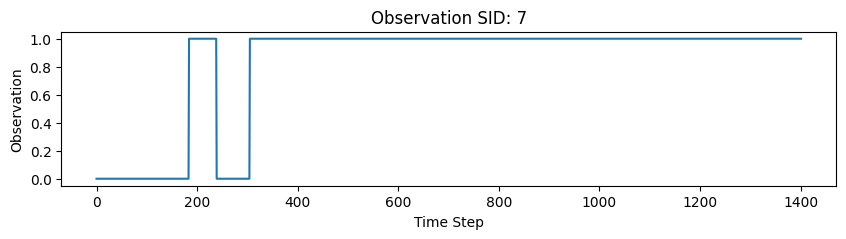

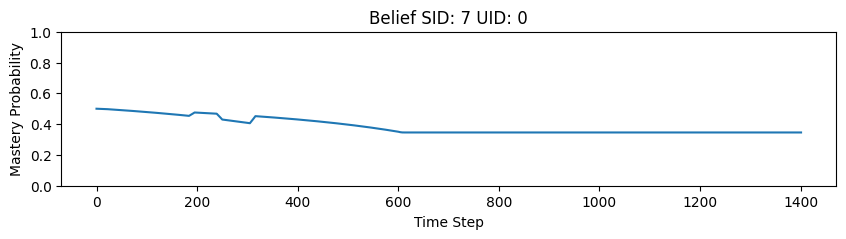

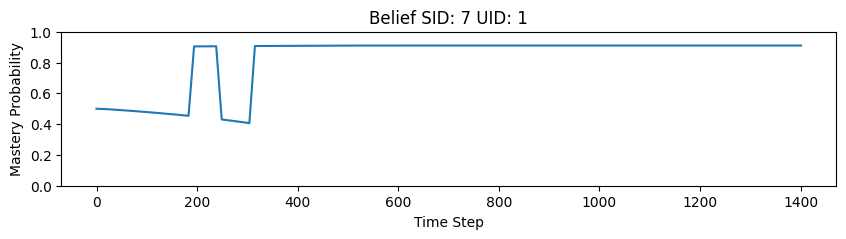

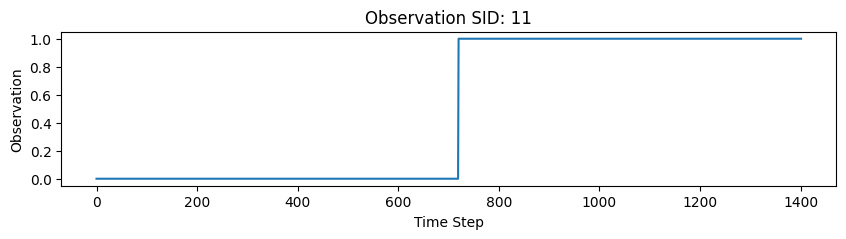

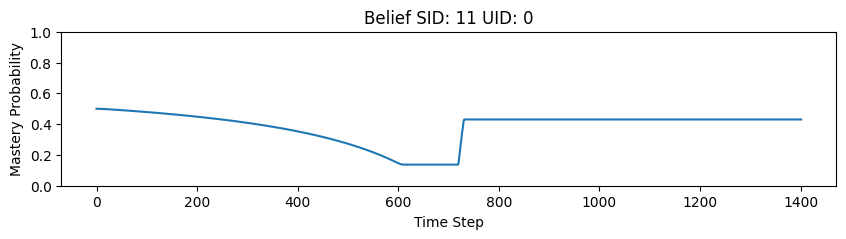

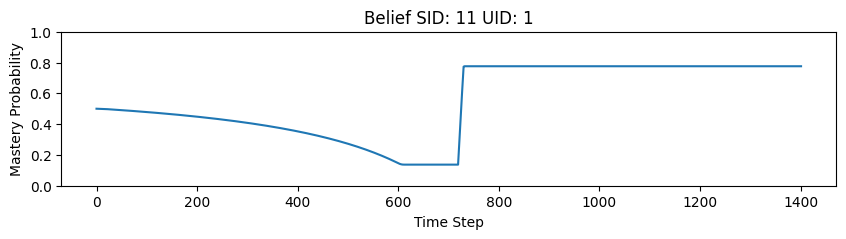

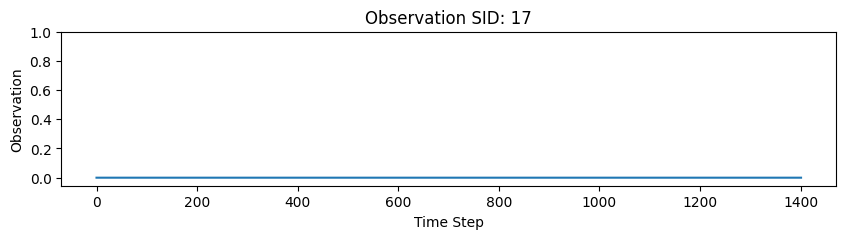

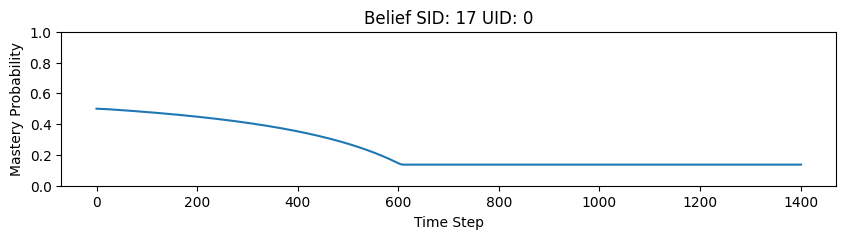

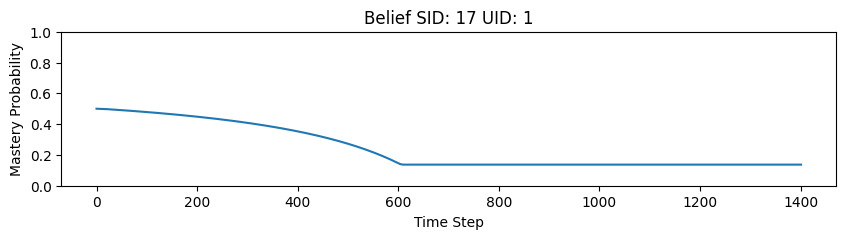

Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Bo

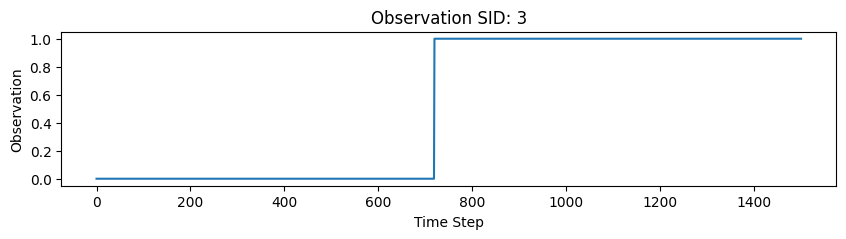

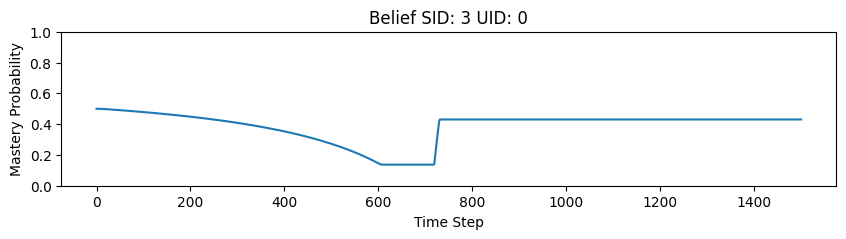

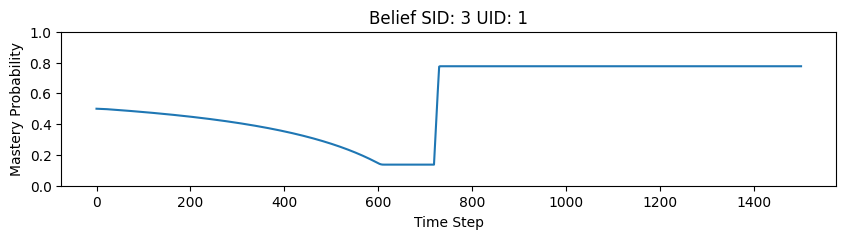

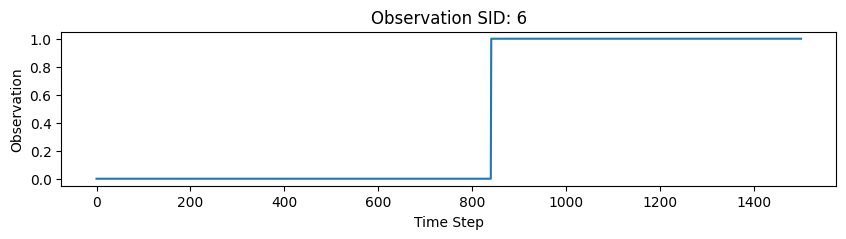

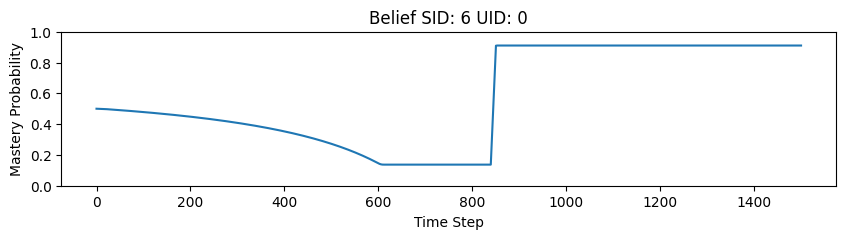

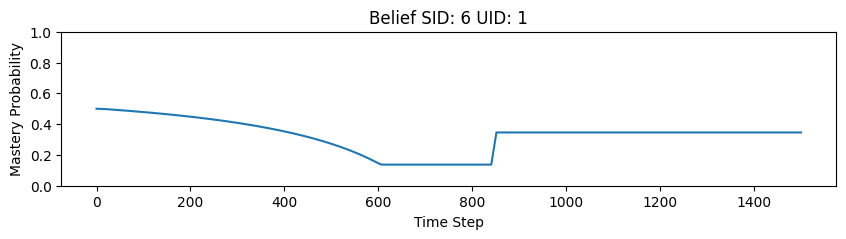

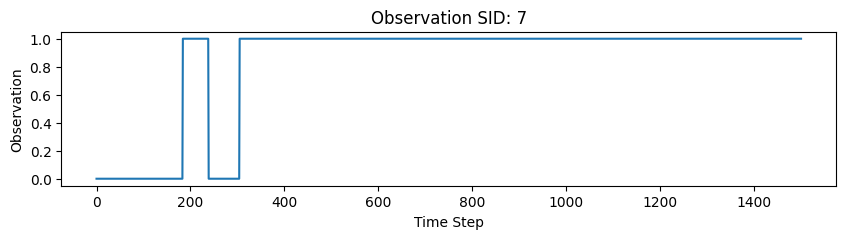

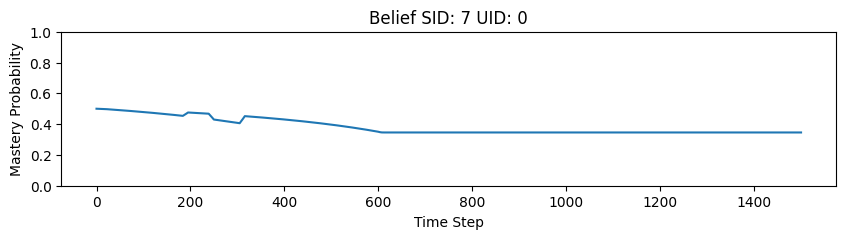

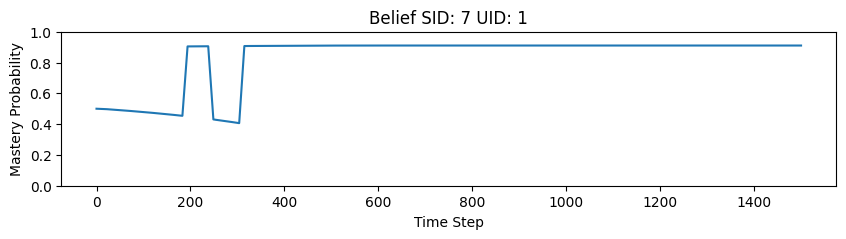

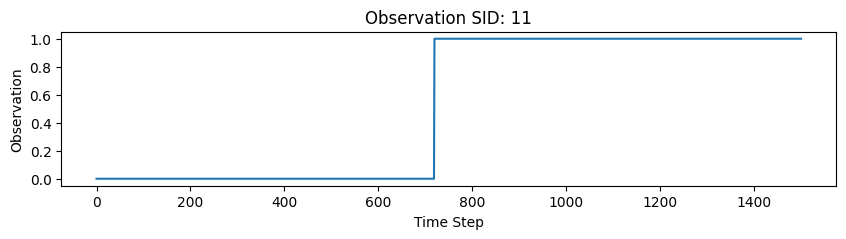

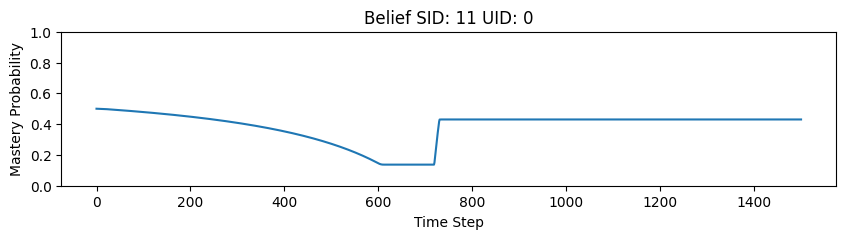

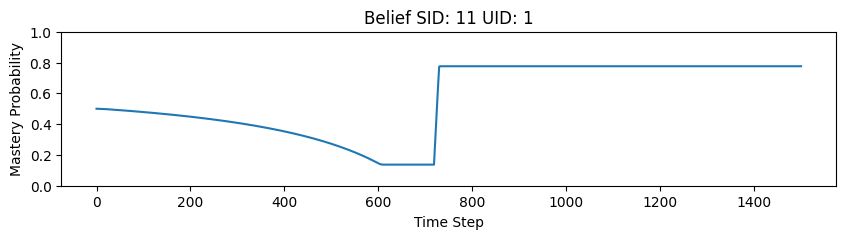

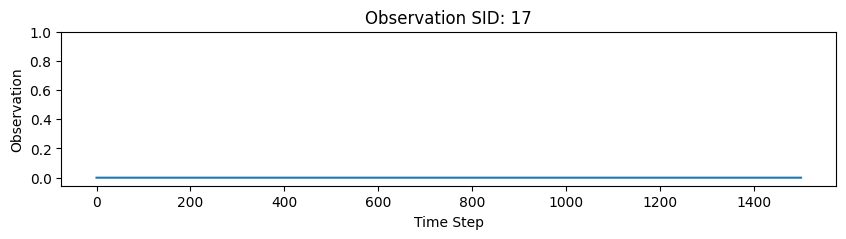

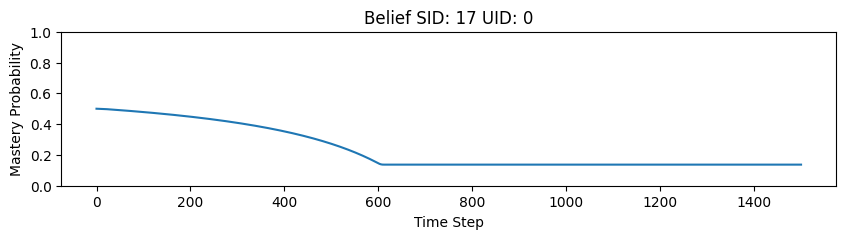

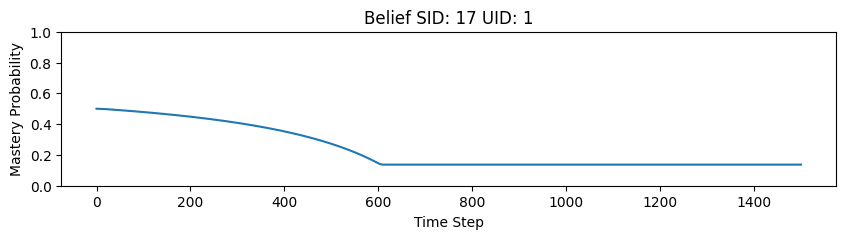

Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
added battery
added Lamp
added switch
added wire
location (4, 10) (4, 14)
added wire
location (8, 10) (8, 14)
added wire
location (4, 4) (8, 4)
[<pieces.Battery object at 0x0000020A76A8AD40>, <pieces.Lamp object at 0x0000020A76A8B700>, <pieces.Switch object at 0x0000020A76A89B70>, <pieces.Wire object at 0x0000020A76A899C0>, <pieces.Wire object at 0x0000020A76A8B4C0>, <pieces.Wire object at 0x0000020A81189F00>]
BRRRRR
[<pieces.Lamp object at 0x0000020A76A8B700>, <pieces.Wire object at 0x0000020A76A899C0>]
ALL CIRCUITS CHECK
la9
[]
ALL CIRCUITS CHECK
w14
['la9']
la9
BRRRRR
[<pieces.Lamp object at 0x0000020A76A8B700>, <pieces.Wire object at 0x0000020A76A899C0>]
ALL CIRCUITS CHECK
w14
[]
ALL CIR

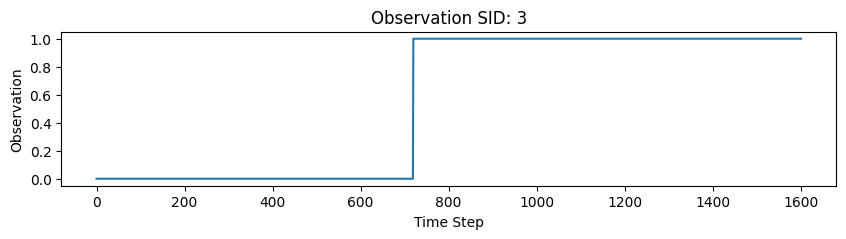

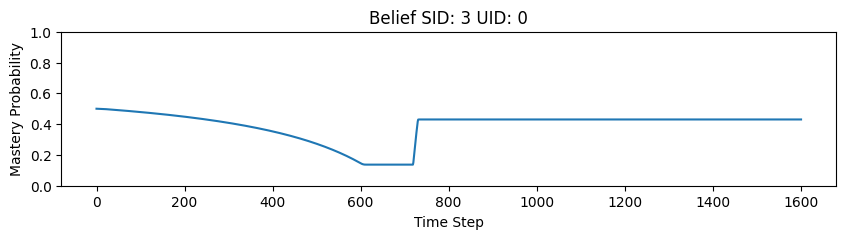

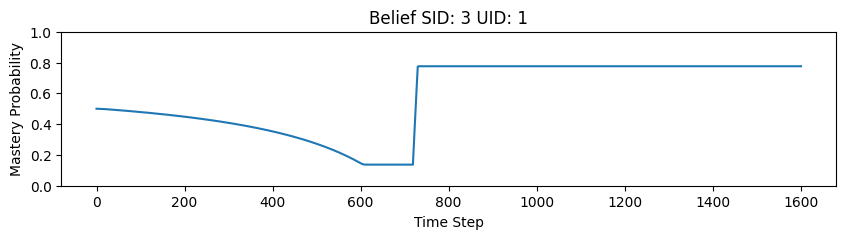

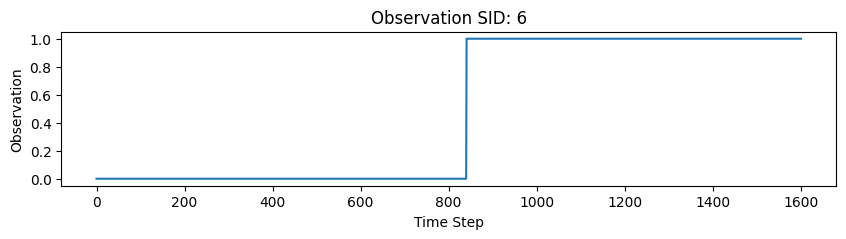

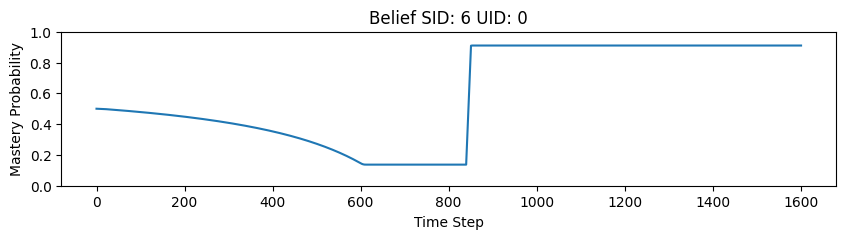

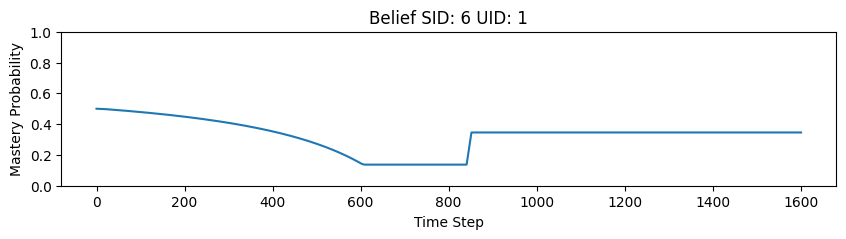

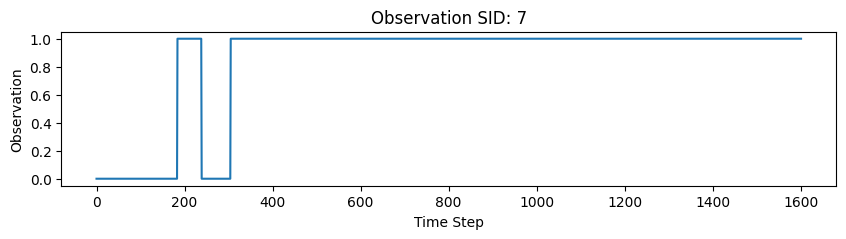

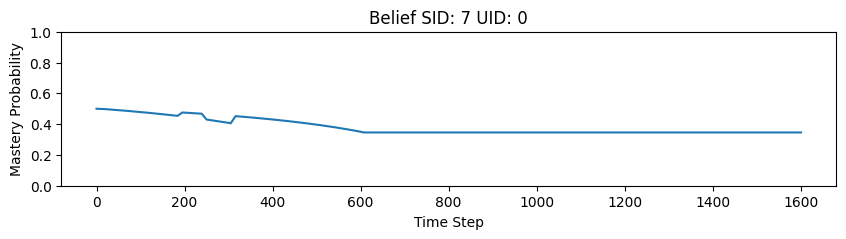

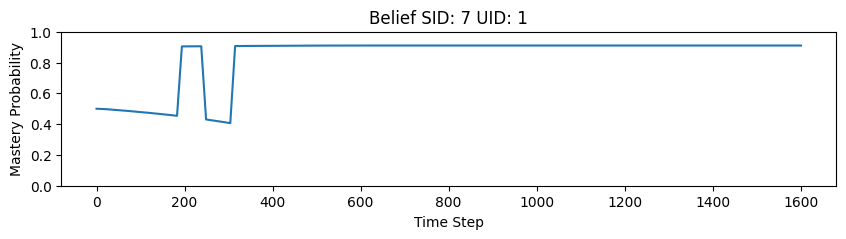

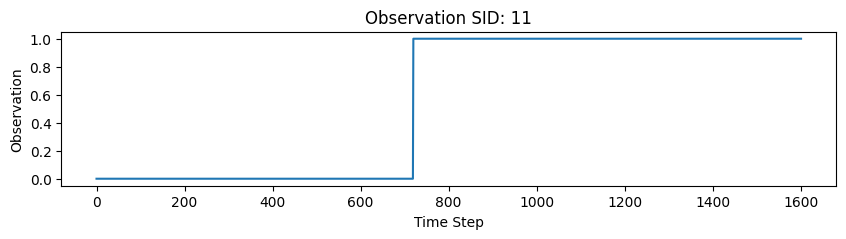

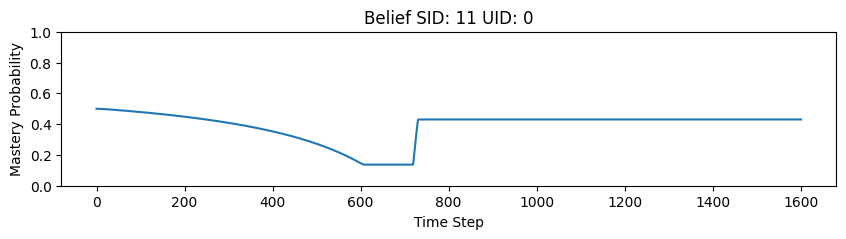

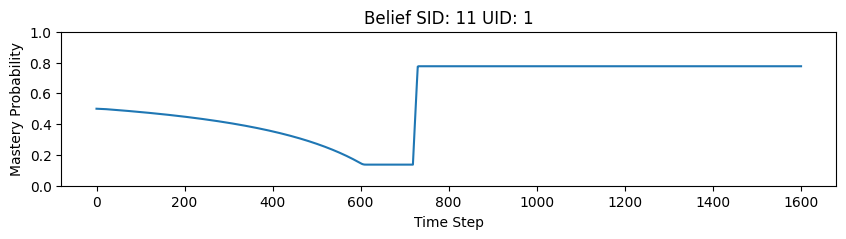

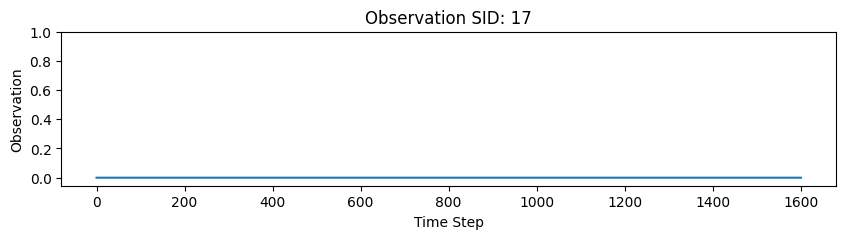

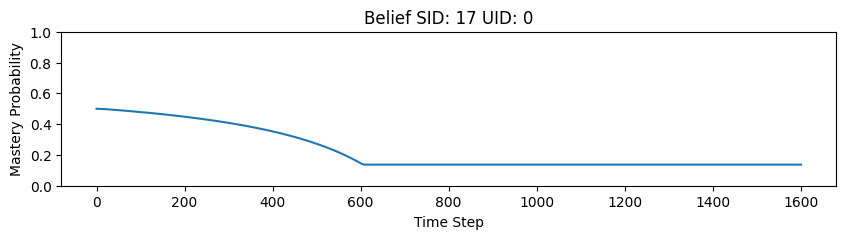

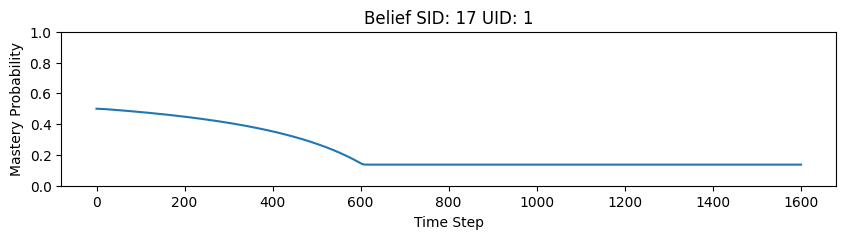

Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Bo

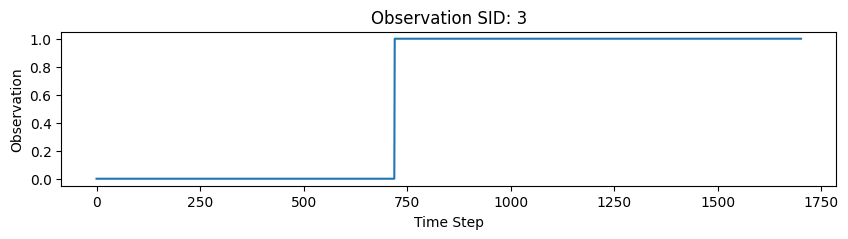

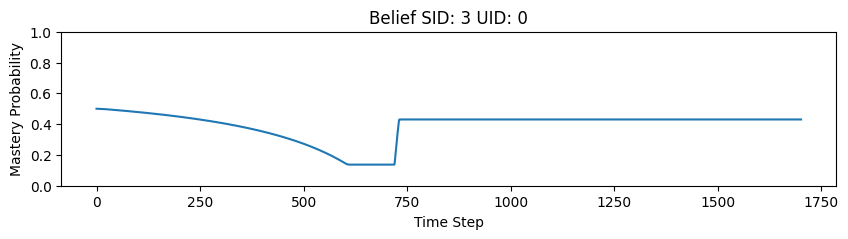

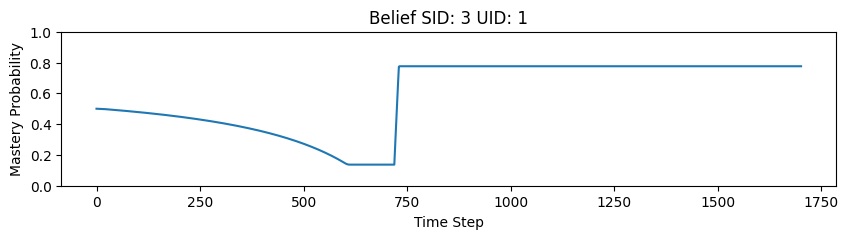

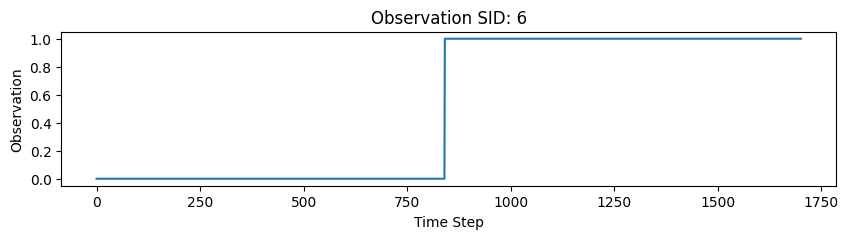

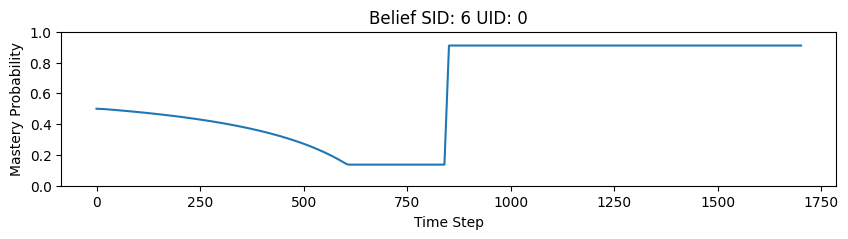

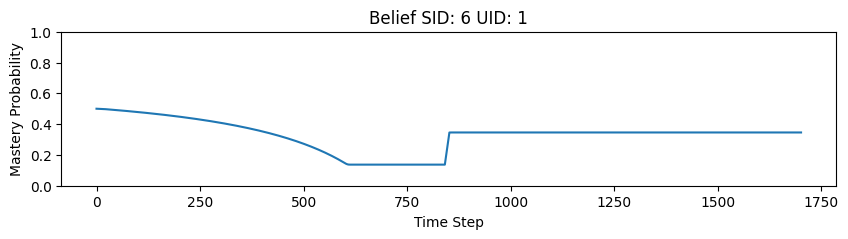

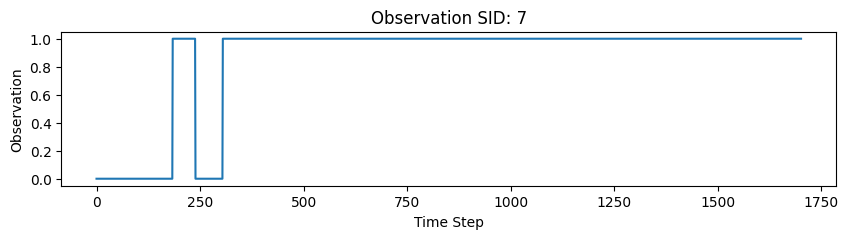

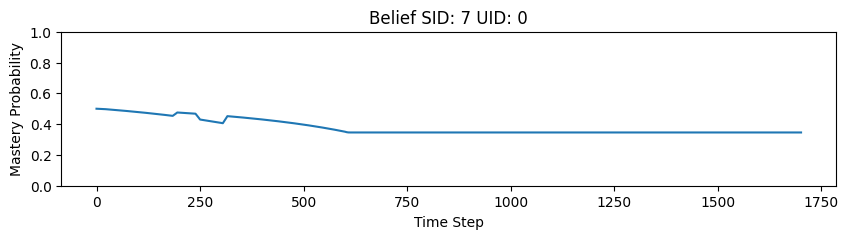

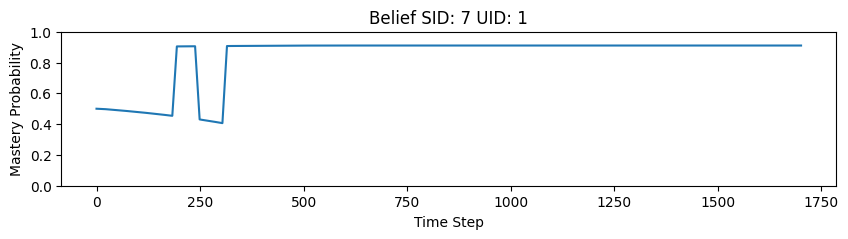

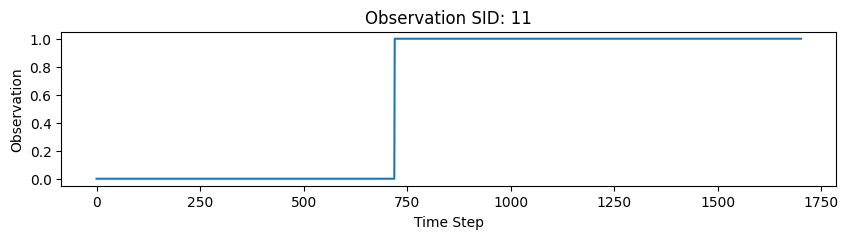

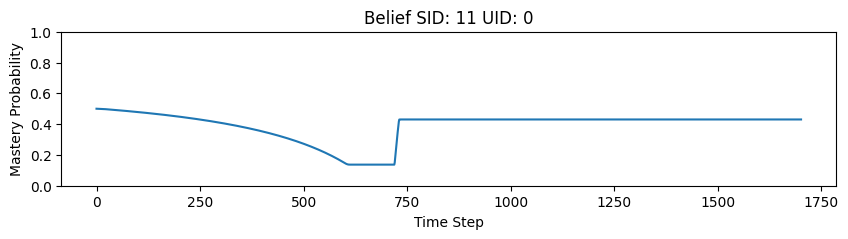

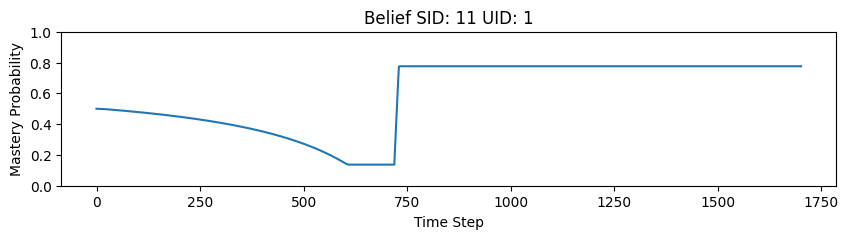

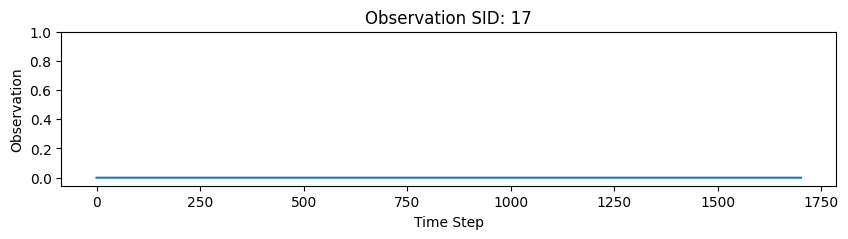

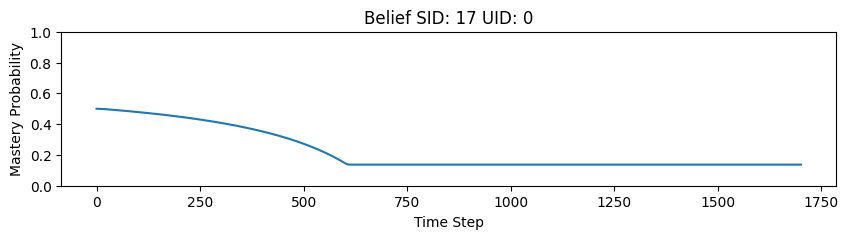

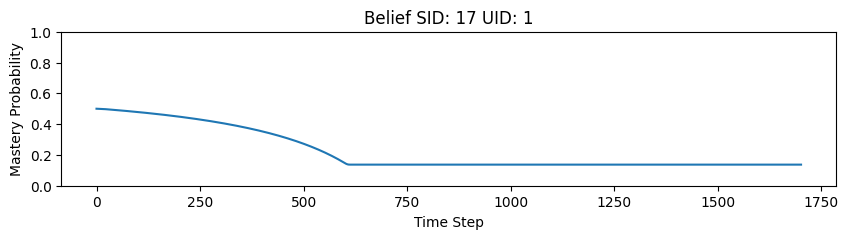

Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Bo

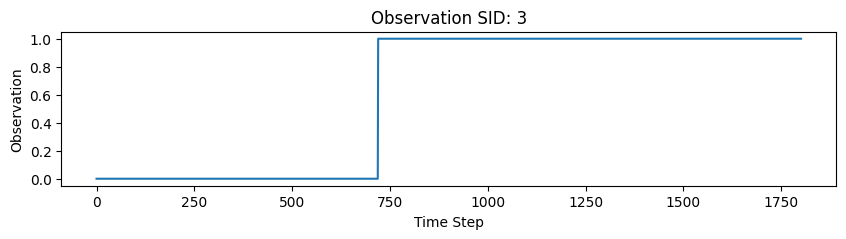

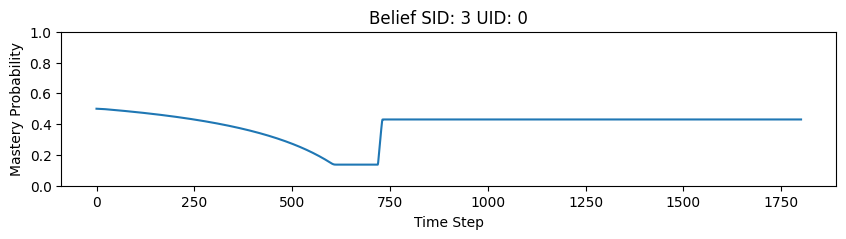

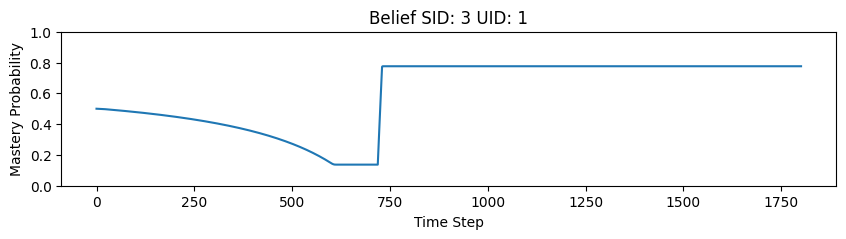

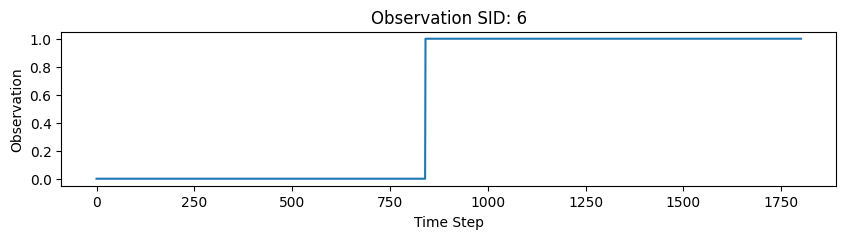

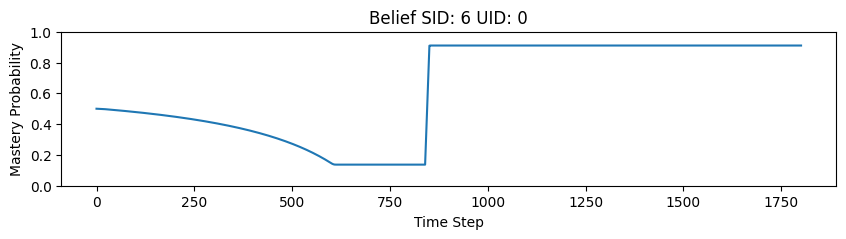

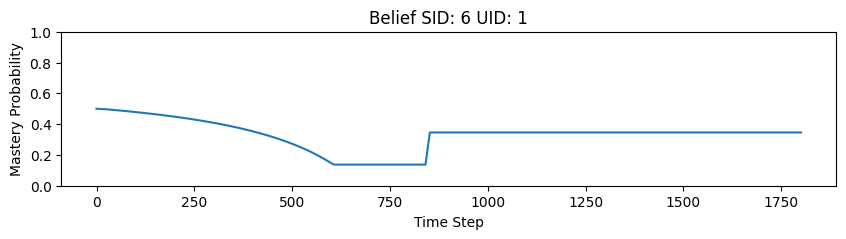

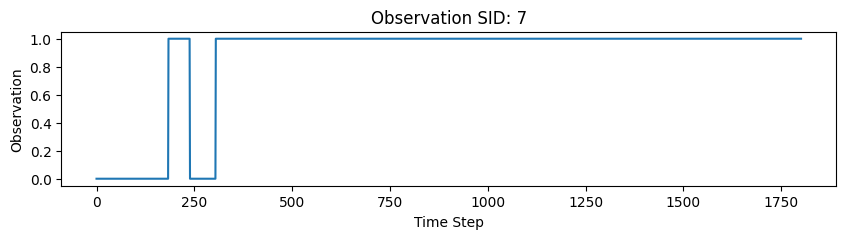

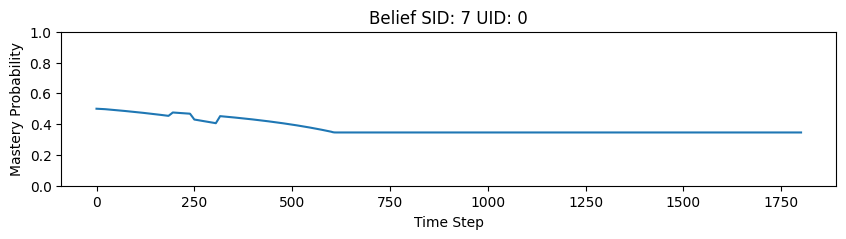

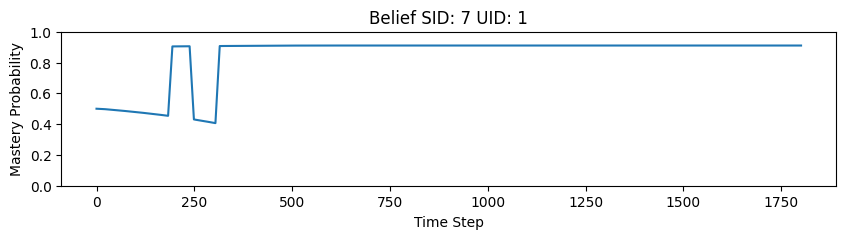

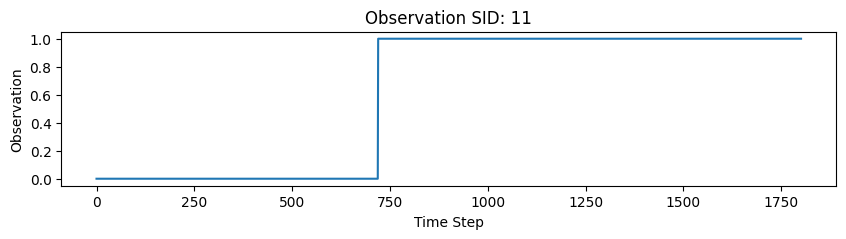

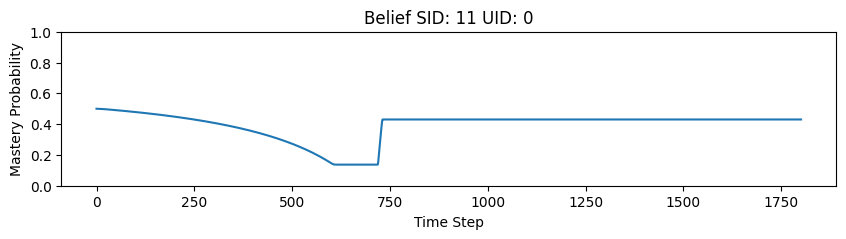

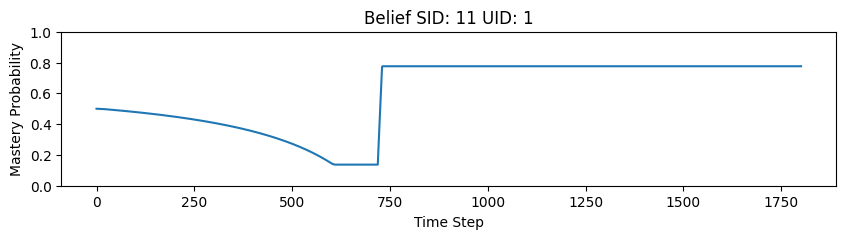

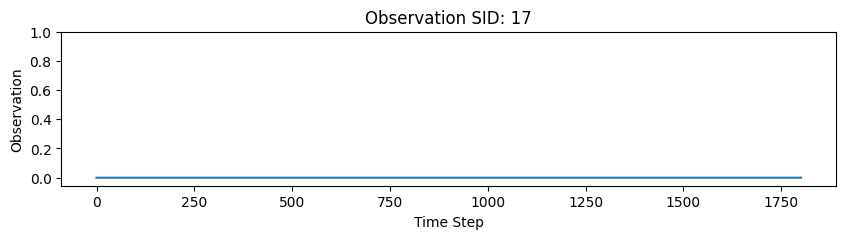

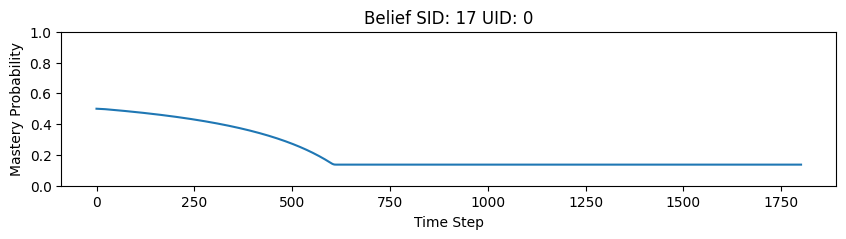

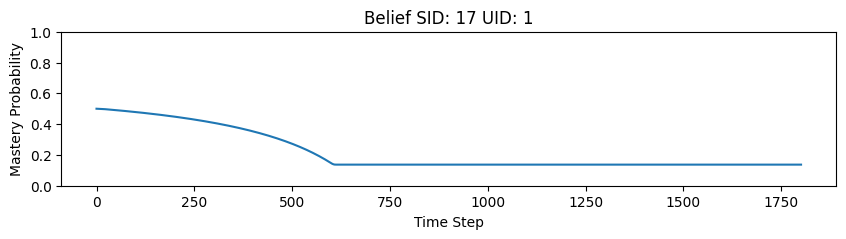

Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
Hand On Board!
added battery
added Lamp
added switch
added switch
added wire
location (4, 10) (4, 14)
added wire
location (8, 10) (8, 14)
added wire
location (4, 4) (8, 4)
added wire
location (8, 4) (8, 6)
[<pieces.Battery object at 0x0000020A794DAD70>, <pieces.Lamp object at 0x0000020A8052D840

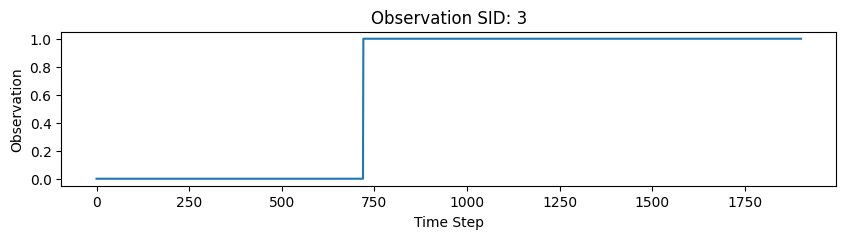

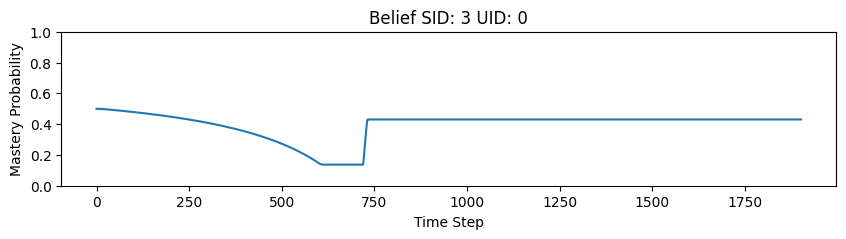

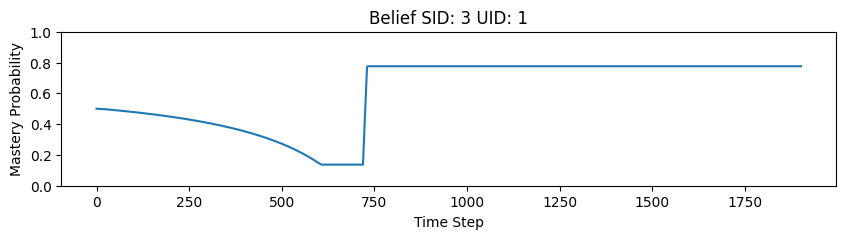

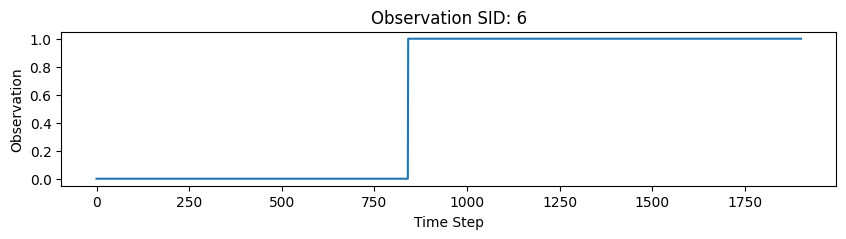

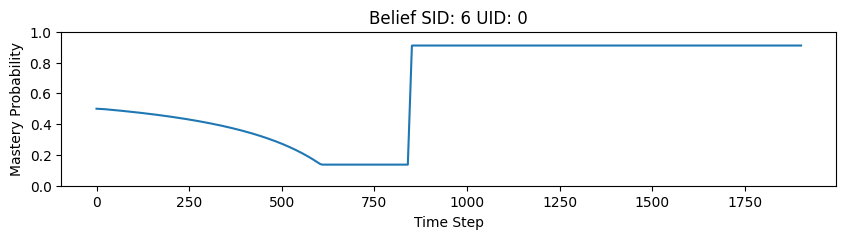

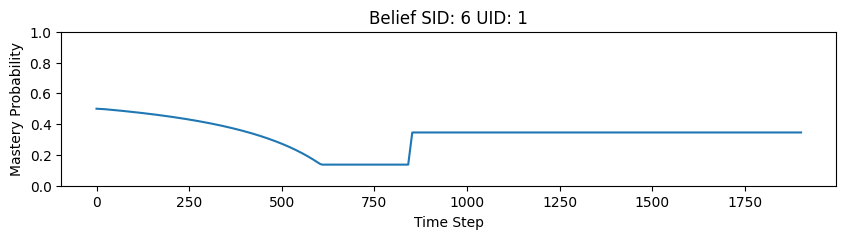

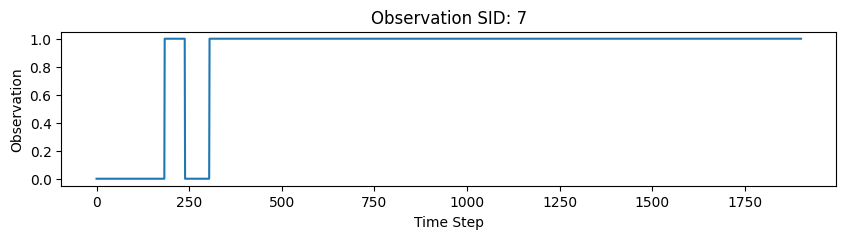

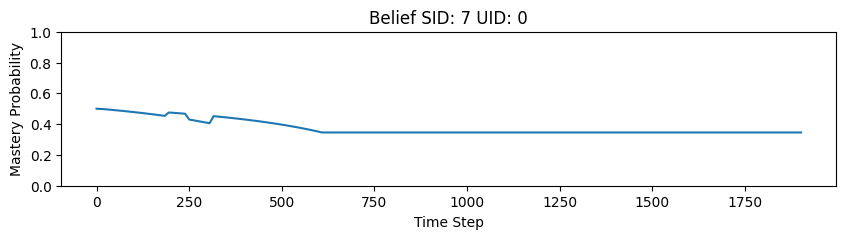

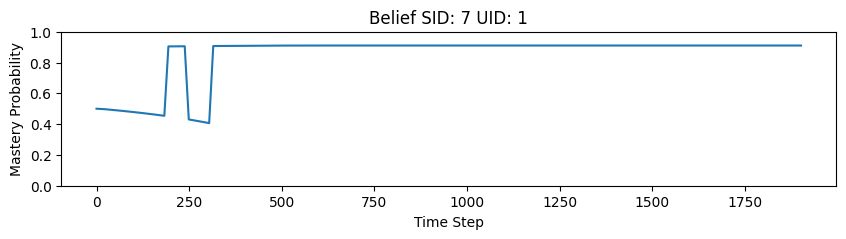

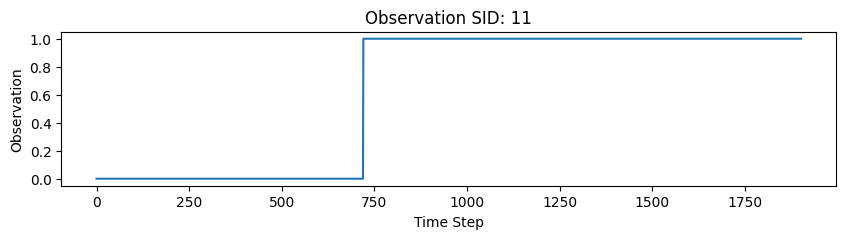

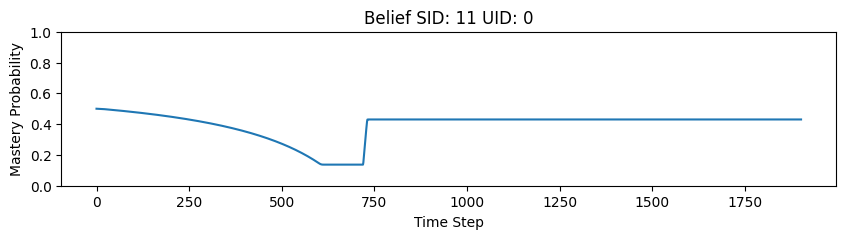

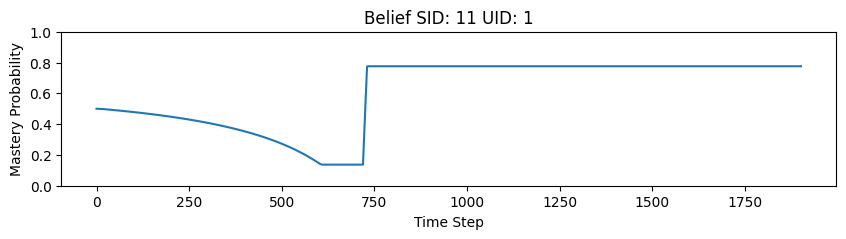

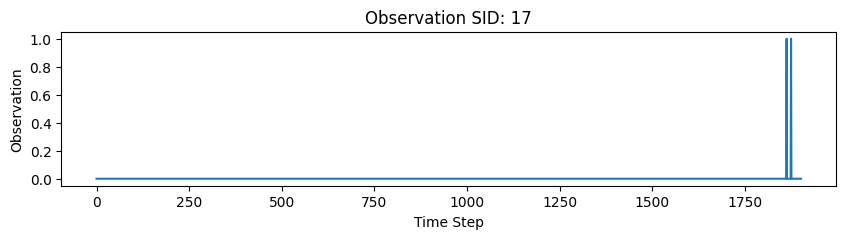

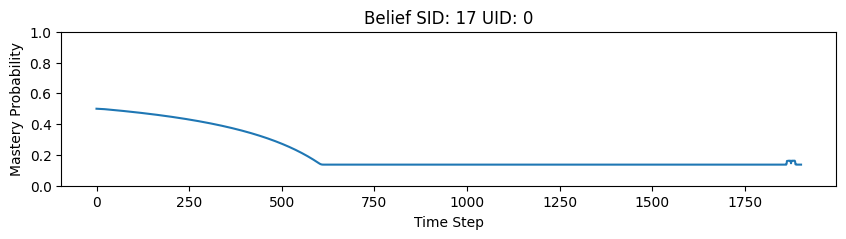

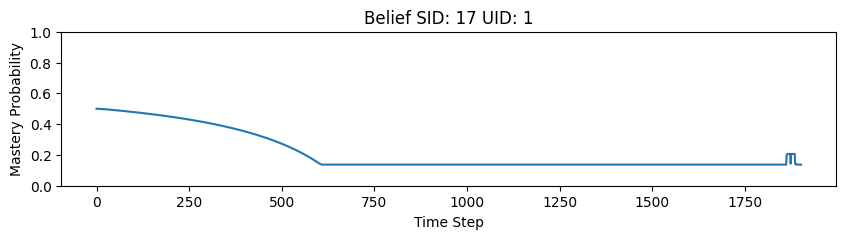

added wire
location (8, 4) (8, 6)
[<pieces.Battery object at 0x0000020A81525A50>, <pieces.Lamp object at 0x0000020A81525E70>, <pieces.Switch object at 0x0000020A79445A20>, <pieces.Switch object at 0x0000020A79447490>, <pieces.Wire object at 0x0000020A79445390>, <pieces.Wire object at 0x0000020A79445300>, <pieces.Wire object at 0x0000020A794479D0>, <pieces.Wire object at 0x0000020A81412290>]
BRRRRR
ALL CIRCUITS CHECK
w122
[]
ALL CIRCUITS CHECK
la40
['w122']
w122
The following exists in the circuit: switch
The following exists in the circuit: lamp
The following exists in the circuit: battery
There were several pieces that were connected to other pieces
[<pieces.Battery object at 0x0000020A81525A50>, <pieces.Lamp object at 0x0000020A81525E70>, <pieces.Switch object at 0x0000020A79445A20>, <pieces.Switch object at 0x0000020A79447490>, <pieces.Wire object at 0x0000020A79445390>, <pieces.Wire object at 0x0000020A79445300>, <pieces.Wire object at 0x0000020A794479D0>, <pieces.Wire object at 0x

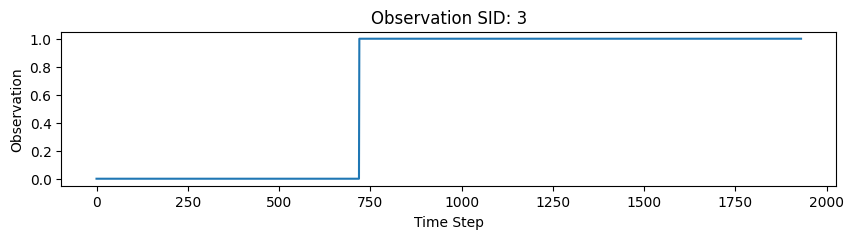

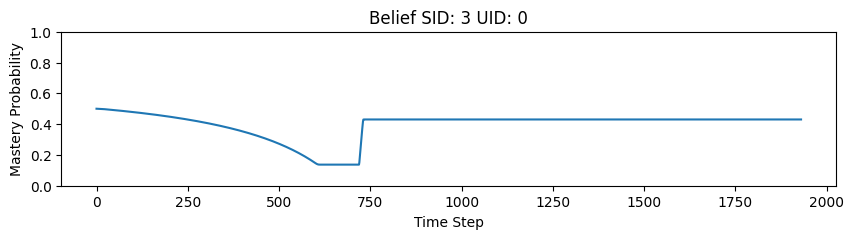

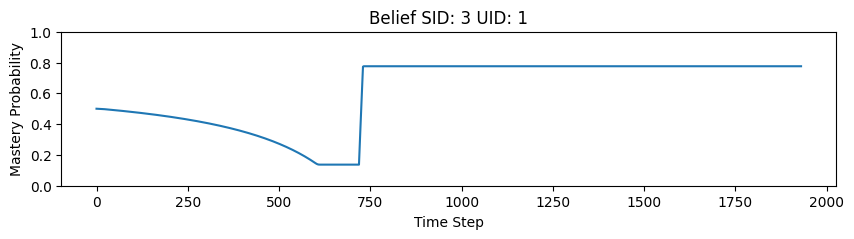

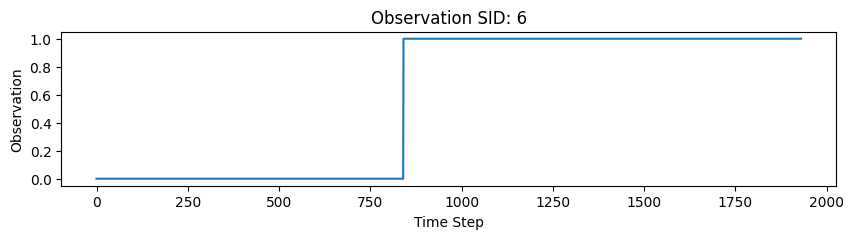

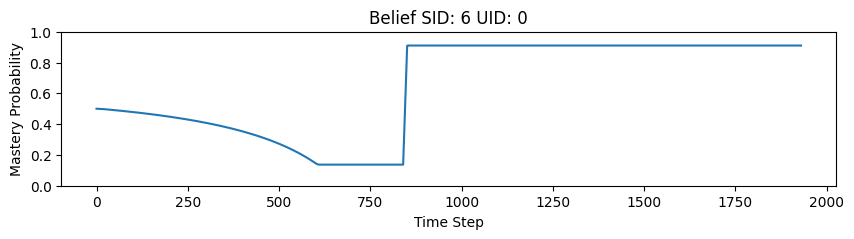

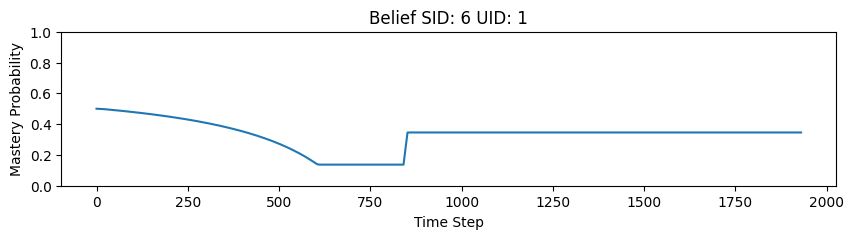

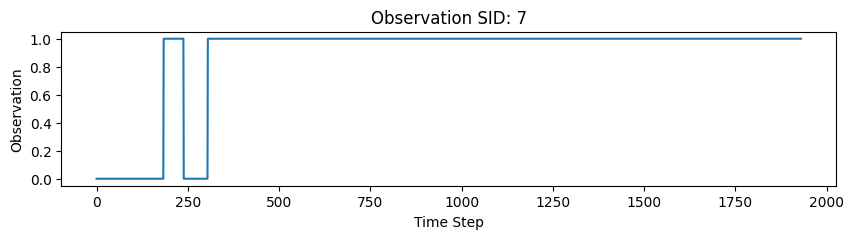

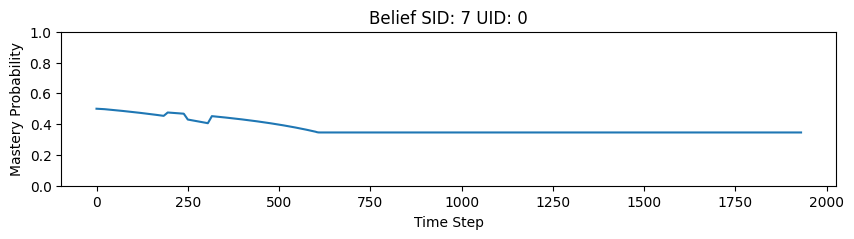

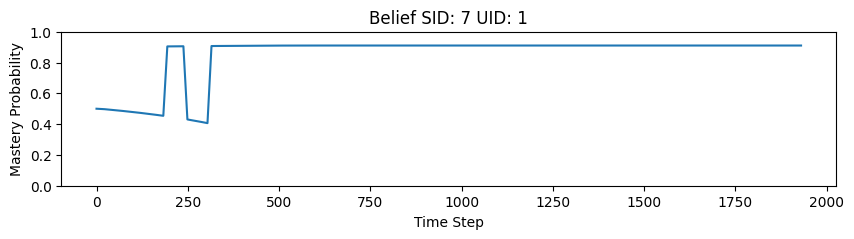

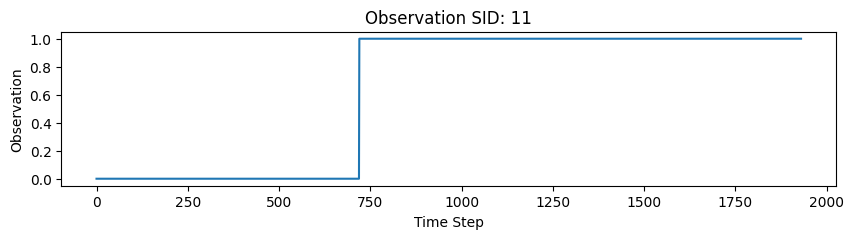

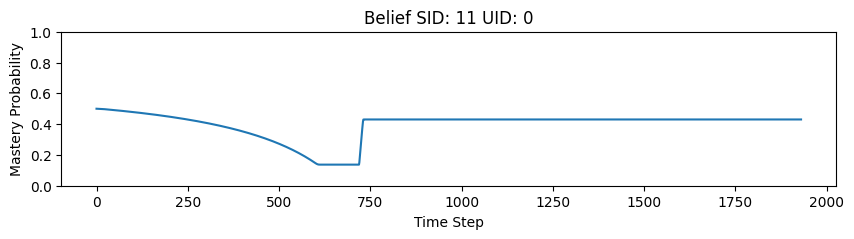

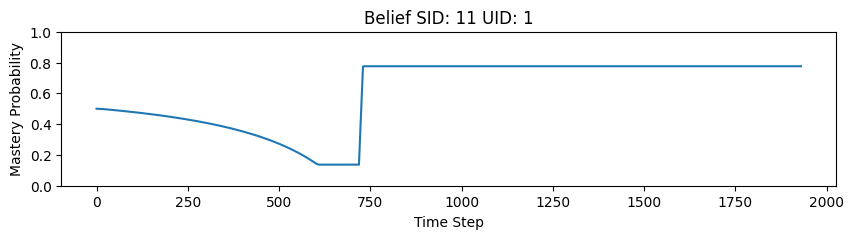

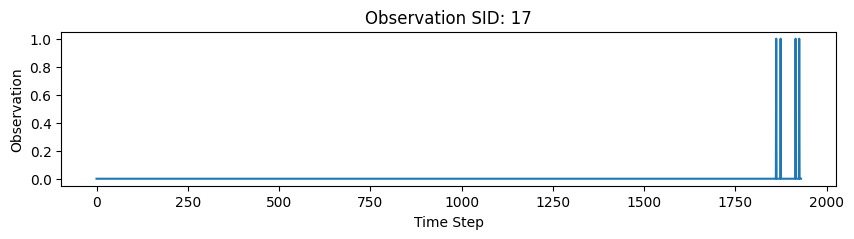

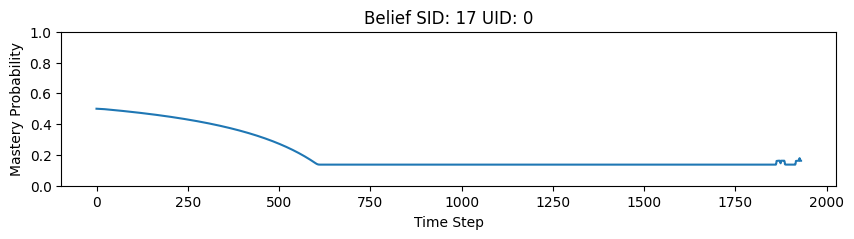

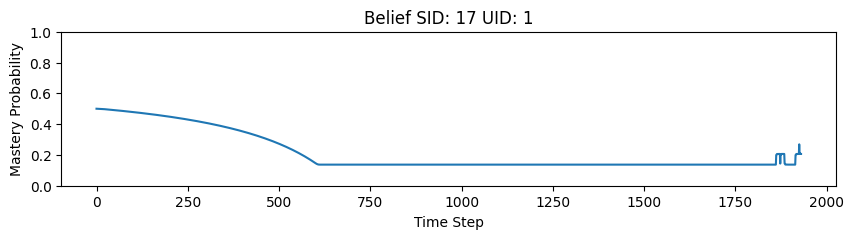

In [12]:
warnings.filterwarnings("ignore", category=UserWarning, module="google.protobuf.symbol_database")

cap = cv2.VideoCapture(source)

# pre-trained YOLO model and hand model
model = YOLO('best (8).pt')
detector = HandDetector(detectionCon=0.5, maxHands=4)

# initialize
time_step_index = 0
board, all_pieces, previous_data, hand_history, output_get_pegs, person_id = add_pieces.initialize_board()

 

# store video
if store: writer = store_as_video.store_video(cv2.VideoCapture(source))

hands_over_board = {0: [], 1: []}
skill_contributions = {0: {}, 1: {}}
old_skill_contributions = {0: {}, 1: {}}
observations = {}

old_obs = all_tests.update_skills(task, all_pieces)
obs = old_obs

# for uid in skill_contributions:
#     for sid, value in enumerate(old_obs):
#         if old_obs[sid] == 1:
#             skill_contributions[uid][sid] = 0.5
#         if old_obs[sid] == 0:
#             skill_contributions[uid][sid] = 0

for sid, value in enumerate(old_obs):
    if old_obs[sid] == 1:
        observations[sid] = {0: 1}
        for uid in skill_contributions:
            skill_contributions[uid][sid] = 0.5
            old_skill_contributions[uid][sid] = 0.5
    if old_obs[sid] == 0:
        observations[sid] = {0: 0}
        for uid in skill_contributions:
            skill_contributions[uid][sid] = 0
            old_skill_contributions[uid][sid] = 0

# print("INITIAL")
# print(skill_contributions)

uids = [0, 1]
beliefs = create_beliefs(task, uids)

changed = True

while True:
    #print(all_pieces)
    # Capture a frame
    ret, frame = cap.read()
    if not ret:
        print("Camera Connection Failed")
        break

    if show: cv2.imshow("Uncropped Image", frame)
    # store video
    if store: writer.write(frame)

    if time_step_index >= first_viable_frame:
        
        # focus on board
        frame, frame_for_hand = process_frame.crop_frame_home(frame)
        #frame, frame_for_hand = process_frame.crop_frame_general(frame)
        if show: cv2.imshow("Frame Image", frame)
        if show: cv2.imshow("Hand Frame Image", frame_for_hand)
        
        # We draw pegs on the board using the first frame. This is done because we assume that the board will remain stationary
        # throughout the video. Drawing the pegs in the initial frame helps us avoid any shift or misalignment of the
        # pegs when a piece moves near or past the edge of the board.
        if time_step_index == first_viable_frame:
            matrixcoor_to_realcoor, frame_tilt, frame_circle, angle = virtual_board_all.draws_pegs_on_rotated_board(frame)
            if show: cv2.imshow("Board with Pegs", frame_circle)
        else:
            frame_tilt = virtual_board_all.tilt(frame, angle) 

        # Detecting hand
        hands, img = detector.findHands(frame_for_hand)

        if show: cv2.imshow("Hand Detected Large Image", img)

        if not hands:
            # Use YOLO object detection to get real coordinates (output) and convert to board coordinates (data)
            matrix, data, output = process_frame.process_frame_with_yolo(frame_tilt, model, matrixcoor_to_realcoor) ##error
            #print("YOOOOOO")
            #print(matrix)
            #print(data)
            #print(output)
            # detect any change to pieces
            added, removed = add_pieces.check_changes(previous_data, data, output)
            
            if removed or added:
                if removed:
                    board = pieces.Board("b1", 13, 15)
                    #print("REMOVED")
                    #print(added)
                    remaining, _ = add_pieces.check_changes([], data, output)
                    #print("REMAIN")
                    #print(remaining)
                    if remaining:
                        all_pieces = []
                        for piece_add, output_add in remaining:
                            # add each piece to board
                            board, all_pieces = add_pieces.add_new_piece(piece_add,output,frame_tilt,angle,board,all_pieces)

                elif added:
                    #print("ADDED")
                    #print(added)
                    for piece_add, output_add in added:
                        # add each piece to board
                        board, all_pieces = add_pieces.add_new_piece(piece_add,output,frame_tilt,angle,board,all_pieces)

                obs = all_tests.update_skills(task, all_pieces)
                for sid, value in enumerate(obs):
                    if obs[sid] == 1:
                        observations[sid][time_step_index] = 1
                    if obs[sid] == 0:
                        observations[sid][time_step_index] = 0
            
            #print("ALL PIECES AFTER")
            #print(all_pieces)
            previous_data = data
           
        else:
            # hand on board
            print("\033[91mHand On Board!\033[0m")
            hands, img = detector.findHands(frame_for_hand) #NOTEEEEE
            if show: cv2.imshow("Hand Detected Image", img)
            # for all hands, store the history of its center
            for hand in hands:
                if hand['type'] == "ID: 0":
                    hands_over_board[0].append(time_step_index)
                else:
                    hands_over_board[1].append(time_step_index)


        # print("CONTRIB")
        # print(skill_contributions)

        for sid, observation in enumerate(obs):
            if observation != old_obs[sid] and observation != 2:
                if observation == 1:
                    user_0_time = len(hands_over_board[0])
                    user_1_time = len(hands_over_board[1])
                    total_time = user_0_time + user_1_time
                    if total_time != 0:
                        user_0_contribution = user_0_time / total_time
                        user_1_contribution = user_1_time / total_time
                        skill_contributions[0][sid] = user_0_contribution
                        skill_contributions[1][sid] = user_1_contribution
                    else:
                        # skill_contributions[0][sid] = 0.5
                        # skill_contributions[1][sid] = 0.5
                        skill_contributions[0][sid] = old_skill_contributions[0][sid]
                        skill_contributions[1][sid] = old_skill_contributions[1][sid]

                else:
                    old_skill_contributions[0][sid] = skill_contributions[0][sid]
                    old_skill_contributions[1][sid] = skill_contributions[1][sid]
                    skill_contributions[0][sid] = 0
                    skill_contributions[1][sid] = 0
                    
                changed = True

        if changed:
            old_obs = obs
            hands_over_board = {0: [], 1: []}
            changed = False

        for sid in beliefs:
            c_ts = {}
            for uid in uids:
                c_ts[uid] = skill_contributions[uid][sid]
            beliefs[sid].step(obs[sid], c_ts)

        

    time.sleep(0.1) #0.1
    # Check for the 'q' key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    if time_step_index % 100 == 0:
        print(time_step_index)
        plot_beliefs(beliefs=beliefs)
    time_step_index += 1
    
print("OUTPUTS: ")
plot_beliefs(beliefs=beliefs)

# Release the webcam and close the windows
cap.release()
if store: writer.release() 
cv2.destroyAllWindows()

In [13]:
# warnings.filterwarnings("ignore", category=UserWarning, module="google.protobuf.symbol_database")

# cap = cv2.VideoCapture(source)

# # pre-trained YOLO model and hand model
# model = YOLO('best (8).pt')
# detector = HandDetector(detectionCon=0.5, maxHands=4)

# # initialize
# i = 0
# change_index = 0
# board, all_pieces, previous_data, hand_history, output_get_pegs, person_id = add_pieces.initialize_board()

# # store video
# if store: writer = store_as_video.store_video(cv2.VideoCapture(source))
    
# additions = {}
# observations = {}
# contributions = {}
# hands_over_board = {0: [], 1: []}
# skill_contributions = {0: {}, 1: {}}

# uids = [0, 1]
# beliefs = create_beliefs(task, uids)


# while True:
#     print(all_pieces)
#     # Capture a frame
#     ret, frame = cap.read()
#     if not ret:
#         print("Camera Connection Failed")
#         break

#     if show: cv2.imshow("Uncropped Image", frame)
#     # store video
#     if store: writer.write(frame)

#     if i >= first_viable_frame:
        
#         # focus on board
#         #frame, frame_for_hand = process_frame.crop_frame(frame)
#         frame, frame_for_hand = process_frame.crop_frame_home(frame)
#         if show: cv2.imshow("Frame Image", frame)
#         if show: cv2.imshow("Hand Frame Image", frame_for_hand)
        
#         # We draw pegs on the board using the first frame. This is done because we assume that the board will remain stationary
#         # throughout the video. Drawing the pegs in the initial frame helps us avoid any shift or misalignment of the
#         # pegs when a piece moves near or past the edge of the board.
#         if i == first_viable_frame:
#             matrixcoor_to_realcoor, frame_tilt, frame_circle, angle = virtual_board_all.draws_pegs_on_rotated_board(frame)
#             if show: cv2.imshow("Board with Pegs", frame_circle)
#         else:
#             frame_tilt = virtual_board_all.tilt(frame, angle) 

#         # Detecting hand
#         hands, img = detector.findHands(frame_for_hand)
#         if show: cv2.imshow("Hand Detected Large Image", img)
#         if not hands:
#             # Use YOLO object detection to get real coordinates (output) and convert to board coordinates (data)
#             matrix, data, output = process_frame.process_frame_with_yolo(frame_tilt, model, matrixcoor_to_realcoor) ##error
#             print("DATA")
#             print(data)
#             # detect any change to pieces
#             added, removed = add_pieces.check_changes(previous_data,data,output)
#             # there are pieces added
#             print(added)
#             print(removed)
#             if added:
#                 for piece_add, output_add in added:
#                     # add each piece to board
#                     board, all_pieces = add_pieces.add_new_piece(piece_add,output,frame_tilt,angle,board,all_pieces)
#                     # find who adds it
#                     person_id = add_pieces.find_person_id(hand_history, output_add)
#                     if person_id: 
#                         print("A",piece_add['type'], "is added by person", person_id[-1])
#                         if person_id[-1] in additions:
#                             additions[person_id[-1]][i] = piece_add['type']
#                         else:
#                             additions[person_id[-1]] = {i: piece_add['type']}
                    
#                 # re-initialize
#                 hand_history = collections.defaultdict(list)
                
#                 person_id = None        
                
#                 # update observation vector (only when new pieces added)
#                 obs = all_tests.update_skills(task, all_pieces)
#                 observations[i] = obs

#                 for person in additions:
#                     if i in additions[person]:
#                         if i in contributions:
#                             contributions[i][person] = obs
#                         else:
#                             contributions[i] = {person: obs}

#                 for hand_id in hands_over_board:

#                     if i in additions[person]:
#                         if i in contributions:
#                             contributions[i][person] = obs
#                         else:
#                             contributions[i] = {person: obs}
#                 change_index = i
#                 hands_over_board = {0: [], 1: []}

#             # if removed:
#             #     remaining, _ = add_pieces.check_changes([], data, output)
#             #     if remaining:
#             #         all_pieces = []
#             #         for piece_add, output_add in remaining:
#             #             # add each piece to board
#             #             board, all_pieces = add_pieces.add_new_piece(piece_add,output,frame_tilt,angle,board,all_pieces)
#             #             # find who adds it
#             #             person_id = add_pieces.find_person_id(hand_history, output_add)
#             #             if person_id: 
#             #                 print("A",piece_add['type'], "is added by person", person_id[-1])
#             #                 if person_id[-1] in additions:
#             #                     additions[person_id[-1]][i] = piece_add['type']
#             #                 else:
#             #                     additions[person_id[-1]] = {i: piece_add['type']}
                        
#             #         # re-initialize
#             #         hand_history = collections.defaultdict(list)
#             #         person_id = None        
                    
#             #         # update observation vector (only when new pieces added)
#             #         obs = all_tests.update_skills(task, all_pieces)
#             #         observations[i] = obs

#             #         for person in additions:
#             #             if i in additions[person]:
#             #                 if i in contributions:
#             #                     contributions[i][person] = obs
#             #                 else:
#             #                     contributions[i] = {person: obs}
#             #         change_index = i

#             previous_data = data
           

#         else:
#             # hand on board
#             print("\033[91mHand On Board!\033[0m")
#             hands, img = detector.findHands(frame_tilt) #NOTEEEEE
#             if show: cv2.imshow("Hand Detected Image", img)
#             # for all hands, store the history of its center
#             for hand in hands:
#                 if hand['type'] == "ID: 0":
#                     hands_over_board[0].append(i)
#                 else:
#                     hands_over_board[1].append(i)
#                 print("HAAAANDSSSSS")
#                 hand_history[hand['type']].append((np.array(hand['lmList'][4][:2])+np.array(hand['lmList'][8][:2]))//2)
#                 print(hand_history[hand['type']])
#             #print(hand_history)

#         print(hands_over_board)
#         for sid in beliefs:
#             o_t = 0
#             c_ts = {}
#             for uid in uids:
#                 c_ts[uid] = 0

#             if change_index in contributions:
#                 cs_i = contributions[change_index]
                
#                 # print("lol")
#                 # print(cs_i)
                
#                 for uid in uids:
#                     # print("sheehs")
#                     # print(uid)
                    
#                     if str(uid) in cs_i:
                        
#                         # print("yo")
#                         # print(uid)
#                         # print(cs_i[str(uid)][sid])
                        
#                         if cs_i[str(uid)][sid] == 1:
#                             o_t = 1
#                             c_ts[uid] = 1

#             elif change_index in observations:
#                 o_t = observations[change_index][sid]
#                 for uid in uids:
#                     c_ts[uid] = 0.5 * o_t


#             beliefs[sid].step(o_t, c_ts)

#     time.sleep(0.1) #0.1
#     # Check for the 'q' key press to exit
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
#     print(i)
#     i += 1
    
# print("OUTPUTS: ")
# print(additions)
# print(observations)
# print(contributions)

# plot_beliefs(beliefs=beliefs)

# # Release the webcam and close the windows
# cap.release()
# if store: writer.release() 
# cv2.destroyAllWindows()

In [14]:
# warnings.filterwarnings("ignore", category=UserWarning, module="google.protobuf.symbol_database")

# cap = cv2.VideoCapture(source) 

# # pre-trained YOLO model and hand model
# model = YOLO('best (8).pt')
# detector = HandDetector(detectionCon=0.5, maxHands=4)

# # initialize
# i = 0
# board, all_pieces, previous_data, hand_history, output_get_pegs, person_id = add_pieces.initialize_board()

# # store video
# if store: writer = store_as_video.store_video(cv2.VideoCapture(source))
    
# while True:
#     # Capture a frame
#     ret, frame = cap.read()
#     if not ret:
#         print("Camera Connection Failed")
#         break

#     # if show: cv2.imshow("Uncropped Image", frame)

#     # store video
#     if store: writer.write(frame)

#     if i >= first_viable_frame:
        
#         # focus on board
#         # frame, frame_for_hand = process_frame.crop_frame(frame, crop_x=300, crop_y=150, crop_height=486, crop_width=540, rotate=False)
#         frame, frame_for_hand = process_frame.crop_frame_home(frame)
#         if show: cv2.imshow("Raw Image", frame)
        
#         # We draw pegs on the board using the first frame. This is done because we assume that the board will remain stationary
#         # throughout the video. Drawing the pegs in the initial frame helps us avoid any shift or misalignment of the
#         # pegs when a piece moves near or past the edge of the board.
#         if i == first_viable_frame:
#             matrixcoor_to_realcoor, frame_tilt, frame_circle, angle = virtual_board_all.draws_pegs_on_rotated_board(frame)
#             if show: cv2.imshow("Board with Pegs", frame_circle)
#         else:
#             frame_tilt = virtual_board_all.tilt(frame, angle) 

#         #print("MATRIX")
#         #print(matrixcoor_to_realcoor)

#         # if show: cv2.imshow("FRAME TILT THINGYY", frame_tilt)
#         # if i == 0:
#         #     print("PRINTING TIMEEEE")
#         #     print(frame_tilt)
#         #     print("PRINTING MIDDDDD")
#         #     print(matrixcoor_to_realcoor)
#         #     print("PRINTING OVER")

#         # Detecting hand
#         hands, img = detector.findHands(frame_for_hand)
#         if not hands:
#             # Use YOLO object detection to get real coordinates (output) and convert to board coordinates (data)
#             matrix, data, output = process_frame.process_frame_with_yolo(frame_tilt, model, matrixcoor_to_realcoor) ##error
            
#             # detect any change to pieces
#             added, removed = add_pieces.check_changes(previous_data,data,output)
#             # there are pieces added
#             if added:
#                 for piece_add,output_add in added:
#                     # add each piece to board
#                     board,all_pieces = add_pieces.add_new_piece(piece_add,output,frame_tilt,angle,board,all_pieces)
#                     # find who adds it
#                     person_id = add_pieces.find_person_id(hand_history, output_add)
#                     if person_id: print("A",piece_add['type'], "is added by person", person_id[-1])
                    
#                 # re-initialize
#                 hand_history = collections.defaultdict(list)
#                 person_id = None        
                
#                 # update observation vector (only when new pieces added)
#                 obs = all_tests.update_skills(task,all_pieces)
#                 print("OBS: ")
#                 print(obs)
            
#             previous_data = data
            
#         else:
#             # hand on board
#             print("\033[91mHand On Board!\033[0m")
#             hands, img = detector.findHands(frame_tilt)
#             if show: cv2.imshow("Image", img)
#             # for all hands, store the history of its center
#             for hand in hands:
#                 hand_history[hand['type']].append((np.array(hand['lmList'][4][:2])+np.array(hand['lmList'][8][:2]))//2)
        
#     time.sleep(0.1)
#     # Check for the 'q' key press to exit
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
#     i += 1
    

# # Release the webcam and close the windows
# cap.release()
# if store: writer.release() 
# cv2.destroyAllWindows()

Problem:
- When we put down pieces, the pegs will move
    - Solution 1: Fixed the pegs <-- drawbacks: if camera moves, cannot be detected
    - Solution 2: Decrease detection confidence on hands, so more sensitive on hands

In [15]:
# def store_video(cap):
#     if not os.path.exists('raw_videos'):
#             os.makedirs('raw_videos')
            
#     # Get the list of existing files in the "cropped_frames" directory
#     existing_files = os.listdir('raw_videos')
#     if existing_files:
#         video_count = max([int(file_name.split('_')[2].split('.')[0]) for file_name in existing_files if file_name!='.DS_Store']) + 1
#     else:
#         video_count = 0
        
#     # Create a VideoWriter to save the cropped video
#     fourcc = cv2.VideoWriter_fourcc(*'H264')
#     output_path = os.path.join('raw_videos', f"raw_video_{video_count}.mp4")
#     writer = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
#     return writer

# def check_changes(previous_data,data):
#     added = [item for item in data if item not in previous_data]
#     removed = [item for item in previous_data if item not in data]
#     return added,removed

In [16]:
# def find_person_id(hand_history, output_add):
#     person_id = None
#     center_piece = ((output_add[2]+output_add[0])//2,(output_add[3]+output_add[1])//2)

#     if hand_history.get('ID: 1') or hand_history.get('ID: 0'):
#         for hand_center in hand_history.get('ID: 1', []):
#             if (hand_center[0] - center_piece[0] < 5 and hand_center[1] - center_piece[1] < 20) or \
#                (hand_center[0] - center_piece[0] < 20 and hand_center[1] - center_piece[1] < 5):
#                 person_id = 'ID: 1'
#                 break
        
#         if not person_id:
#             for hand_center in hand_history.get('ID: 0', []):
#                 if (hand_center[0] - center_piece[0] < 5 and hand_center[1] - center_piece[1] < 20) or \
#                    (hand_center[0] - center_piece[0] < 20 and hand_center[1] - center_piece[1] < 5):
#                     person_id = 'ID: 0'
#                     break

#         return person_id

## 1. Define pieces:

In [17]:
# import numpy as np

# class Board:
#     def __init__(self, name, height, length):
#         self.name = name
#         self.pos = np.empty([height, length], dtype=list)
#         for j in range(0, height):
#             for i in range(0, length):
#                 self.pos[j][i] = []

# class Battery:
#     b_id = 1
#     def __init__(self, name, x1, x2, y1, y2, inp=[], out=[]):
#         self.type = "battery"
#         # self.width = 3
#         # self.height = 3
#         self.name = name
#         self.inp = []
#         self.out = []
#         self.x1 = x1
#         self.x2 = x2
#         self.y1 = y1
#         self.y2 = y2
#         self.power = True
    
#     def addInp(self, inp):
#         self.inp.append(inp)
#     def removeInp(self, inp):
#         self.inp.remove(inp)
#     def addOut(self, out):
#         self.out.append(out)
#     def removeOut(self, out):
#         self.out.remove(out)
#     def setInp(self, inp):  # allows assignment
#         self.inp = inp
#     def setOut(self, out):
#         self.out = out


# class Wire:
# 	#TODO - we are not separating each wire, what to do?
# 	w_id = 1
	
# 	def __init__(self, name, x1, x2, y1, y2, inp = [], out = []):
# 		self.name = name
# 		self.type = "wire"
# 		#self.width = size # between 1 and 7, or 0 for jumper wire
# 		#self.height = 1
# 		self.inp = []
# 		self.out = []
# 		self.x1 = x1
# 		self.x2 = x2
# 		self.y1 = y1
# 		self.y2 = y2
# 		self.power = False

# 	def addInp(self,inp):
# 		self.inp.append(inp)
# 	def removeInp(self,inp):
# 		self.inp.remove(inp)
# 	def addOut(self,out):
# 		self.out.append(out)
# 	def removeOut(self,out):
# 		self.out.remove(out)
# 	def setInp(self,inp):
# 		self.inp = inp
# 	def setOut(self,out):
# 		self.out = out

# class Switch:
# 	s_id = 1
# 	def __init__(self, name, x1, x2, y1, y2, inp = [], out = []):
# 		self.type = "switch"
# 		#self.width = 3
# 		#self.height = 1
# 		#self.s_type = s_type #press or slide switch
# 		self.name = name
# 		self.inp = []
# 		self.out = []
# 		self.x1 = x1
# 		self.x2 = x2
# 		self.y1 = y1
# 		self.y2 = y2
# 		self.power = False
# 		self.pressed = False
# 		#self.connected = []
	
# 	def PressSwitch(self):
# 		self.pressed = True
# 		self.outPower = True
	
# 	def UnpressSwitch(self):
# 		self.pressed = False
# 		self.outPower = False
	
# 	def addInp(self,inp):
# 		self.inp.append(inp)
# 	def removeInp(self,inp):
# 		self.inp.remove(inp)
# 	def addOut(self,out):
# 		self.out.append(out)
# 	def removeOut(self,out):
# 		self.out.remove(out)
# 	def setInp(self,inp):
# 		self.inp = inp
# 	def setOut(self,out):
# 		self.out = out
	
# class Button:
# 	bu_id = 1
# 	def __init__(self, name, x1, x2, y1, y2, inp = [], out = []):
# 		self.type = "push button"
# 		#self.width = 3
# 		#self.height = 1
# 		#self.s_type = s_type #press or slide switch
# 		self.name = name
# 		self.inp = []
# 		self.out = []
# 		self.x1 = x1
# 		self.x2 = x2
# 		self.y1 = y1
# 		self.y2 = y2
# 		self.power = False
# 		self.pressed = False
# 		#self.connected = []
	
# 	def PressButton(self):
# 		self.pressed = True
# 		self.outPower = True
	
# 	def UnpressButton(self):
# 		self.pressed = False
# 		self.outPower = False
	
# 	def addInp(self,inp):
# 		self.inp.append(inp)
# 	def removeInp(self,inp):
# 		self.inp.remove(inp)
# 	def addOut(self,out):
# 		self.out.append(out)
# 	def removeOut(self,out):
# 		self.out.remove(out)
# 	def setInp(self,inp):
# 		self.inp = inp
# 	def setOut(self,out):
# 		self.out = out

# class Reed:
#     reed_id = 1
#     def __init__(self, name, x1, x2, y1, y2, inp=[], out=[]):
#         self.type = "reed"
#         # self.width = 3
#         # self.height = 1
#         # self.s_type = s_type #press or slide switch
#         self.name = name
#         self.inp = []
#         self.out = []
#         self.x1 = x1
#         self.x2 = x2
#         self.y1 = y1
#         self.y2 = y2
#         self.power = False
#         self.pressed = False
#         # self.connected = []

#     def PressReed(self):
#         self.pressed = True
#         self.outPower = True

#     def UnpressReed(self):
#         self.pressed = False
#         self.outPower = False

#     def addInp(self, inp):
#         self.inp.append(inp)
#     def removeInp(self, inp):
#         self.inp.remove(inp)
#     def addOut(self, out):
#         self.out.append(out)
#     def removeOut(self, out):
#         self.out.remove(out)
#     def setInp(self, inp):
#         self.inp = inp
#     def setOut(self, out):
#         self.out = out


# class Led:  # Led that only allows current in one direction
#     l_id = 1

#     def __init__(self, name, x1, x2, y1, y2, inp=[], out=[]):
#         self.type = "led"
#         # self.width = 3
#         # self.height = 1
#         self.name = name
#         self.x1 = x1
#         self.x2 = x2
#         self.y1 = y1
#         self.y2 = y2
#         self.inp = []
#         self.out = []
#         self.power = False
#         self.inp2 = []

#     def addInp(self, inp):
#         self.inp.append(inp)
#     def addInp2(self,inp2):
#         self.inp2.append(inp2)
#         # if not self.inp2:
#         #     	self.inp2.append(inp2)
#         # else:
#         #     self.inp2[0] = inp2
#     def removeInp(self, inp):
#         self.inp.remove(inp)
#     def addOut(self, out):
#         self.out.append(out)
#     def removeOut(self, out):
#         self.out.remove(out)
#     def setInp(self, inp):
#         self.inp = inp
#     def setOut(self, out):
#         self.out = out

# class Lamp:  # Led that only allows current in one direction
#     lamp_id = 1

#     def __init__(self, name, x1, x2, y1, y2, inp=[], out=[]):
#         self.type = "lamp"
#         # self.width = 3
#         # self.height = 1
#         self.name = name
#         self.x1 = x1
#         self.x2 = x2
#         self.y1 = y1
#         self.y2 = y2
#         self.inp = []
#         self.out = []
#         self.power = False

#     def addInp(self, inp):
#         self.inp.append(inp)
#     def removeInp(self, inp):
#         self.inp.remove(inp)
#     def addOut(self, out):
#         self.out.append(out)
#     def removeOut(self, out):
#         self.out.remove(out)
#     def setInp(self, inp):
#         self.inp = inp
#     def setOut(self, out):
#         self.out = out

# class Speaker:
# 	sp_id = 1
# 	def __init__(self, name, x1, x2, y1, y2, inp = [], out = []):
# 		self.type = "speaker"
# 		# self.width = 3
# 		# self.height = 1
# 		self.name = name
# 		self.inp = []
# 		self.out = [] 
# 		self.x1 = x1
# 		self.x2 = x2
# 		self.y1 = y1
# 		self.y2 = y2
# 		self.power = False
		
# 	def addInp(self,inp):
# 		self.inp.append(inp)
# 	def removeInp(self,inp):
# 		self.inp.remove(inp)
# 	def addOut(self,out):
# 		self.out.append(out)
# 	def removeOut(self,out):
# 		self.out.remove(out)
# 	def setInp(self,inp):
# 		self.inp = inp
# 	def setOut(self,out):
# 		self.out = out

# class Buzzer:
#     buz_id = 1
#     def __init__(self, name, x1, x2, y1, y2, inp=[], out=[]):
#         self.type = "buzzer"
#         # self.width = 3
#         # self.height = 1
#         self.name = name
#         self.inp = []
#         self.out = []
#         self.x1 = x1
#         self.x2 = x2
#         self.y1 = y1
#         self.y2 = y2
#         self.power = False

#     def addInp(self, inp):
#         self.inp.append(inp)
#     def removeInp(self, inp):
#         self.inp.remove(inp)
#     def addOut(self, out):
#         self.out.append(out)
#     def removeOut(self, out):
#         self.out.remove(out)
#     def setInp(self, inp):
#         self.inp = inp
#     def setOut(self, out):
#         self.out = out

# class Motor:
#     m_id = 1
    
#     def __init__(self, name, x1, x2, y1, y2, inp=None, out=None):
#         self.type = "motor"
#         self.name = name
#         self.inp = []
#         self.out = []
#         self.x1 = x1
#         self.x2 = x2
#         self.y1 = y1
#         self.y2 = y2
#         self.power = False
        
#     def addInp(self, inp):
#         self.inp.append(inp)
#     def removeInp(self, inp):
#         self.inp.remove(inp)
#     def addOut(self, out):
#         self.out.append(out)
#     def removeOut(self, out):
#         self.out.remove(out)
#     def setInp(self, inp):
#         self.inp = inp
#     def setOut(self, out):
#         self.out = out



# class Music_Circuit:
#     # TO-DO: check trigger? waves?
# 	mc_id = 1
# 	def __init__(self, name, x1, x2, y1, y2, inp = [], out = [], trigger = [], waves = [], hold = []): 
# 		self.type = "mc"
# 		# self.width = 3
# 		# self.height = 2
# 		self.name = name
# 		self.inp = []
# 		self.out = [] 
# 		self.trigger = []
# 		self.hold = []
# 		self.waves = []
# 		self.x1 = x1
# 		self.x2 = x2
# 		self.y1 = y1
# 		self.y2 = y2
# 		self.power = False
# 		self.powerInp = False
# 		self.powerTrigger = False
	
# 	def addInp(self,inp):
# 		self.inp.append(inp)
# 	def removeInp(self,inp):
# 		self.inp.remove(inp)
# 	def addHold(self,hold):
# 		self.hold.append(hold)
# 	def removeHold(self,hold):
# 		self.hold.remove(hold)
# 	def addOut(self,out):
# 		self.out.append(out)
# 	def removeOut(self,out):
# 		self.out.remove(out)
# 	def addWaves(self,waves):
# 		self.waves.append(waves)
# 	def removeWaves(self,waves):
# 		self.waves.remove(waves)
# 	def setInp(self,inp):
# 		self.inp = inp
# 	def setOut(self,out):
# 		self.out = out
# 	def addTrigger(self,trig):
# 		self.trigger.append(trig)
# 		self.Power = True
# 	def removeTrigger(self,trig):
# 		self.trigger.remove(trig)
# 	def setPowerTrigger(self,on):
# 		if on == True:
# 			self.powerTrigger = True
# 		else:
# 			self.powerTrigger = False
# 		if (self.powerTrigger and self.powerInp):
# 			self.power = True

# 	def setPowerInp(self,on):
# 		if on == True:
# 			self.powerInp = True
# 		else:
# 			self.powerInp = False
# 		# ~ if (self.powerTrigger and self.powerInp):
# 			# ~ self.power = True
# 		if (self.powerInp):
# 			self.power = True
# 	def setTrigger(self,trigger):
# 		self.trigger = trigger
# 	def setWaves(self,waves):
# 		self.waves = waves
# 	def setHold(self,hold):
# 		self.hold = hold
# 	def setInp(self,inp):
# 		self.hold = inp

# class FM:
# 	fm_id = 1
# 	def __init__(self, name, x1, x2, y1, y2, inp = [], out = [], trigger = [], waves = [], hold = []): 
# 		self.type = "fm"
# 		# self.width = 3
# 		# self.height = 2
# 		self.name = name
# 		self.inp = []
# 		self.out = [] 
# 		self.waves = []
# 		self.x1 = x1
# 		self.x2 = x2
# 		self.y1 = y1
# 		self.y2 = y2
# 		self.power = False
# 		self.powerInp = False
# 		self.powerTrigger = False
	
# 	def addInp(self,inp):
# 		self.inp.append(inp)
# 	def removeInp(self,inp):
# 		self.inp.remove(inp)
# 	def addOut(self,out):
# 		self.out.append(out)
# 	def removeOut(self,out):
# 		self.out.remove(out)
# 	def addWaves(self,waves):
# 		self.waves.append(waves)
# 	def removeWaves(self,waves):
# 		self.waves.remove(waves)
# 	def setInp(self,inp):
# 		self.inp = inp
# 	def setOut(self,out):
# 		self.out = out
# 	def setPowerInp(self,on):
# 		if on == True:
# 			self.powerInp = True
# 		else:
# 			self.powerInp = False
# 		# ~ if (self.powerTrigger and self.powerInp):
# 			# ~ self.power = True
# 		if (self.powerInp):
# 			self.power = True
# 	def setWaves(self,waves):
# 		self.waves = waves
# 	def setInp(self,inp):
# 		self.hold = inp


## 2. Add and Send Pieces

Adapted from `piece_sender.py` and `pieces_added.py` 

In [18]:
# # piece_sender.py
# import rospy

# from snap_circuit_cv.msg import Placement
# from snap_circuit_cv.msg import Update

# pubPlacement = rospy.Publisher('new_piece', Placement, queue_size=10)

# pubCommand = rospy.Publisher('command', Update, queue_size = 10)


# class BC: #board coordinate
# 	def __init__(self,y,x):
# 		self.y = y
# 		self.x = x
		
# class Piece_Placement:
# 	def __init__(self,piece_type,start,end): #width,height,
# 		self.type = piece_type
# 		# self.width = width
# 		# self.height = height
# 		self.start = start
# 		self.end = end

# def sendPlacement(p):
# 	msg = Placement()
# 	msg.type = p.type
# 	# msg.width = p.width
# 	# msg.height = p.height
# 	start = p.start
# 	end = p.end
# 	msg.start.y = start.y
# 	msg.start.x = start.x
# 	msg.end.y = end.y
# 	msg.end.x =  end.x
# 	pubPlacement.publish(msg)

# def sendCommand(c,timestep):
# 	msg = Update()
# 	msg.command = c
# 	msg.timestep = timestep
# 	pubCommand.publish(msg)

# def sendPiece(name,start,end):
# 	start_n,start_l = start # start is the (x1,y1), in this new version
# 	end_n,end_l = end # end is (x2,y2), in this new version
# 	piece = Piece_Placement(name,BC(start_l,start_n),BC(end_l,end_n))
# 	sendPlacement(piece)

Get the location of each piece and send/print its location on the board to the robot:

In [19]:
# # to be imported later instead of copy it here
# def round_to_integer_with_error(float_number, error_rate = 0.1, down = True):
#     if down:
#         lower_integer = int(float_number)

#         # Calculate the error between the float number and the lower integer
#         error = float_number - lower_integer
#         # Check if the error is within the custom error rate
#         if error <= error_rate:
            
#             return lower_integer - 1
#         else:
#             return lower_integer 
#     else:
#         upper_integer = np.ceil(float_number).astype(int)

#         # Calculate the error between the float number and the upper integer
#         error = upper_integer - float_number

#         # Check if the error is within the custom error rate
#         if error <= error_rate:
#             return upper_integer + 1
#         else:
#             return upper_integer
        
# class_id_mapping = {
#         0: 'battery', 
#         1: 'board', 
#         2: 'buzzer', 
#         3: 'cds', 
#         4: 'fm', 
#         5: 'lamp', 
#         6: 'led', 
#         7: 'mc', 
#         8: 'motor', 
#         9: 'push button', 
#         10: 'reed', 
#         11: 'speaker', 
#         12: 'switch', 
#         13: 'wire'
# }

# class_id_mapping_reverse = {
#     'battery': 0,
#     'board': 1,
#     'buzzer': 2,
#     'cds': 3,
#     'fm': 4,
#     'lamp': 5,
#     'led': 6,
#     'mc': 7,
#     'motor': 8,
#     'push button': 9,
#     'reed': 10,
#     'speaker': 11,
#     'switch': 12,
#     'wire': 13
# }


# def correct_size_from_data(d):
#     if d['type'] in ['wire', 'switch', 'lamp', 'push button', 'reed', 'led', 'motor']:
#             if d['x1'] == d['x2']:
#                 if d['y1'] % 2 != 0:
#                     d['y1'] -= 1
#                 if d['y2'] % 2 != 0:
#                     d['y2'] += 1
#             else:
#                 if d['x1'] % 2 != 0:
#                     d['x1'] -= 1
#                 if d['x2'] % 2 != 0:
#                     d['x2'] += 1
#     if d['type'] == 'buzzer':
#         if abs(d['x1']-d['x2']) < abs(d['y1']-d['y2']): # horizontal
#             d['x1'] = d['x2'] = [i for i in range(d['x1'],d['x2']) if i%2 == 0][0]
#         else: # vertical
#             d['y1'] = d['y2'] = [i for i in range(d['y1'],d['y2']) if i%2 == 0][0]
            
#     return d

# def pieceOnEachLocation(results, matrixcoor_to_realcoor):    
#     x0,y0 = matrixcoor_to_realcoor[(0,14)]
#     x_max, y_max = matrixcoor_to_realcoor[(12,0)]
#     if x_max-x0<y_max-y0:
#         num_row, num_col = 12,14
#     else:
#         num_row, num_col = 14,12
#     matrix = np.zeros((num_row+1, num_col+1))-1
    
#     x_len, y_len = np.abs(matrixcoor_to_realcoor[(0,0)]-matrixcoor_to_realcoor[(12,14)])
#     data = []

#     for r in results:
#         x1,y1,x2,y2,class_id = r
#         if class_id != 1:
#             grid_x1 = round_to_integer_with_error(((x1-x0) / x_len) * num_row, down=False)
#             grid_y1 = round_to_integer_with_error(((y1-y0) / y_len) * num_col, down=False)
#             grid_x2 = round_to_integer_with_error(((x2-x0) / x_len) * num_row)
#             # if class_id != 13:
#             #     grid_y2 = max(round_to_integer_with_error(((y2-y0) / y_len) * num_col),int(((y2-y0) / y_len) * num_col)) if int(((y2-y0) / y_len) * num_col) % 2 != 0 else round_to_integer_with_error(((y2-y0) / y_len) * num_col)
#             # else: 
#             #     grid_y2 = round(((y2-y0) / y_len) * num_col) if ((y2-y0) / y_len) * num_col % 2 != 0 else round_to_integer_with_error(((y2-y0) / y_len) * num_col)
#             grid_y2 = max(round_to_integer_with_error(((y2-y0) / y_len) * num_col),int(((y2-y0) / y_len) * num_col)) if int(((y2-y0) / y_len) * num_col) % 2 != 0 else round_to_integer_with_error(((y2-y0) / y_len) * num_col)    
#             # if (class_id) == 2:
#             #     print(((x1-x0) / x_len) * num_row,grid_x1)
#             #     print((y1-y0) / y_len * num_col,grid_y1)
#             #     print(((x2-x0) / x_len) * num_row,grid_x2)
#             #     print(((y2-y0) / y_len) * num_col,grid_y2)
#             #     print()
            
#             grid_x2 = max(grid_x1,grid_x2)
#             grid_y2 = max(grid_y1,grid_y2)

#             grid_x1 = max(0, min(grid_x1, num_row))
#             grid_y1 = max(0, min(grid_y1, num_col))
#             grid_x2 = max(0, min(grid_x2, num_row))
#             grid_y2 = max(0, min(grid_y2, num_col))
            
            
#             r_data = {}
#             r_data['type'] = class_id_mapping[class_id]
#             r_data['x1'], r_data['x2'], r_data['y1'],r_data['y2'] = num_row-grid_x2,num_row-grid_x1,grid_y1,grid_y2
#             correct_size_from_data(r_data)
#             data.append(r_data)
            
#             matrix[r_data['x1']:r_data['x2']+1,r_data['y1']:r_data['y2']+1] = class_id
        

#         # if class_id!=13:
#         #     name = class_id_mapping[class_id]
#         #     print("There is a " + name + " at location " + f"({grid_x1},{grid_y1})" + " to " + f"({grid_x2},{grid_y2})")
#         #     # to do: store to the corresponding class
            
#         # else:
#         #     matrix[grid_x1:grid_x2+1,grid_y1:grid_y2+1] = class_id

#     return matrix, data
#     # print places with wires
#     # print("") # which way to output is to be determined

# # def translate_coordinates():
    
# #     grid_x1 = round_to_integer_with_error(((x1-x0) / x_len) * num_row, down=False)
# #     grid_y1 = round_to_integer_with_error(((y1-y0) / y_len) * num_col, down=False)
# #     grid_x2 = round_to_integer_with_error(((x2-x0) / x_len) * num_row)
# #     grid_y2 = max(round_to_integer_with_error(((y2-y0) / y_len) * num_col),int(((y2-y0) / y_len) * num_col)) if int(((y2-y0) / y_len) * num_col) % 2 != 0 else round_to_integer_with_error(((y2-y0) / y_len) * num_col)    
            
# #     grid_x2 = max(grid_x1,grid_x2)
# #     grid_y2 = max(grid_y1,grid_y2)

# #     grid_x1 = max(0, min(grid_x1, num_row))
# #     grid_y1 = max(0, min(grid_y1, num_col))
# #     grid_x2 = max(0, min(grid_x2, num_row))
# #     grid_y2 = max(0, min(grid_y2, num_col))


`styrofoam_pieces.py` is used to check whether there is a certain piece or not and then control the robot with GrabPieceResponse (<-- to be confirmed the exact task)

### Add Connections

In [20]:
# def directional_connect(piece1, piece2, port1 = 'out', port2 = 'inp'):
#     	# ~ print (piece1.name)
# 	# ~ print (port1)
# 	# ~ print (piece2.name)
# 	# ~ print (port2)
# 	# ~ print ("----")
# 	if (port1 == 'out'):
# 		if (port2 == 'inp'):
# 			piece1.addOut(piece2)
# 			piece2.addInp(piece1)
# 		if (port2 == 'trigger'): 
# 			piece1.addOut(piece2)
# 			piece2.addTrigger(piece1)
# 		if (port2 == 'hold'):
# 			piece1.addOut(piece2)
# 			piece2.addHold(piece1)
# 		if (port2 == 'waves'):
# 			piece1.addOut(piece2)
# 			piece2.addWaves(piece1)
# 	if (port1 == 'waves'):
# 		if (port2 == 'out'):
# 			piece1.addWaves(piece2)
# 			piece2.addOut(piece1)
# 	if (port1 == 'inp'):
# 		if (port2 == 'out'):
# 			piece1.addInp(piece2)
# 			piece2.addOut(piece1)
# 	if (port1 == 'trigger'):
# 		if (port2 == 'out'):
# 			piece1.addTrigger(piece2)
# 			piece2.addOut(piece1)
# 	if (port1 == 'hold'):
# 		if (port2 == 'out'):
# 			piece1.addHold(piece2)
# 			piece2.addOut(piece1)
# 	#Special cases for the LED to test directionality
# 	if (port1 == 'inp2'):
# 		if (port2 == 'out'):
# 			piece1.addInp2(piece2)
# 			#piece2.addOut(piece1)
# 	if (port1 == 'out'):
# 		if (port2 == 'inp2'):
# 			#piece1.addHold(piece2)
# 			piece2.addInp2(piece1)
# 	# ~ if (port1 == 'out'):
# 		# ~ if (port2 == 'inp'):
# 			# ~ piece1.addOut(piece2)
# 			# ~ piece2.addInp(piece1)
# 		# ~ if (port2 == 'trigger'):
# 			# ~ piece1.addOut(piece2)
# 			# ~ piece2.addTrigger(piece1)
# 	# ~ if (port1 == 'waves'):
# 		# ~ if (port2 == 'inp'):
# 			# ~ piece1.addOut(piece2)
# 			# ~ piece2.addInp(piece1)
# 		# ~ if (port2 == 'trigger'):
# 			# ~ piece1.addOutput(piece2)
# 			# ~ piece2.addTrigger(piece1)
# 	# ~ if (port1 == 'inp'):
# 		# ~ if (port2 == 'out'):
# 			# ~ piece1.addInp(piece2)
# 			# ~ piece2.addOut(piece1)
# 		# ~ if (port2 == 'waves'):
# 			# ~ piece1.addInp(piece2)
# 			# ~ piece2.addWaves(piece1)
# 	# ~ if (port1 == 'trigger'):
# 		# ~ if (port2 == 'out'):
# 			# ~ piece1.addTrigger(piece2)
# 			# ~ piece2.addOut(piece1)
# 		# ~ if (port2 == 'waves'):
# 			# ~ piece1.addTrigger(piece2)
# 			# ~ piece2.addOut(piece1)

# # y: row, x: column
# def add_connection(b,piece, y, x, port): #port can be dual, inp, out, trigger, output
# 	#connect with all pieces already on the board with the appropriate possible ports
# 	for el in b.pos[y][x]: #element will be composed of a list of tuples of pieces and ports
# 		# ~ print el[0].name
# 		if (el[0] == piece):
# 			pass
# 		elif port == "dual":
# 			if el[1] == "inp":
# 				directional_connect(piece,el[0],'out','inp')
# 			if el[1] == "inp2":
# 				directional_connect(piece,el[0],'out','inp2')
# 			if el[1] == "out":
# 				directional_connect(piece,el[0],'inp','out')
# 			if el[1] == "trigger":
# 				directional_connect(piece,el[0],'out','trigger')
# 			if el[1] == "hold":
# 				directional_connect(piece,el[0],'out','hold')
# 			if el[1] == "waves":
# 				directional_connect(piece,el[0],'out','waves')
# 		elif port == "inp":
# 			if el[1] == "out":
# 				directional_connect(piece,el[0],'inp','out')
# 		elif port == "trigger":
# 			if el[1] == "out":
# 				directional_connect(piece,el[0],'trigger','out')
# 		elif port == "waves": 
# 			if el[1] == "out":
# 				directional_connect(piece,el[0],'waves','out')
# 		elif port == "hold": 
# 			if el[1] == "out":
# 				directional_connect(piece,el[0],'hold','out')
# 		elif port == "out": 
# 			if el[1] == "inp":
# 				directional_connect(piece,el[0],'out','inp')
# 			if el[1] == "trigger":
# 				directional_connect(piece,el[0],'out','trigger')
# 			if el[1] == "hold":
# 				directional_connect(piece,el[0],'out','hold')
# 			if el[1] == "waves":
# 				directional_connect(piece,el[0],'out','waves')
# 		elif port == "inp2":
# 			if el[1] == "out":
# 				directional_connect(piece,el[0],'inp2','out')
#     #Add the piece to the board to future things added can connect to it
# 	if port == "dual":
# 		i = (piece, "inp")
# 		b.pos[y][x].append(i)
# 		o = (piece, "out")
# 		b.pos[y][x].append(o)
# 	else:
# 		t = (piece, port)
# 		b.pos[y][x].append(t)


## 3. Assign Pieces to Class

- Everytime we take a photo, we build instances of pieces <--- snap.add_new_piece
- And every element of board contains two elements, one is the class, the other one is port. Port indicates whether here can be connected to another piece of not (and it's input only/output only/dual) <--- snap.add_new_piece

Current thought:
- Traverse from battery, go all the way back to it and find the paths and record the elements it encountered during the way (add a bit of port concept in)
- Adopt above idea to all tests: (functions in update.py)
    - test_piece <-- check whether a piece is on board
    - print all paths
    - test_connection_speaker_mc <-- connection between speaker and mc is special
    - test_connection
    - test_closed
    - test_directionality
    - check_trigger
    - check_hold
    - check_mc


In [21]:
# def correct_size(w):
#     if w.type == 'speaker' and (w.y1+1==w.y2):
#         w.y1 += 1
#     # to-do: check speaker in another direction
#     elif w.type == 'wire':
#         if w.x1 == w.x2:
#             if w.y1 % 2 != 0:
#                 w.y1 -= 1
#             if w.y2 % 2 != 0:
#                 w.y2 += 1
#         else:
#             if w.x1 % 2 != 0:
#                 w.x1 -= 1
#             if w.x2 % 2 != 0:
#                 w.x2 += 1

In [22]:
# def getContours(img,imgContour,in_area=5,show=False):
#     contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#     for cnt in contours:
#         area = cv2.contourArea(cnt)
#         areaMin = cv2.getTrackbarPos("Area", "Parameters")
#         if area > in_area:
#             cv2.drawContours(imgContour, cnt, -1, (255, 0, 255), 7)
#             peri = cv2.arcLength(cnt, True)
#             approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
#             x , y , w, h = cv2.boundingRect(approx)
#             if show:
#                 cv2.rectangle(imgContour, (x , y ), (x + w , y + h ), (0, 255, 0), 2)
#                 cv2.imshow('contour',imgContour)
#                 cv2.waitKey(1)
#             return x , y , w, h

# def get_mask(color,imgHSV):
#     lower = np.array(color[:3])  
#     upper = np.array(color[3:]) 
#     mask = cv2.inRange(imgHSV, lower, upper)
#     return mask

# def de_tilt(rotated, angle):
#     (h, w) = rotated.shape[:2]
#     center = (w // 2, h // 2)
    
#     # Calculate the matrix to de-rotate the image
#     M = cv2.getRotationMatrix2D(center, -angle, 1.0)
    
#     # Apply the de-rotation transformation
#     de_rotated = cv2.warpAffine(rotated, M, (w, h),
#                                  flags=cv2.INTER_CUBIC,
#                                  borderMode=cv2.BORDER_REPLICATE)

#     return de_rotated
        
# def get_ports_location(piece,output,frame_tilt,angle,show=False):
#     # crop the piece out
#     y1,x1,y2,x2 = [o[:-1] for o in output if o[-1]== class_id_mapping_reverse[piece.type]][0]
#     frame_focus = frame_tilt[int(x1):int(x2),int(y1):int(y2)]
#     cv2.imshow('frame_focus',frame_focus)
#     #frame_focus = de_tilt(frame_focus, angle)
#     #cv2.imshow('frame_focus',frame_focus)
#     width_focus, height_focus = int(y2-y1), int(x2-x1) # horizontal length, vertical length 

    
#     cv2.waitKey(1)
    
#     # apply masking on tape for directionality
#     imgHSV = cv2.cvtColor(frame_focus, cv2.COLOR_BGR2HSV)

    
#     if piece.type == 'fm': # x1, x2 could be changed, y1, y2 could be changed
#         mask = get_mask([0,147,106,179,255,187],imgHSV)
#         cv2.imshow('mask',mask)
#         cv2.waitKey(1)
#         result = cv2.bitwise_and(frame_focus, frame_focus, mask=mask) # masking to be tuned
#         y,x,_,_ = getContours(mask,result,in_area=24,show=True) # to be tuned
#         if width_focus > height_focus and x>height_focus//2 and y<width_focus//2: # done
#             print('fm is right')
#             inp, waves, out = (piece.x1,piece.y2), (piece.x1+2,piece.y2), (piece.x2,piece.y2) 
#         elif width_focus > height_focus and x<height_focus//2 and y>width_focus//2: # to be change to x2 if masking more accurate
#             print('fm is left')
#             inp, waves, out = (piece.x1,piece.y1), (piece.x1+2,piece.y1), (piece.x2,piece.y1)
#         elif width_focus < height_focus and x>height_focus//2 and y>width_focus//2: # done, uses x2, can be changed to x1 if masking is very accurate
#             print('fm is up')
#             inp, waves, out = (piece.x1,piece.y1), (piece.x1,piece.y1+2), (piece.x1,piece.y2)
#         elif width_focus < height_focus and x<height_focus//2 and y<width_focus//2:
#             print('fm is down')
#             inp, waves, out = (piece.x2,piece.y1), (piece.x2,piece.y1+2), (piece.x2,piece.y2)
#         return (inp, waves, out) 
#     if piece.type == 'mc':
#         imgHSV = de_tilt(imgHSV,angle)
#         mask = get_mask([8,57,33,88,182,168],imgHSV)
#         cv2.imshow('mask',mask)
#         cv2.waitKey(1)
#         result = cv2.bitwise_and(frame_focus, frame_focus, mask=mask)
#         y,x,_,_ = getContours(mask,result,in_area=24,show=True) # to be tuned
#         if width_focus > height_focus and x > height_focus//2 :
#             print('mc is left')
#             trigger, inp, hold, waves, out = (piece.x1,piece.y1),(piece.x1+2,piece.y1),(piece.x2,piece.y1),(piece.x1,piece.y2),(piece.x2,piece.y2)
#         elif width_focus > height_focus and x<height_focus//2 :
#             print('mc is right')
#             trigger, inp, hold, waves, out = (piece.x2,piece.y2),(piece.x1+2,piece.y2),(piece.x1,piece.y2),(piece.x2,piece.y1),(piece.x1,piece.y1)
#         elif width_focus < height_focus and y>width_focus//2: # change to  edge_y1>width_focus//2 different color masking (now for prevent masking color from other components)
#             print('mc is down')
#             trigger, inp, hold, waves, out = (piece.x2,piece.y1),(piece.x2,piece.y1+2),(piece.x2,piece.y2),(piece.x1,piece.y1),(piece.x1,piece.y2)
#         elif width_focus < height_focus and y<width_focus//2:
#             print('mc is up')
#             trigger, inp, hold, waves, out = (piece.x1,piece.y2),(piece.x1,piece.y1+2),(piece.x1,piece.y1),(piece.x2,piece.y2),(piece.x2,piece.y1)
#         return (trigger, inp, hold, waves, out) 
#     if piece.type == 'led':
#         mask = get_mask([0,0,95,91,124,209],imgHSV)
#         result = cv2.bitwise_and(frame_focus, frame_focus, mask=mask)
#         y,x,h,w= getContours(mask,result,in_area=40,show=True)
#         if width_focus < height_focus: # LED is horizontal
#             if x+w > height_focus//2:
#                 print('LED is horizontal and positive on right')
#                 inp, out = (piece.x1,piece.y2), (piece.x1,piece.y1)
#             elif x < height_focus//2:
#                 print('LED is horizontal and positive on left')
#                 inp, out = (piece.x1,piece.y1), (piece.x1,piece.y2)
#         if width_focus > height_focus: # LED is vertical
#             if y > width_focus//2:
#                 print('LED is vertical and positive on top')
#                 inp, out = (piece.x1,piece.y1), (piece.x2,piece.y1)
#             else:
#                 print('LED is vertical and positive on bottom')
#                 inp, out = (piece.x2,piece.y1), (piece.x1,piece.y1)
#         return (inp, out)

# def test_gate_skill(circuits, gate): 
#     if gate == "and":
#         # must contain a circuit that has both the switch and the button
#         sw = False
#         bu = False
#         for circuit in circuits:
#             for piece in circuit:
#                 if piece[0] == "s":
#                     sw = True
#                 if piece[:2] == "bu":
#                     bu = True
#             # print(sw, bu,circuit)
#             if sw and bu:
#                 printscreen.printSkill("The AND gate was applied correctly in the circuit")
#                 return 1
#             else:
#                 printscreen.printSkill("The AND gate was NOT applied correctly in the circuit")
#                 return 0
#     elif gate == "or":
#         # must contain 2 circuits, each containing only the switch or the button
#         only_sw = False
#         only_bu = False
#         print(circuits)
#         for circuit in circuits:
#             sw = False
#             bu = False
#             for piece in circuit:
#                 if piece[0] == "s":
#                     sw = True
#                 if piece[:2] == "bu":
#                     bu = True
#             if sw and not bu:
#                 only_sw = True
#             if bu and not sw:
#                 only_bu = True
#         if only_sw and only_bu:
#             printscreen.printSkill("The OR gate was applied correctly in the circuit")
#             return 1
#         else:
#             printscreen.printSkill("The OR gate was NOT applied correctly in the circuit")
#             return 0


In [23]:
# piece = all_pieces[2]
# get_ports_location(piece,output,frame_tilt,show=True)

Problem:
FM not tuned very well

In [24]:
# piece = all_pieces[1]
# y1,x1,y2,x2 = [o[:-1] for o in output if o[-1]== class_id_mapping_reverse[piece.type]][0]
# frame_focus = frame_tilt[int(x1):int(x2),int(y1):int(y2)]
# width_focus, height_focus = int(y2-y1), int(x2-x1) # horizontal length, vertical length 

# cv2.imshow('frame_focus',frame_focus)
# cv2.waitKey(1)
        
# color = [0,0,95,91,124,209] #  #[0,0,118,67,60,233]
# imgHSV = cv2.cvtColor(frame_focus, cv2.COLOR_BGR2HSV)
# lower = np.array(color[:3])  
# upper = np.array(color[3:]) 
# mask = cv2.inRange(imgHSV, lower, upper)
# cv2.imshow('mask',mask)
# cv2.waitKey(1)

# edge_y1,edge_y2,edge_x2,edge_x1 = get_edges(mask) # start column, end column, start row and end row
# frame_notes = frame_focus[int(edge_x1):int(edge_x2),int(edge_y1):int(edge_y2)] # [int(edge_y2):int(edge_y1),int(edge_x1):int(edge_x2)]
# # cv2.imshow('frame_notes',frame_notes)
# # cv2.waitKey(1)
# #if piece.type == 'led':
# if piece.type == 'fm': # x1, x2 could be changed, y1, y2 could be changed
#     result = cv2.bitwise_and(frame_focus, frame_focus, mask=mask)
#     y,x,_,_ = getContours(mask,result,in_area=24,show=True) # to be tuned
#     if width_focus > height_focus and x>height_focus//2 and y<width_focus//2: # done
#         print('fm is right')
#         inp, waves, out = (piece.x1,piece.y2), (piece.x1+2,piece.y2), (piece.x2,piece.y2) 
#     elif width_focus > height_focus and x<height_focus//2 and y>width_focus//2: # to be change to x2 if masking more accurate
#         print('fm is left')
#         inp, waves, out = (piece.x1,piece.y1), (piece.x1+2,piece.y1), (piece.x2,piece.y1)
#     elif width_focus < height_focus and x>height_focus//2 and y>width_focus//2: # done, uses x2, can be changed to x1 if masking is very accurate
#         print('fm is up')
#         inp, waves, out = (piece.x1,piece.y1), (piece.x1,piece.y1+2), (piece.x1,piece.y2)
#     elif width_focus < height_focus and x<height_focus//2 and y<width_focus//2:
#         print('fm is down')
#         inp, waves, out = (piece.x2,piece.y1), (piece.x2,piece.y1+2), (piece.x2,piece.y2)
#     print(inp, waves, out) 
# if piece.type == 'mc':
#     result = cv2.bitwise_and(frame_focus, frame_focus, mask=mask)
#     y,x,_,_ = getContours(mask,result,in_area=24,show=True) # to be tuned
#     if width_focus > height_focus and x > height_focus//2 :
#         print('mc is left')
#         trigger, inp, hold, waves, out = (piece.x1,piece.y1),(piece.x1+2,piece.y1),(piece.x2,piece.y1),(piece.x1,piece.y2),(piece.x2,piece.y2)
#     elif width_focus > height_focus and x<height_focus//2 :
#         print('mc is right')
#         trigger, inp, hold, waves, out = (piece.x2,piece.y2),(piece.x1+2,piece.y2),(piece.x1,piece.y2),(piece.x2,piece.y1),(piece.x1,piece.y1)
#     elif width_focus < height_focus and y>width_focus//2: # change to  edge_y1>width_focus//2 different color masking (now for prevent masking color from other components)
#         print('mc is down')
#         trigger, inp, hold, waves, out = (piece.x2,piece.y1),(piece.x2,piece.y1+2),(piece.x2,piece.y2),(piece.x1,piece.y1),(piece.x1,piece.y2)
#     elif width_focus < height_focus and y<width_focus//2:
#         print('mc is up')
#         trigger, inp, hold, waves, out = (piece.x1,piece.y2),(piece.x1,piece.y1+2),(piece.x1,piece.y1),(piece.x2,piece.y2),(piece.x2,piece.y1)
#     print(trigger, inp, hold, waves, out) 
# if piece.type == 'led':
#     result = cv2.bitwise_and(frame_focus, frame_focus, mask=mask)
#     y,x,_,_ = getContours(mask,result,show=True)
#     if width_focus < height_focus: # LED is horizontal
#         if x < height_focus//2:
#             print('LED is horizontal and positive on left, (x1,y1)')
#             inp, out = (piece.x1,piece.y1), (piece.x1,piece.y2)
#         else:
#             print('LED is horizontal and positive on right, (x1,y2)')
#             inp, out = (piece.x1,piece.y2), (piece.x1,piece.y1)
#     if width_focus > height_focus: # LED is vertical
#         if y > width_focus//2:
#             print('LED is vertical and positive on top, (x1,y1)')
#             inp, out = (piece.x1,piece.y1), (piece.x2,piece.y1)
#         else:
#             print('LED is vertical and positive on bottom, (x2,y1)')
#             inp, out = (piece.x2,piece.y1), (piece.x1,piece.y1)
#     print(inp, out)
    

In [25]:
# get_ports_location(all_pieces[1],output,frame_tilt,show=True)

In [26]:
# x1,y1,x2,y2 = [o[:-1] for o in output if o[-1]== class_id_mapping_reverse[all_pieces[1].type]][0]
# frame_focus = frame_tilt[int(x1):int(x2),int(y1):int(y2)]
# cv2.imshow('frame_tilt',frame_tilt)
# cv2.imshow('frame_focus',frame_focus)
# cv2.waitKey(1)

In [27]:
#x1,y1,x2,y2

In [28]:
# y1,x1,y2,x2 =  190.61,      270.56,      289.94,      352.76
# frame_focus = frame_tilt[int(x1):int(x2),int(y1):int(y2)]
# cv2.imshow('frame_focus',frame_focus)
# cv2.waitKey(1)

In [29]:
# display_attributes(all_pieces[1])

In [30]:
# def add_new_piece(data,output,frame_tilt,angle):
#     """Store pieces location and port locations to classes

#     Args:
#         data (class, dict for now): the message from previous step, it stores location (start, end, width, height), type <-- to be determined 
#         (depends on the output from pieceOnEachLocation or write another function to combine the results we want)
#     """
#     # for now, we use dict, can be changed to class afterwards
#     if data['type'] == 'wire':
#         printscreen.printPiece("added wire")
#         name = 'w' + str(Wire.w_id)
#         Wire.w_id = Wire.w_id+1
#         w = Wire(name,data['x1'], data['x2'], data['y1'],data['y2'])
#         correct_size(w)
#         # add connection
#         for i in range(w.x1, w.x2+1): 
#             for j in range(w.y1, w.y2+1):
#                 add_connection(board,w,i,j,"dual") 
#         print('location',(w.x1,w.y1),( w.x2, w.y2))
#         all_pieces.append(w)
        
#     elif data['type'] == "switch":
#         printscreen.printPiece("added switch")
#         name = 's' + str(Switch.s_id)
#         Switch.s_id = Switch.s_id+1
#         s = Switch(name,data['x1'], data['x2'], data['y1'],data['y2']) # data.start.y, data.start.x, data.end.y, data.end.x
#         correct_size(s)
#         # add connection
#         add_connection(board,s,s.x1, s.y1, "dual")
#         add_connection(board,s, s.x2, s.y2, "dual")
#         all_pieces.append(s)
        
#     elif (data['type'] == "reed"):  # data.type
#         printscreen.printPiece("added reed")
#         name = 'r' + str(Reed.reed_id)
#         Reed.reed_id = Reed.reed_id+1
#         r = Reed(name,data['x1'], data['x2'], data['y1'],data['y2']) # data.start.y, data.start.x, data.end.y, data.end.x
#         correct_size(r)
#         # add connection
#         add_connection(board,r, r.x1, r.y1, "dual")
#         add_connection(board,r, r.x2, r.y2, "dual")
#         all_pieces.append(r)
    
#     elif (data['type'] == "push button"):  # data.type
#         printscreen.printPiece("added button")
#         name = 'bu' + str(Button.bu_id)
#         Button.bu_id = Button.bu_id+1
#         bu = Button(name,data['x1'], data['x2'], data['y1'],data['y2']) # data.start.y, data.start.x, data.end.y, data.end.x
#         correct_size(bu)
#         # add connection
#         add_connection(board,bu, bu.x1, bu.y1, "dual")
#         add_connection(board,bu, bu.x2, bu.y2, "dual")
#         all_pieces.append(bu)
    
#     elif (data['type'] == "led"):
#         printscreen.printPiece("added LED")
#         name = 'l' + str(Led.l_id)
#         Led.l_id = Led.l_id+1
#         l = Led(name,data['x1'], data['x2'], data['y1'],data['y2']) # data.start.y, data.start.x, data.end.y, data.end.x
#         correct_size(l)
#         # add connection
#         inp, out = get_ports_location(l,output,frame_tilt,angle)
#         print('inp',inp,'out',out)
#         add_connection(board,l, inp[0], inp[1], "dual")
#         add_connection(board,l, inp[0], inp[1], "inp2")
#         add_connection(board,l, out[0], out[1], "dual")
#         all_pieces.append(l)
    
#     elif (data['type'] == "lamp"):
#         printscreen.printPiece("added Lamp")
#         name = 'la' + str(Lamp.lamp_id)
#         Lamp.lamp_id = Lamp.lamp_id+1
#         la = Lamp(name,data['x1'], data['x2'], data['y1'],data['y2']) # data.start.y, data.start.x, data.end.y, data.end.x
#         correct_size(la)
#         # add connection
#         add_connection(board,la, la.x1, la.y1, "dual")
#         add_connection(board,la, la.x2, la.y2, "dual")
#         all_pieces.append(la)
    
#     elif (data['type'] == "speaker"):
#         printscreen.printPiece("added Speaker")
#         name = 'sp' + str(Speaker.sp_id)
#         Speaker.sp_id = Speaker.sp_id + 1
#         sp = Speaker(name,data['x1'], data['x2'], data['y1'],data['y2']) # data.start.y, data.start.x, data.end.y, data.end.x
#         correct_size(sp) # to check!!
#         # add connection
#         add_connection(board,sp, sp.x1, sp.y1, "dual")
#         add_connection(board,sp, sp.x2, sp.y2, "dual")
#         all_pieces.append(sp)
        
#     elif (data['type'] == "buzzer"):
#         printscreen.printPiece("added buzzer")
#         name = 'buz' + str(Buzzer.buz_id)
#         Buzzer.buz_id = Buzzer.buz_id + 1
#         buz = Buzzer(name,data['x1'], data['x2'], data['y1'],data['y2']) # data.start.y, data.start.x, data.end.y, data.end.x
#         correct_size(buz)
#         # add connection !! occupied two columns, need to be solved (same as speaker)
#         add_connection(board,buz, buz.x1, buz.y1, "dual")
#         add_connection(board,buz, buz.x2, buz.y2, "dual")
#         all_pieces.append(buz)
    
#     elif (data['type'] == "motor"):
#         printscreen.printPiece("added motor")
#         name = 'm' + str(Motor.m_id)
#         Motor.m_id = Motor.m_id + 1
#         m = Motor(name,data['x1'], data['x2'], data['y1'],data['y2']) # data.start.y, data.start.x, data.end.y, data.end.x
#         correct_size(m)
#         # add connection
#         add_connection(board,m, m.x1, m.y1, "dual")
#         add_connection(board,m, m.x2, m.y2, "dual")
#         all_pieces.append(m)
    
#     elif (data['type'] == "battery"):
#         printscreen.printPiece("added battery")
#         name = 'b' + str(Battery.b_id)
#         Battery.b_id = Battery.b_id+1
#         b = Battery(name,data['x1'], data['x2'], data['y1'],data['y2']) # data.start.y, data.start.x, data.end.y, data.end.x
#         if abs(b.x1-b.x2)>abs(b.y1-b.y2):
#             if b.y1<6: # horizontal and left
#                 add_connection(board, b, b.x1, b.y2, "out") # position of pos port
#                 add_connection(board, b, b.x2, b.y2, "inp") # position of neg port
#             else: # horizontal and right
#                 add_connection(board, b, b.x1, b.y1, "out") # position of pos port
#                 add_connection(board, b, b.x2, b.y1, "inp") # position of neg port
#         else:
#             if b.x2<6: # vertial and top
#                 add_connection(board, b, b.x2, b.y1, "out") # position of pos port
#                 add_connection(board, b, b.x2, b.y2, "inp") # position of neg port
#             else:
#                 add_connection(board, b, b.x1, b.y2, "out") # position of pos port
#                 add_connection(board, b, b.x1, b.y1, "inp") # position of neg port
#         all_pieces.append(b)
    
#     elif (data['type'] == "mc"):
#         printscreen.printPiece("added music circuit")
#         name = 'mc' + str(Music_Circuit.mc_id)
#         Music_Circuit.mc_id = Music_Circuit.mc_id+1
#         mc = Music_Circuit(name,data['x1'], data['x2'], data['y1'],data['y2']) # data.start.y, data.start.x, data.end.y, data.end.x
#         trigger, inp, hold, waves, out = get_ports_location(mc,output,frame_tilt,angle)
#         print(trigger, inp, hold, waves, out)
#         add_connection(board, mc, trigger[0], trigger[1], "trigger")
#         add_connection(board, mc, inp[0], inp[1], "inp")
#         add_connection(board, mc, hold[0], hold[1], "hold")
#         add_connection(board, mc, waves[0], waves[1], "waves")
#         add_connection(board, mc, out[0], out[1], "out")
#         all_pieces.append(mc)
    
#     elif (data['type'] == "fm"):
#         printscreen.printPiece("added fm")
#         name = 'fm' + str(FM.fm_id)
#         FM.fm_id = FM.fm_id+1
#         fm = FM(name,data['x1'], data['x2'], data['y1'],data['y2']) # data.start.y, data.start.x, data.end.y, data.end.x
#         # to-do: add port
#         inp, waves, out = get_ports_location(fm,output,frame_tilt,angle)
#         add_connection(board, fm, inp[0], inp[1], "inp")
#         add_connection(board, fm, waves[0], waves[1], "waves")
#         add_connection(board, fm, out[0], out[1], "out")
#         all_pieces.append(fm)


In [31]:
# display attributes of a class
def display_attributes(in_class):
    attributes = dir(in_class)
    for attribute in attributes:
        if not attribute.startswith('__'):
            value = getattr(in_class, attribute)
            print(f"{attribute}: {value}")

#### Find the Circuits:

In [32]:
# def all_circuits(start, end, path, all_paths):
#     """Use to find all paths

# 	Args:
# 		start (_type_): _description_
# 		end (_type_): _description_
# 		path (_type_): _description_
# 		all_paths (_type_): _description_

#     Returns:
# 		_type_: _description_
#     """
#     path.append(start.name)
#     if (start.name == end.name):
#         all_paths.append(path)
#     else:
#         for v in start.out:
#             if (v.name not in path):
#                 all_circuits(v, end, path[:], all_paths)
#     return all_paths

# def detect_circuit(piece,all_pieces): # MAIN FUNCTION CALLED: find any route back to start
#     all_paths = []
#     start = piece
# 	# ~ print (all_pieces)
# 	# ~ print (start.out)
#     for p in start.out:
#         all_paths = all_circuits(p, start, [], []) # if more than one out, the last one will overwrite the previous ones
#     return all_paths

# def printAllPaths(start, end, path, all_paths):
    	
# 	path.append(start.name)
# 	if (start.name == end.name):
# 		all_paths.append(path)
# 		# ~ print (path)
# 		# ~ return (path)
# 	else:
# 		# ~ print (start.name)
# 		# ~ print (start.out)
# 		for v in start.out:
# 			if (v.name not in path):
# 				# ~ print ("in here")
# 				printAllPaths(v, end, path[:], all_paths)
# 	# ~ path.pop()
# 	return all_paths

#### Tests (from `update.py`)

In [33]:
# def test_piece(piece_name, all_pieces):
#     found_piece = False
#     for piece in all_pieces:
#         if piece.type == piece_name:
#             found_piece = True
#     if found_piece:
#         printscreen.printSkill("The following exists in the circuit:", ' ')
#         printscreen.printSkill(piece_name)
#         return 1
#     else:
#         printscreen.printSkill("The following is NOT in the circuit:", ' ')
#         printscreen.printSkill(piece_name)
#         return 0

# def printAllPaths(start, end, path, all_paths):
#     path.append(start.name)
#     if start.name == end.name:
#         all_paths.append(path)
#         # ~ print (path)
#         # ~ return (path)
#     else:
#         # ~ print (start.name)
#         # ~ print (start.out)
#         for v in start.out:
#             if v.name not in path:
#                 # ~ print ("in here")
#                 printAllPaths(v, end, path[:], all_paths)
#     # ~ path.pop()
#     return all_paths
#     # ~ path.pop()


# def find_piece_in_list(all_pieces, piece_type):
#     for p in all_pieces:
#         if p.type == piece_type:
#             return p
#     return None

# # def test_connection_speaker_mc(start, end, path, all_paths):
# #     path.append(start.name)
# #     if start.name == end.name:
# #         all_paths.append(path)
# #     else:
# #         for v in start.waves:
# #             # ~ print (v.name)
# #             if v.name not in path:
# #                 printAllPaths(v, end, path, all_paths)
# #     return all_paths

# def test_connection_mc(start, end, path, all_paths):
#     path.append(start.name)
#     if start.name == end.name:
#         all_paths.append(path)
#     else:
#         for v in start.waves:
#             # ~ print (v.name)
#             if v.name not in path:
#                 printAllPaths(v, end, path, all_paths)
#     return all_paths
				
# def test_connection(p1, p2, all_pieces):
#     start = find_piece_in_list(all_pieces, p1)
#     end = find_piece_in_list(all_pieces, p2)
    
#     # ~ print ("testing connecting between ")
#     # ~ print (p1)
#     # ~ print (p2)
    
#     # ~ if start is None:
#     #     printscreen.printSkill(p1, ' ')
#     #     printscreen.printSkill("was not placed on board")
#     # ~ if end is None:
#     #     printscreen.printSkill(p2, ' ')
#     #     printscreen.printSkill("was not placed on board")
#     if start is None or end is None:
#         return 2
    
#     if p1 in ["speaker",'buzzer','led'] and p2 == "mc":
#         path1 = test_connection_mc(end, start, [], [])
#         path2 = []
#         # ~ print (path1)
#     else:
#         path1 = printAllPaths(start, end, [], [])
#         path2 = printAllPaths(end, start, [], [])
    
#     # if p1 == "speaker" and p2 == "mc":
#     #     path1 = test_connection_speaker_mc(end, start, [], [])
#     #     path2 = []
#     #     # ~ print (path1)
#     # else:
#     #     path1 = printAllPaths(start, end, [], [])
#     #     path2 = printAllPaths(end, start, [], [])
#     if path1 != [] or path2 != []:
#         printscreen.printSkill("found a path between", " ")
#         printscreen.printSkill(p1, " ")
#         printscreen.printSkill("and", " ")
#         printscreen.printSkill(p2)
#         return 1
#     else:
#         printscreen.printSkill("did NOT find path between", " ")
#         printscreen.printSkill(p1, " ")
#         printscreen.printSkill("and", " ")
#         # ~ print (p2)
#         return 0

	
# def test_closed(all_pieces,show=True):
#     # ~ print ("testing if circuit closed")
#     # ~ b = self.find_battery()
#     b = find_piece_in_list(all_pieces, "battery")
#     # ~ print b.name
#     # circuit.spread_power(b, [])
#     closed_circuits = []
#     if b:
#         closed_circuits = detect_circuit(b, all_pieces)
#     if closed_circuits != []:
#         if show:
#             printscreen.printSkill("Circuit closed")
#         return 1, closed_circuits
#     else:
#         if show:
#             printscreen.printSkill("Circuit NOT closed")
#         return 0, []

# def test_connect_pieces(all_pieces):
#     pieces_connected = 0
#     pieces_not_connected = 0
    
#     for piece in all_pieces:
#         if (piece.inp == []) and (piece.out == []):
#             pieces_not_connected += 1
#         else:
#             pieces_connected = 1
            
#     if pieces_connected > (pieces_not_connected / 3.0):
#         printscreen.printSkill("There were several pieces that were connected to other pieces")
#         return 1
#     else:
#         printscreen.printSkill("Too many pieces were not connected to any others")
#         return 0

# def test_directionality(o, p, all_pieces):
#     inp_ok = False
#     out_ok = False

#     is_circuit, circuits = test_closed(all_pieces,show=False)
#     if o == 0 or is_circuit == 0:  # if the circuit does not have an LED, we can't test whether direction is right or wrong.
#         return 2
#     else:
#         # first check if there is a way from the battery to the inp
#         bat = find_piece_in_list(all_pieces, "battery")
#         led = find_piece_in_list(all_pieces, "led")
#         pieces_inp = []
#         for piece in led.inp2:
#             pieces_inp.append(piece.name)
#         paths = []
#         if bat and led:
#             paths = printAllPaths(bat, led, [], [])
#         #print(pieces_inp)
#         for path in paths:
#             if inp_ok:
#                 break
#             for piece in pieces_inp:
#                 if piece in path:
#                     #print(path)
#                     inp_ok = True
#                     break
#         # print()
#         pieces_out = []
#         for piece in led.out:
#             pieces_out.append(piece.name)
#         paths = []
#         if bat and led:
#             paths = printAllPaths(led, bat, [], [])
#         #print(pieces_out)
#         for path in paths:
#             if out_ok:
#                 break
#             for piece in pieces_out:
#                 if piece in path:
#                     #print(path)
#                     out_ok = True
#                     break
#     #print(inp_ok,out_ok)
#     if inp_ok and out_ok:
#         printscreen.printSkill("LED directionality is correct")
#         return 1
#     else:
#         printscreen.printSkill("LED directionality is NOT correct")
#         return 0

# def check_mc(all_pieces, circuits):
#     mc = find_piece_in_list(all_pieces, "mc")
#     if mc is None:
#         printscreen.printSkill("MC was NOT present and therefore NOT connected correctly")
#         return 0
#     pieces_inp = []
#     for piece in mc.inp:
#         pieces_inp.append(piece.name)
        
#     mc_ok = False
#     for circuit in circuits:
#         for p in circuit:
#             if p in pieces_inp:
#                 mc_ok = True
#     if mc_ok:
#         printscreen.printSkill("MC was connected correctly")
#         return 1
#     else:
#         printscreen.printSkill("MC was NOT connected correctly")
#         return 0

# def check_fm(all_pieces, circuits):
#     fm = find_piece_in_list(all_pieces, "fm")
#     if fm is None:
#         printscreen.printSkill("FM was NOT present and therefore NOT connected correctly")
#         return 0
#     pieces_inp = []
#     for piece in fm.inp:
#         pieces_inp.append(piece.name)
        
#     fm_ok = False
#     for circuit in circuits:
#         for p in circuit:
#             if p in pieces_inp:
#                 fm_ok = True
#     if fm_ok:
#         printscreen.printSkill("FM was connected correctly")
#         return 1
#     else:
#         printscreen.printSkill("FM was NOT connected correctly")
#         return 0
    
# def check_signal(all_pieces, circuits):
#     mc = find_piece_in_list(all_pieces, "mc")  # Calls a function find_piece_in_list() to find the "mc" piece
    
#     if mc is None:
#         # MC piece was not found, signal was not connected correctly
#         return 0
    
#     pieces_waves = []
#     for piece in mc.waves:
#         pieces_waves.append(piece.name)
    
#     mc_ok = False
#     for circuit in circuits:
#         for p in circuit:
#             if p in pieces_waves:
#                 mc_ok = True  # If any piece in the circuit matches a piece in mc.waves, set mc_ok to True
    
#     if mc_ok:
#         # MC was connected correctly to create a wave signal
#         return 1
#     else:
#         # MC was NOT connected correctly to create a wave signal
#         return 0

# def check_signal_fm(all_pieces, circuits):
#     fm = find_piece_in_list(all_pieces, "fm")  # Calls a function find_piece_in_list() to find the "fm" piece
    
#     if fm is None:
#         # FM piece was not found, signal was not connected correctly
#         return 0
    
#     pieces_waves = []
#     for piece in fm.waves:
#         pieces_waves.append(piece.name)
#     fm_ok = False
#     #print(pieces_waves)
#     for circuit in circuits:
#         #print(circuit)
#         for p in circuit:
#             if p in pieces_waves:
#                 fm_ok = True  # If any piece in the circuit matches a piece in fm.waves, set fm_ok to True

#     if fm_ok:
#         # FM was connected correctly to create a wave signal
#         return 1
#     else:
#         # FM was NOT connected correctly to create a wave signal
#         return 0

# def check_hold(all_pieces, piece):
#     conn_hold = False
    
#     if piece == "switch":
#         p = "s"
#     else:
#         p = "u"
    
#     start = find_piece_in_list(all_pieces, "battery")
#     end = find_piece_in_list(all_pieces, "mc")
    
#     pieces_hold = []
#     for piece in end.hold:
#         pieces_hold.append(piece.name)
    
#     paths = printAllPaths(start, end, [], [])
#     for path in paths:
#         if path[-2] in pieces_hold:
#             for el in path:
#                 if el[0] == p:
#                     conn_hold = True
    
#     if conn_hold:
#         # Proper piece attached to hold found
#         return 1
#     else:
#         # Hold was not done correctly
#         return 0

# def check_trigger(all_pieces, p1, p2, p3="motor"):
#     conn_trig = False
#     conn_inp = False

#     start = find_piece_in_list(all_pieces, "battery")
#     end = find_piece_in_list(all_pieces, "mc")

#     pieces_trigger = []
#     for piece in end.trigger:
#         pieces_trigger.append(piece.name)

#     pieces_inp = []
#     for piece in end.inp:
#         pieces_inp.append(piece.name)

#     paths = []
#     if start is not None and end is not None:
#         paths = printAllPaths(start, end, [], [])

#     for path in paths:
#         if path[-2] in pieces_trigger:
#             # Check if motor in path:
#             for el in path:
#                 if el[0] == "m":
#                     conn_trig = True
#         if path[-2] in pieces_inp:
#             for el in path:
#                 if el[0] == "m":
#                     conn_inp = True

#     if conn_trig and (not conn_inp):
#         # Proper Motor placement to Trigger found
#         return 1
#     else:
#         # Motor was NOT correctly placed to Trigger
#         return 0
    
# def test_mc_skill(all_pieces, circuits, port, piece):
#     obs = 0
#     mc = find_piece_in_list(all_pieces, "mc")
    
#     if mc is None:
#         # MC was NOT present and therefore the MC skill was incorrect
#         return 0
    
#     if port == "trigger" and piece == "motor":
#         motor = find_piece_in_list(all_pieces, "motor")
#         if motor:
#             # Check if motor is in path of trigger on mc, but not in path of inp on mc
#             obs = check_trigger(all_pieces, "mc", "battery")
#         else:
#             pass
#             # There is no motor in the circuit
    
#     if port == "hold":
#         obs = check_hold(all_pieces, piece)
#     if port == "power":
#         obs = check_mc(all_pieces, circuits)
#     if port == "signal":
#         obs = check_signal(all_pieces, circuits)
    
#     return obs

# def test_fm_skill(all_pieces, circuits, port, piece):
#     obs = 0
#     fm = find_piece_in_list(all_pieces, "fm")
    
#     if fm is None:
#         # FM was NOT present and therefore the FM skill was incorrect
#         return 0
    
#     if port == "power":
#         obs = check_fm(all_pieces, circuits)
#     if port == "signal":
#         obs = check_signal_fm(all_pieces, circuits)
    
#     return obs

# def update_skills(task, all_pieces):
#     obs = []
    
#     # Map task number to the corresponding task from tasks module
#     task_mapping = {
#     1: tasks.task1,
#     2: tasks.task2,
#     3: tasks.task3,
#     4: tasks.task4,
#     5: tasks.task5,
#     6: tasks.task6,
#     7: tasks.task7,
#     8: tasks.task8,
#     9: tasks.task9,
#     10: tasks.task10,
#     11: tasks.task11,
#     12: tasks.task12,
#     13: tasks.task13,
#     14: tasks.task14,
#     15: tasks.task15,
#     16: tasks.task16,
#     17: tasks.task17,
#     18: tasks.task18,
#     19: tasks.task19,
#     20: tasks.task20,
#     21: tasks.task21,
#     22: tasks.task22,
#     23: tasks.task23,
#     24: tasks.task24,
#     25: tasks.task25,
#     26: tasks.task26,
#     27: tasks.task27,
#     28: tasks.task28,
#     29: tasks.task29,
#     # 30: tasks.task30,
#     # 31: tasks.task31,
#     # 32: tasks.task32,
#     # 33: tasks.task33,
#     # 34: tasks.task34
# }
    
#     task = task_mapping.get(task, None)
#     if task is None:
#         return  # Task not found
    
#     ind = 0
#     _, circuits = test_closed(all_pieces,show=False)
#     for i in task.action:
#         sk = tasks.all_skills[ind]  # The skill this position in the observation vector is related to
        
#         if i == 0:  # If we don't need this skill
#             # if isinstance(sk, tasks.PieceSkill):
#             #     o = test_piece(sk.name, all_pieces)
#             #     if o == 1:
#             #         if ind != 3 and ind != 2:
#             #             obs.append(3)  # Resistor related?
#             #         elif task.action[2] == 0 and task.action[3] == 0:
#             #             obs.append(3)
#             #         else:
#             #             obs.append(2)
#             #     else:
#             #         obs.append(2)
#             # else:
#             obs.append(2)
#         if i == 1:
#             # print(i,ind)
#             if isinstance(sk, tasks.ClosingSkill):
#                 o, circuits = test_closed(all_pieces)
#                 #print('test_closed:', 'o:',o)
#             if isinstance(sk, tasks.PieceSkill):
#                 o = test_piece(sk.name, all_pieces)
#                 #print('PieceSkill:', sk.name, 'o:', o)
#             if isinstance(sk, tasks.ConnectionSkill):
#                 o = test_connection(sk.piece1, sk.piece2, all_pieces)
#                 #print('ConnectionSkill:', sk.piece1, sk.piece2, 'o:', o)
#             if isinstance(sk, tasks.DirectionSkill):
#                 o = test_directionality(obs[0], sk.name, all_pieces)
#                 #print('test_directionality:', sk.name, 'o:', o)
#             if isinstance(sk, tasks.MCSkill):
#                 o = test_mc_skill(all_pieces, circuits, sk.port, sk.piece)
#                 #print('MCSkill:', 'port:',sk.port, 'piece',sk.piece, 'o:', o)
#             if isinstance(sk, tasks.FMSkill):
#                 o = test_fm_skill(all_pieces, circuits, sk.port, sk.piece)
#                 #print('FMSkill:', 'port:',sk.port, 'piece',sk.piece, 'o:', o)
#             if isinstance(sk, tasks.GateSkill):
#                 o = test_gate_skill(circuits, sk.gate)
#                 #print('test_gate_skill:',sk.gate,'o:',o)
#             if isinstance(sk, tasks.ConnectPieces):
#                 o = test_connect_pieces(all_pieces)
#                 #print('ConnectPieces:', 'o:', o)
#             obs.append(o)
#         ind += 1
        
#     return obs

#### Implementation on Image:

In [34]:
# # 1. input image
# image = cv2.imread('cropped_frames/cropped_frame_160.jpg')

# matrixcoor_to_realcoor, frame_tilt, frame_circle, angle = draws_pegs_on_rotated_board(frame)
# model = YOLO('best (8).pt')

# results = model.predict(frame_tilt,show=True,conf=0.3)
# for result in results:
#     boxes = result.boxes
#     output = np.hstack([boxes.xyxy, boxes.cls[:, np.newaxis]])

# # find locations and display
# matrix, data = pieceOnEachLocation(output,matrixcoor_to_realcoor)
# final_image = show_estimated_board(matrix)
# final_image_bgr = cv2.cvtColor(np.array(final_image), cv2.COLOR_RGB2BGR)
# cv2.imshow('Raw Image', image)
# cv2.imshow("Virtual Board", final_image_bgr)
# cv2.imshow("Board with pegs", frame_circle)
# cv2.waitKey(1)  # Wait for a key press to close the window
# # cv2.destroyAllWindows()  # Close all OpenCV windows

# # initialize the board and add new pieces from data
# board = Board("b1",13,15)
# all_pieces = []
# previous_pieces = []

# for d in data:
#     add_new_piece(d,output,frame_tilt,angle)


led problem:
- parallel, wire will connect to it